#**APPLICATION OF STOCHASTIC DIFFUSION SEARCH FOR FEATURE SELECTION ON HIGH DIMENSIONAL DATASET**

# **MODERATE DIMENSIONAL DATASET**

In [ ]:
pip install stochastic


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
from google.colab import files


### **DATA EXPLORATION**

In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  "Quick function to display value counts more nicely"
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [ ]:
!gdown 13Dd6xQchiKigorauAO3cVjBgzhebj3y4

Downloading...
From: https://drive.google.com/uc?id=13Dd6xQchiKigorauAO3cVjBgzhebj3y4
To: /content/dcc.csv
100% 2.90M/2.90M [00:00<00:00, 64.3MB/s]


In [ ]:
df = pd.read_csv('dcc.csv')
df = df.drop('Unnamed: 0', axis = 1, inplace= False)

# show the data
display(df)

X1   X2         X3        X4   X5     X6     X7     X8     X9  \
0      LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4   
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46      0      0      0      0   

         X10  ...        X15        X16        X17       X18       X19  \
0      PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2   
1         -2  ...          0          0          0         0       689   
2          0  ...       3272       3455       3261         0      1000   
3          0  ...      14331      14948      15549      1518      1500   
4          0  ...      28314      28959      29547      2000      2019   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...      88004      31237      15980      8500     20000   
29997      0  ...       8979       5190          0      1837      3526   
29998      0  ...      20878      20582      19357         0         0   
29999      0  ...      52774      11855      48944     85900      3409   
30000      0  ...      36535      32428      15313      2078      1800   

            X20       X21       X22       X23                           Y  
0      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[30001 rows x 24 columns]

In [ ]:
row_index_to_drop = 0

# Drop the specified row
df.drop(row_index_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [ ]:
print(f'Is there any duplicate rows? {df.duplicated().any()}')
print(f'There are {len(df)-len(df.drop_duplicates()):,} duplicate rows')

Is there any duplicate rows? True
There are 35 duplicate rows


In [ ]:
df_1 = df.drop_duplicates()

In [ ]:
nulls = df.isnull().sum(axis=0).sort_values(ascending=False); nulls

X1     0
X2     0
X23    0
X22    0
X21    0
X20    0
X19    0
X18    0
X17    0
X16    0
X15    0
X14    0
X13    0
X12    0
X11    0
X10    0
X9     0
X8     0
X7     0
X6     0
X5     0
X4     0
X3     0
Y      0
dtype: int64

0    23335
1     6630
Name: Y, dtype: int64


<Axes: >

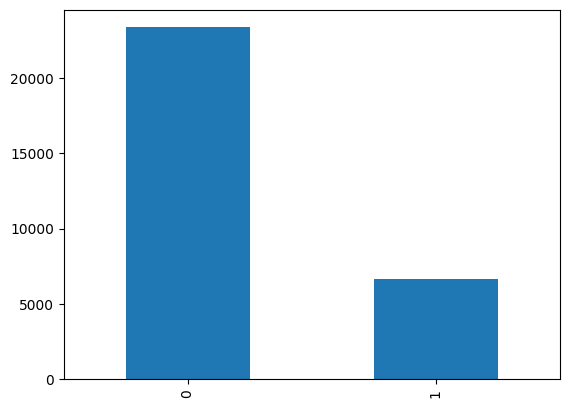

In [ ]:
print(df_1['Y'].value_counts())
df['Y'].value_counts().plot(kind='bar')

In [ ]:
df_1

X1 X2 X3 X4  X5  X6  X7  X8  X9 X10  ...    X15    X16    X17  \
1       20000  2  2  1  24   2   2  -1  -1  -2  ...      0      0      0   
2      120000  2  2  2  26  -1   2   0   0   0  ...   3272   3455   3261   
3       90000  2  2  2  34   0   0   0   0   0  ...  14331  14948  15549   
4       50000  2  2  1  37   0   0   0   0   0  ...  28314  28959  29547   
5       50000  1  2  1  57  -1   0  -1   0   0  ...  20940  19146  19131   
...       ... .. .. ..  ..  ..  ..  ..  ..  ..  ...    ...    ...    ...   
29996  220000  1  3  1  39   0   0   0   0   0  ...  88004  31237  15980   
29997  150000  1  3  2  43  -1  -1  -1  -1   0  ...   8979   5190      0   
29998   30000  1  2  2  37   4   3   2  -1   0  ...  20878  20582  19357   
29999   80000  1  3  1  41   1  -1   0   0   0  ...  52774  11855  48944   
30000   50000  1  2  1  46   0   0   0   0   0  ...  36535  32428  15313   

         X18    X19    X20   X21    X22   X23  Y  
1          0    689      0     0      0     0  1  
2          0   1000   1000  1000      0  2000  1  
3       1518   1500   1000  1000   1000  5000  0  
4       2000   2019   1200  1100   1069  1000  0  
5       2000  36681  10000  9000    689   679  0  
...      ...    ...    ...   ...    ...   ... ..  
29996   8500  20000   5003  3047   5000  1000  0  
29997   1837   3526   8998   129      0     0  0  
29998      0      0  22000  4200   2000  3100  1  
29999  85900   3409   1178  1926  52964  1804  1  
30000   2078   1800   1430  1000   1000  1000  1  

[29965 rows x 24 columns]

In [ ]:
feature_cols = df_1.columns[:-1]
label = df_1.columns[-1:]

X = df_1[feature_cols]
y = df_1[label]

In [ ]:
X

X1 X2 X3 X4  X5  X6  X7  X8  X9 X10  ...     X14    X15    X16  \
1       20000  2  2  1  24   2   2  -1  -1  -2  ...     689      0      0   
2      120000  2  2  2  26  -1   2   0   0   0  ...    2682   3272   3455   
3       90000  2  2  2  34   0   0   0   0   0  ...   13559  14331  14948   
4       50000  2  2  1  37   0   0   0   0   0  ...   49291  28314  28959   
5       50000  1  2  1  57  -1   0  -1   0   0  ...   35835  20940  19146   
...       ... .. .. ..  ..  ..  ..  ..  ..  ..  ...     ...    ...    ...   
29996  220000  1  3  1  39   0   0   0   0   0  ...  208365  88004  31237   
29997  150000  1  3  2  43  -1  -1  -1  -1   0  ...    3502   8979   5190   
29998   30000  1  2  2  37   4   3   2  -1   0  ...    2758  20878  20582   
29999   80000  1  3  1  41   1  -1   0   0   0  ...   76304  52774  11855   
30000   50000  1  2  1  46   0   0   0   0   0  ...   49764  36535  32428   

         X17    X18    X19    X20   X21    X22   X23  
1          0      0    689      0     0      0     0  
2       3261      0   1000   1000  1000      0  2000  
3      15549   1518   1500   1000  1000   1000  5000  
4      29547   2000   2019   1200  1100   1069  1000  
5      19131   2000  36681  10000  9000    689   679  
...      ...    ...    ...    ...   ...    ...   ...  
29996  15980   8500  20000   5003  3047   5000  1000  
29997      0   1837   3526   8998   129      0     0  
29998  19357      0      0  22000  4200   2000  3100  
29999  48944  85900   3409   1178  1926  52964  1804  
30000  15313   2078   1800   1430  1000   1000  1000  

[29965 rows x 23 columns]

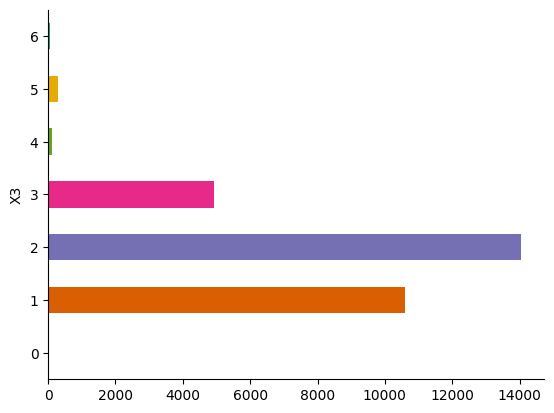

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('X3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

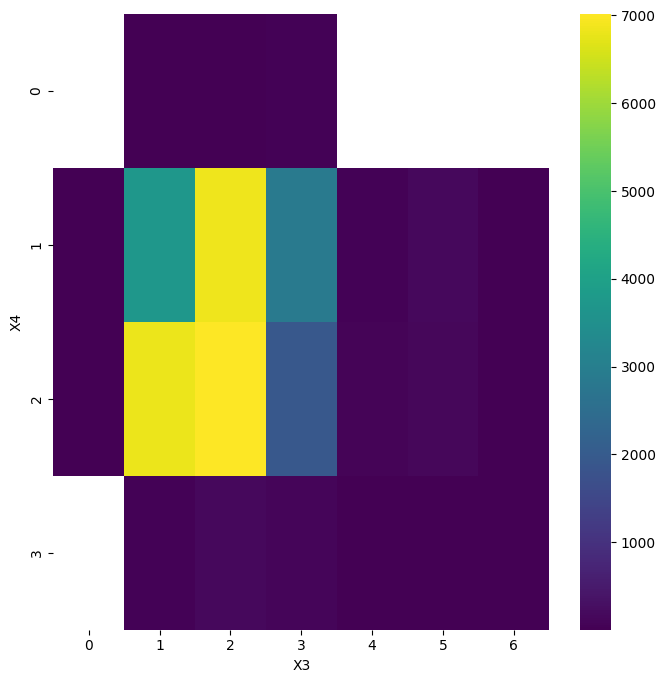

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['X4'].value_counts()
    for x_label, grp in df.groupby('X3')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('X3')
_ = plt.ylabel('X4')

In [ ]:
y

Y
1      1
2      1
3      0
4      0
5      0
...   ..
29996  0
29997  0
29998  1
29999  1
30000  1

[29965 rows x 1 columns]

In [ ]:
categorical_columns= ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10','X11']
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_1[col].value_counts())
  print()

Categories and number of occurrences for 'X2'



Categories and number of occurrences for 'X3'



Categories and number of occurrences for 'X4'



Categories and number of occurrences for 'X6'



Categories and number of occurrences for 'X7'



Categories and number of occurrences for 'X8'



Categories and number of occurrences for 'X9'



Categories and number of occurrences for 'X10'



Categories and number of occurrences for 'X11'


In [ ]:
numerical_columns = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18','X19', 'X20', 'X21', 'X22', 'X23']
for num in numerical_columns:
  print(f"Numerical  and number of occurrences for '{num}'")
  pretty_print_df(df_1[num].value_counts())
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
X_no_nas = X.copy()

<Axes: xlabel='Y'>

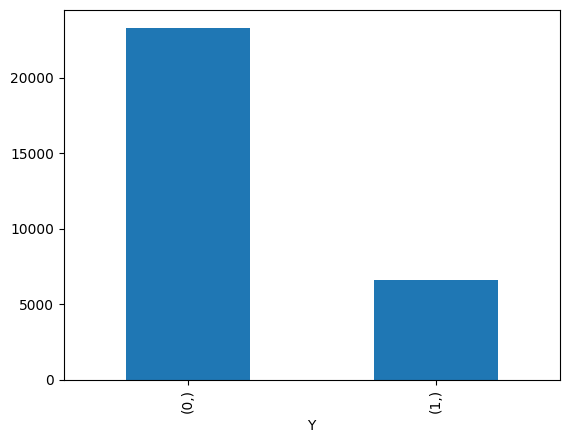

In [ ]:
y.value_counts().plot(kind ='bar')

In [ ]:
X_categorical = X[categorical_columns]
print (X_categorical)

      X2 X3 X4  X6  X7  X8  X9 X10 X11
1      2  2  1   2   2  -1  -1  -2  -2
2      2  2  2  -1   2   0   0   0   2
3      2  2  2   0   0   0   0   0   0
4      2  2  1   0   0   0   0   0   0
5      1  2  1  -1   0  -1   0   0   0
...   .. .. ..  ..  ..  ..  ..  ..  ..
29996  1  3  1   0   0   0   0   0   0
29997  1  3  2  -1  -1  -1  -1   0   0
29998  1  2  2   4   3   2  -1   0   0
29999  1  3  1   1  -1   0   0   0  -1
30000  1  2  1   0   0   0   0   0   0

[29965 rows x 9 columns]


In [ ]:
X_numerical = X[numerical_columns]
print (X_numerical)

           X1  X5     X12     X13     X14    X15    X16    X17    X18    X19  \
1       20000  24    3913    3102     689      0      0      0      0    689   
2      120000  26    2682    1725    2682   3272   3455   3261      0   1000   
3       90000  34   29239   14027   13559  14331  14948  15549   1518   1500   
4       50000  37   46990   48233   49291  28314  28959  29547   2000   2019   
5       50000  57    8617    5670   35835  20940  19146  19131   2000  36681   
...       ...  ..     ...     ...     ...    ...    ...    ...    ...    ...   
29996  220000  39  188948  192815  208365  88004  31237  15980   8500  20000   
29997  150000  43    1683    1828    3502   8979   5190      0   1837   3526   
29998   30000  37    3565    3356    2758  20878  20582  19357      0      0   
29999   80000  41   -1645   78379   76304  52774  11855  48944  85900   3409   
30000   50000  46   47929   48905   49764  36535  32428  15313   2078   1800   

         X20   X21    X22   X23  
1    

### **DATA SPLITTING AND ONE HOT ENCODING**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(23972, 23)
(23972, 1)
(2996, 23)
(2996, 1)
(2997, 23)
(2997, 1)


In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
ct_cat.fit(X_train)
encoded_array = ct_cat.transform(X_train).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

['X2_1' 'X2_2' 'X3_0' 'X3_1' 'X3_2' 'X3_3' 'X3_4' 'X3_5' 'X3_6' 'X4_0'
 'X4_1' 'X4_2' 'X4_3' 'X6_-1' 'X6_-2' 'X6_0' 'X6_1' 'X6_2' 'X6_3' 'X6_4'
 'X6_5' 'X6_6' 'X6_7' 'X6_8' 'X7_-1' 'X7_-2' 'X7_0' 'X7_1' 'X7_2' 'X7_3'
 'X7_4' 'X7_5' 'X7_6' 'X7_7' 'X7_8' 'X8_-1' 'X8_-2' 'X8_0' 'X8_1' 'X8_2'
 'X8_3' 'X8_4' 'X8_5' 'X8_6' 'X8_7' 'X8_8' 'X9_-1' 'X9_-2' 'X9_0' 'X9_1'
 'X9_2' 'X9_3' 'X9_4' 'X9_5' 'X9_6' 'X9_7' 'X9_8' 'X10_-1' 'X10_-2'
 'X10_0' 'X10_2' 'X10_3' 'X10_4' 'X10_5' 'X10_6' 'X10_7' 'X10_8' 'X11_-1'
 'X11_-2' 'X11_0' 'X11_2' 'X11_3' 'X11_4' 'X11_5' 'X11_6' 'X11_7' 'X11_8'
 'X1' 'X5' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21'
 'X22' 'X23']


In [ ]:
encoded_array = ct_cat.transform(X_val).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_val= pd.DataFrame(encoded_array, columns=encoded_col_names)

['X2_1' 'X2_2' 'X3_0' 'X3_1' 'X3_2' 'X3_3' 'X3_4' 'X3_5' 'X3_6' 'X4_0'
 'X4_1' 'X4_2' 'X4_3' 'X6_-1' 'X6_-2' 'X6_0' 'X6_1' 'X6_2' 'X6_3' 'X6_4'
 'X6_5' 'X6_6' 'X6_7' 'X6_8' 'X7_-1' 'X7_-2' 'X7_0' 'X7_1' 'X7_2' 'X7_3'
 'X7_4' 'X7_5' 'X7_6' 'X7_7' 'X7_8' 'X8_-1' 'X8_-2' 'X8_0' 'X8_1' 'X8_2'
 'X8_3' 'X8_4' 'X8_5' 'X8_6' 'X8_7' 'X8_8' 'X9_-1' 'X9_-2' 'X9_0' 'X9_1'
 'X9_2' 'X9_3' 'X9_4' 'X9_5' 'X9_6' 'X9_7' 'X9_8' 'X10_-1' 'X10_-2'
 'X10_0' 'X10_2' 'X10_3' 'X10_4' 'X10_5' 'X10_6' 'X10_7' 'X10_8' 'X11_-1'
 'X11_-2' 'X11_0' 'X11_2' 'X11_3' 'X11_4' 'X11_5' 'X11_6' 'X11_7' 'X11_8'
 'X1' 'X5' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21'
 'X22' 'X23']


In [ ]:
encoded_array = ct_cat.transform(X_test).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test= pd.DataFrame(encoded_array, columns=encoded_col_names)

['X2_1' 'X2_2' 'X3_0' 'X3_1' 'X3_2' 'X3_3' 'X3_4' 'X3_5' 'X3_6' 'X4_0'
 'X4_1' 'X4_2' 'X4_3' 'X6_-1' 'X6_-2' 'X6_0' 'X6_1' 'X6_2' 'X6_3' 'X6_4'
 'X6_5' 'X6_6' 'X6_7' 'X6_8' 'X7_-1' 'X7_-2' 'X7_0' 'X7_1' 'X7_2' 'X7_3'
 'X7_4' 'X7_5' 'X7_6' 'X7_7' 'X7_8' 'X8_-1' 'X8_-2' 'X8_0' 'X8_1' 'X8_2'
 'X8_3' 'X8_4' 'X8_5' 'X8_6' 'X8_7' 'X8_8' 'X9_-1' 'X9_-2' 'X9_0' 'X9_1'
 'X9_2' 'X9_3' 'X9_4' 'X9_5' 'X9_6' 'X9_7' 'X9_8' 'X10_-1' 'X10_-2'
 'X10_0' 'X10_2' 'X10_3' 'X10_4' 'X10_5' 'X10_6' 'X10_7' 'X10_8' 'X11_-1'
 'X11_-2' 'X11_0' 'X11_2' 'X11_3' 'X11_4' 'X11_5' 'X11_6' 'X11_7' 'X11_8'
 'X1' 'X5' 'X12' 'X13' 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21'
 'X22' 'X23']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X_train[numerical_columns])

In [ ]:
X_scaled_val = scaler.transform(X_val[numerical_columns])

In [ ]:
X_scaled_test = scaler.transform(X_test[numerical_columns])

In [ ]:
X_scaled_column = scaler.get_feature_names_out()
X_train[numerical_columns]= pd.DataFrame(X_scaled, columns=X_scaled_column)
X_val[numerical_columns] = pd.DataFrame(X_scaled_val, columns=X_scaled_column)
X_test[numerical_columns] = pd.DataFrame(X_scaled_test, columns=X_scaled_column)

In [ ]:
X_val[numerical_columns]

X1        X5       X12       X13       X14       X15       X16  \
0     0.090909  0.379310  0.235708  0.153283  0.135145  0.245585  0.172339   
1     0.020202  0.431034  0.172359  0.095077  0.103527  0.188330  0.108158   
2     0.414141  0.189655  0.226038  0.081879  0.095949  0.176354  0.097751   
3     0.020202  0.068966  0.172772  0.093488  0.102680  0.187104  0.109867   
4     0.040404  0.517241  0.146864  0.066961  0.086559  0.160505  0.081035   
...        ...       ...       ...       ...       ...       ...       ...   
2991  0.040404  0.275862  0.179793  0.102921  0.108278  0.198029  0.105950   
2992  0.141414  0.448276  0.282271  0.212105  0.168997  0.304359  0.231426   
2993  0.040404  0.293103  0.147843  0.099443  0.104283  0.192247  0.117449   
2994  0.191919  0.310345  0.169069  0.096150  0.105075  0.188380  0.080630   
2995  0.000000  0.275862  0.150988  0.069736  0.089761  0.161055  0.089408   

           X17       X18       X19       X20       X21       X22       X23  
0     0.246319  0.000000  0.002438  0.004692  0.007941  0.007200  0.005892  
1     0.202584  0.003960  0.001009  0.001065  0.000000  0.005282  0.002098  
2     0.193740  0.003529  0.000757  0.001430  0.001167  0.001859  0.001897  
3     0.203880  0.002970  0.000894  0.001674  0.004160  0.005392  0.005691  
4     0.179694  0.001545  0.000000  0.000435  0.000737  0.003095  0.000000  
...        ...       ...       ...       ...       ...       ...       ...  
2991  0.196210  0.003960  0.001306  0.001562  0.001891  0.002345  0.001897  
2992  0.307949  0.013861  0.004156  0.007812  0.009832  0.012895  0.011951  
2993  0.217042  0.069321  0.001187  0.002232  0.009454  0.023445  0.003794  
2994  0.178552  0.012952  0.003177  0.000223  0.000000  0.000000  0.000000  
2995  0.183701  0.009923  0.003694  0.001098  0.016703  0.000000  0.012295  

[2996 rows x 14 columns]

In [ ]:
lblEncoder_Y = LabelEncoder()
train_encoded_labels = lblEncoder_Y.fit_transform(y_train['Y'])
train_encoded_labels



array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
val_encoded_labels = lblEncoder_Y.transform(y_val['Y'])
val_encoded_labels

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
test_encoded_labels = lblEncoder_Y.transform(y_test['Y'])
test_encoded_labels

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
y_train = train_encoded_labels
y_val = val_encoded_labels
y_test = test_encoded_labels

### **MODEL EVALUATION**

Accuracy: 0.8134178905206942
Precision: 0.6955128205128205
Recall: 0.3186490455212922
F1-score: 0.43705941591137965
Confusion Matrix:
[[2220   95]
 [ 464  217]]


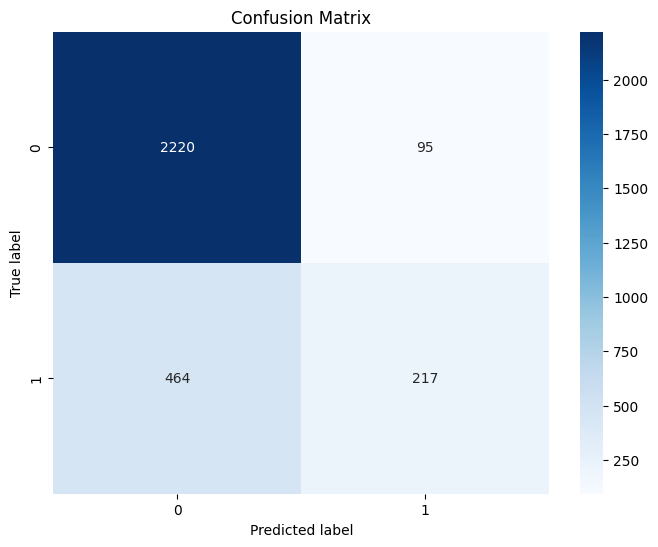

Trivial Baseline Accuracy: 0.7726969292389854


In [ ]:
# Model: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(rf_classifier, rf_params, scoring='accuracy', cv=3)
rf_grid.fit(X_train, y_train)

# Evaluate on validation set
y_val_predictions = rf_grid.best_estimator_.predict(X_val)

# Print classification metrics
print("Accuracy:", accuracy_score(y_val, y_val_predictions))
print("Precision:", precision_score(y_val, y_val_predictions))
print("Recall:", recall_score(y_val, y_val_predictions))
print("F1-score:", f1_score(y_val, y_val_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_predictions)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Trivial Baseline
trivial_baseline = len(y_val[y_val == 0]) / len(y_val)
print("Trivial Baseline Accuracy:", trivial_baseline)

In [ ]:
print("Random Forest Best Hyperparameters:", rf_grid.best_params_)

Random Forest Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Accuracy: 0.8117489986648865
F1-score: 0.7822332334116602


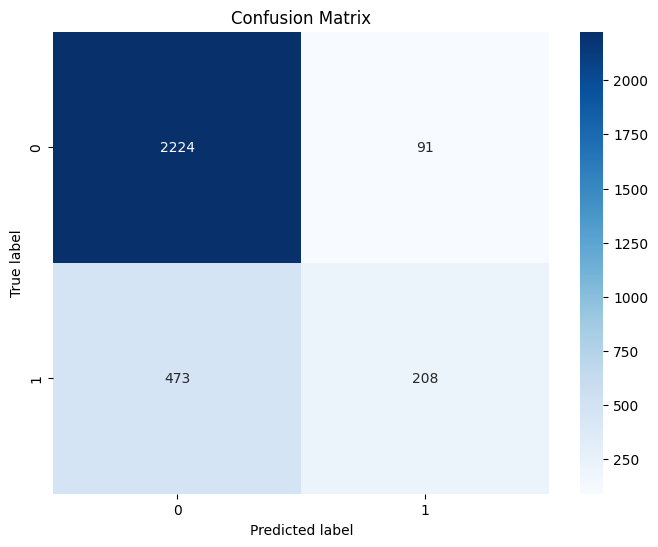

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

#Evaluate on Validation Data
y_val_predictions = svm_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_val_predictions)
conf_matrix = confusion_matrix(y_val, y_val_predictions)
f1_score = f1_score(y_val, y_val_predictions,average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.7229639519359146
F1-score: 0.7822332334116602


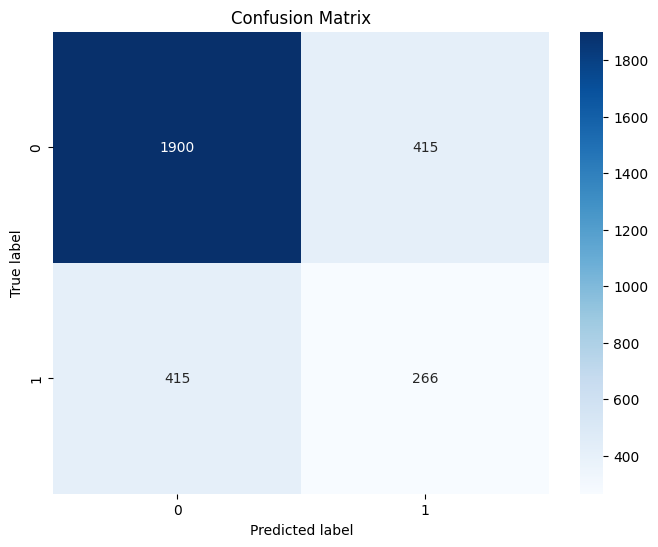

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

#Evaluate on Validation Data
y_val_predictions = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_val_predictions)
conf_matrix = confusion_matrix(y_val, y_val_predictions)
#f1_score_val = f1_score(y_val, y_val_predictions,average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

Logistic regression Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val)


Logistic Regression Metrics:
Accuracy: 0.8117489986648865
Precision: 0.7941285901605732
Recall: 0.8117489986648865


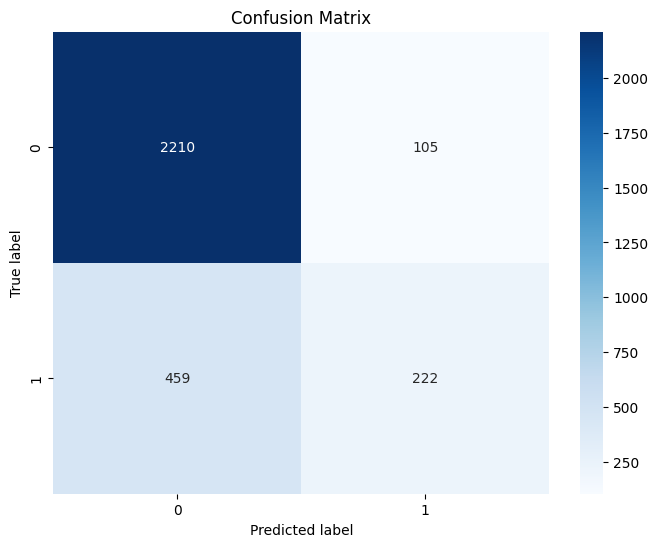

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8241574908241575
Precision: 0.8062139338302193
Recall: 0.8241574908241575
Confusion Matrix:
[[2244  114]
 [ 413  226]]


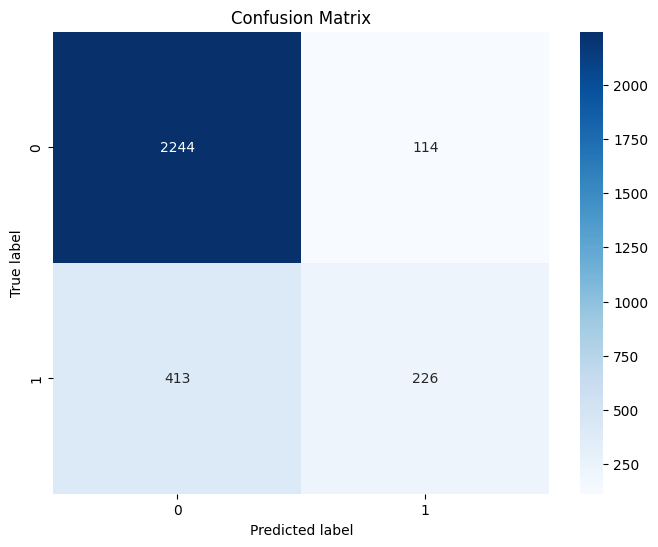

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **APPLICATION OF PCA FOR DIMENSIONALITY REDUCTION[Feature Extraction]**

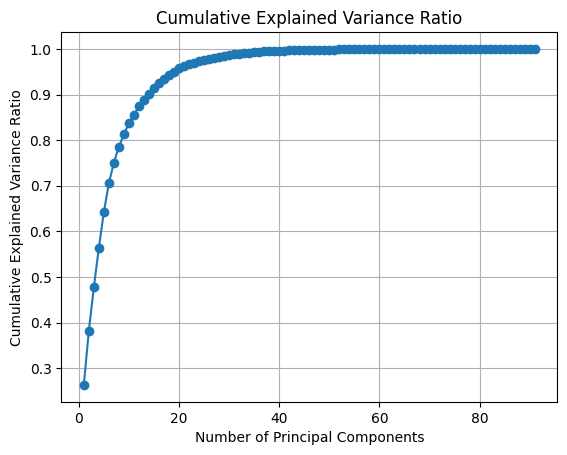

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Transform validation and test data using the learned PCA transformation
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

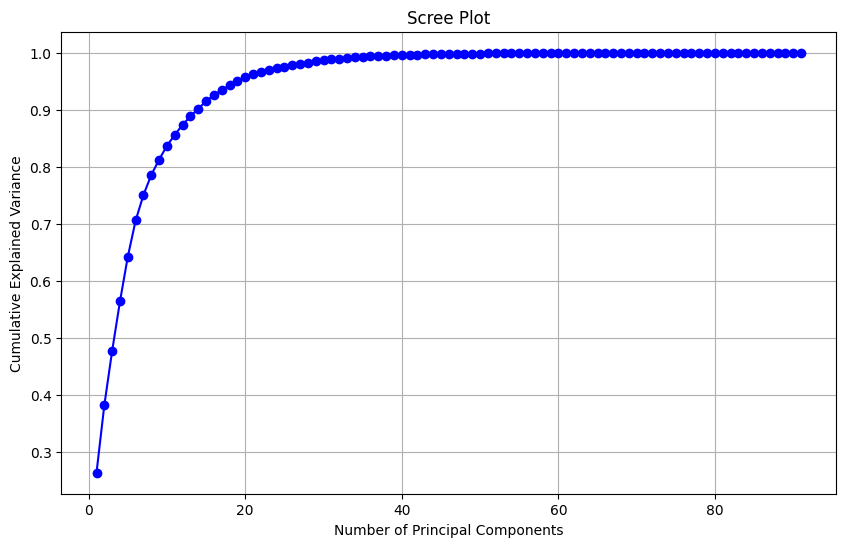

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
n_components_optimal = 30 # Replace with your chosen number of components

# Create a PCA instance with the optimal number of components
pca = PCA(n_components=n_components_optimal)

# Fit and transform your training data
X_train_pca = pca.fit_transform(X_train)

# Transform your validation and test data using the same PCA model
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca

array([[-1.27022013e+00, -1.02880964e-01,  1.16035376e+00, ...,
        -3.93873191e-02,  5.51743106e-03,  6.58990124e-03],
       [ 1.65073898e+00, -3.76329547e-01,  2.02016900e-01, ...,
         4.16214609e-03,  1.01192208e-02, -3.42936640e-02],
       [-6.64885764e-01, -3.43547483e-01,  7.67400661e-01, ...,
        -2.89984736e-02, -4.39617787e-02,  7.51942694e-02],
       ...,
       [ 1.57590650e+00,  1.77798973e+00,  1.32806348e+00, ...,
        -1.62764905e-02,  2.60090801e-02,  2.05506757e-02],
       [-1.38177877e+00,  7.09437627e-03,  2.07258908e-01, ...,
        -3.50321785e-02, -5.26842885e-03,  1.70088194e-06],
       [ 4.89005964e-01, -4.02800750e-01, -1.15957303e+00, ...,
        -9.49147031e-03,  3.26262941e-02,  1.68088617e-01]])

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train_pca, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_valid_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Logistic regression Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}



Logistic Regression Metrics:
Accuracy: 0.8090787716955942
Precision: 0.7905039783659492
Recall: 0.8090787716955942
F1-score: 0.7809931829195884


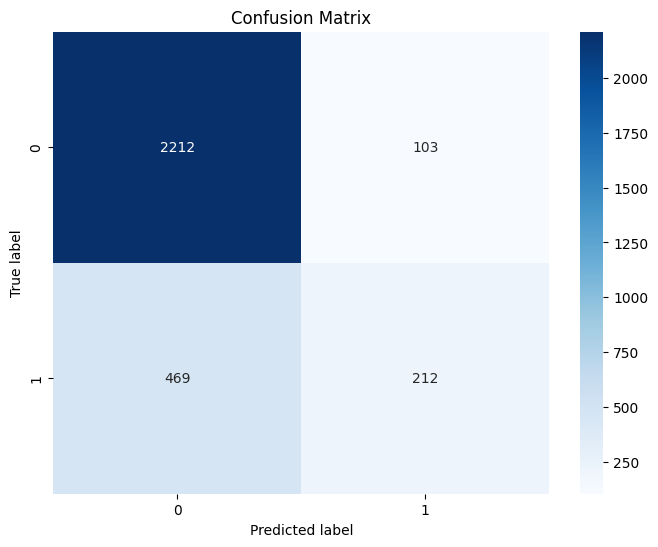

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8238238238238238
Precision: 0.8058167434520387
Recall: 0.8238238238238238
F1-score: 0.8008390993759886
Confusion Matrix:
[[2250  108]
 [ 420  219]]


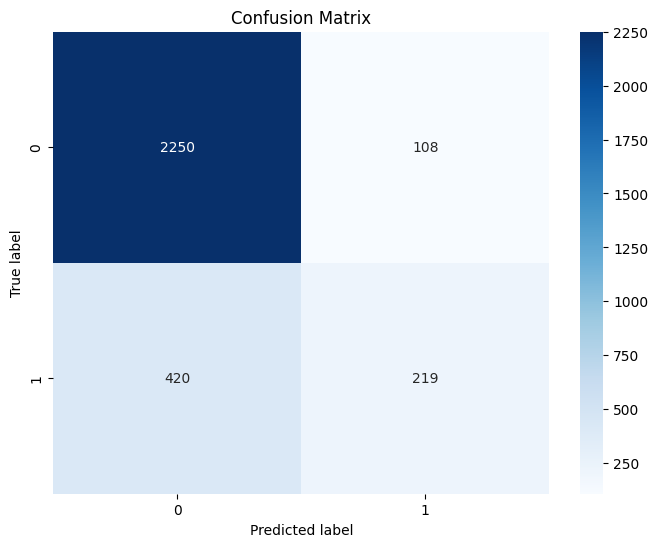

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test_pca)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## **FEATURE SELECTION**

### **STOCHASTIC DIFFUSION SEARCH METHOD**

SVM - SDS features selection
Originial data shape: (30000, 24)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for all features: 0.8114152202937249

Search space size: 245157.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 0

==>Iteration: 0
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 1
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 2
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 3
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 4
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 5
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 6
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 7
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 8
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 1

==>Iteration: 0
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 1
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 2
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 3
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 4
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 5
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 6
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 7
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 8
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202

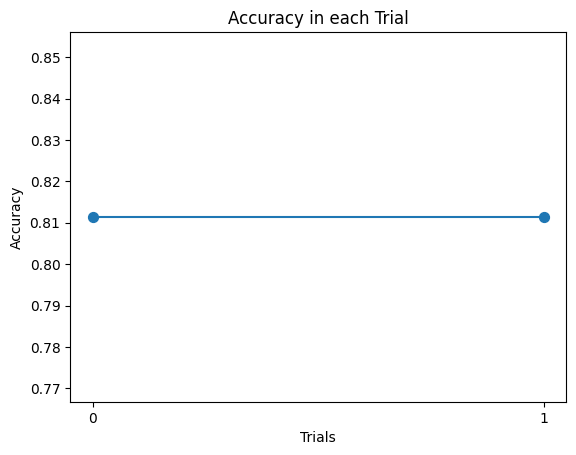


======== FINAL RESULTS ======== 
Selected features [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
Search space size: 245157.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 0

==>Iteration: 0
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 1
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 2
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 3
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 4
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 5
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 6
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 7
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 8
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 1

==>Iteration: 0
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 1
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 2
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 3
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 4
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 5
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 6
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 7
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202937249

==>Iteration: 8
Best accuracy in iteration: 	 0.8114152202937249
Best overall accuracy:		 0.8114152202

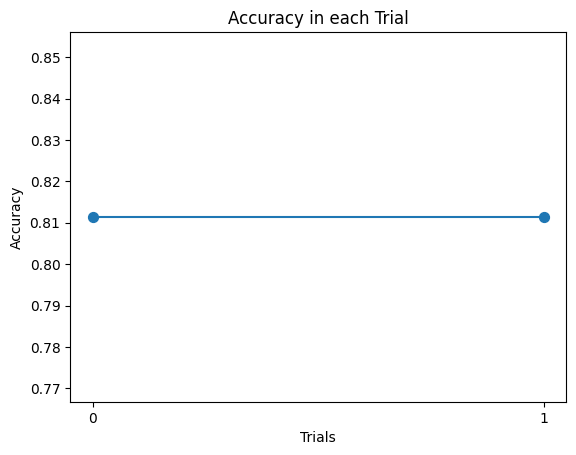


======== FINAL RESULTS ======== 
Selected features: [6, 9, 12, 13, 18, 19, 20]


In [ ]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

testRun = True

score_store= {}
def SDS(features_size,cost_function, df, maxIteration=50, population_size = 100):
    VarSize = df.shape[1]-1
    search_space_size = math.factorial(VarSize)/(math.factorial(features_size)*math.factorial(VarSize-features_size))
    print("Search space size: "+str(search_space_size))

	#agent class
    class Agent(object):
        def __init__(self):
            self.set_random_hypotesis()
            self.active = False

        def set_random_hypotesis(self):
            self.hypotesis = [1]*features_size + [0]*(VarSize-features_size)
            np.random.shuffle(self.hypotesis)

        def set_hypotesis_with_offset(self, new_hypotesis):
            self.hypotesis[:] = new_hypotesis #copy good hypotesis
            zero_set = False
            one_set = False
            stored = -1
            z=VarSize-1
            while not zero_set or not one_set:
                r = random.randint(0,z)
                if(self.hypotesis[r]==1 and stored!=r and not zero_set):
                    self.hypotesis[r]=0
                    zero_set = True
                    stored = r
                r2 = random.randint(0,z)
                if(self.hypotesis[r2]==0 and stored!=r2 and not one_set):
                    self.hypotesis[r2]=1
                    one_set = True
                    stored = r2

        def calculate(self,with_metric=True):
            if self.active==True:
                self.score

            indexes = []
            for j in range(0,VarSize):
                if(self.hypotesis[j]==1):
                    indexes.append(j)
            indexes.append(VarSize)
            subdata = df[:,indexes]
            #print('Indices selected:' , indexes[:len(indexes)-1])

            if(with_metric):
                self.score = cost_function(subdata,True)
            else:
                self.score = cost_function(subdata,True)

        def cal(self,  hypo):
            indexes = []
            for j in range(0,VarSize-1):
                if(hypo[j]==1):
                    indexes.append(j)
            indexes.append(VarSize)
            subdata = df[:,indexes]

            score = cost_function(subdata)
            return score


    # INITIALIZATION
    def initial():
        global population
        population=[]
        for ag in range(population_size):
            population.append(Agent())
        for ag in population:
            ag.calculate()

    #TEST
    def test():
        for ag in population:
            s = np.random.choice(population)
            while(s == ag):
                s = np.random.choice(population)
            another_agent = s
            if(ag.score >= another_agent.score):
                ag.active = True
            else:
                ag.active = False

    #DIFFUSION
    def diffusion():
        for ag in population:
             if (ag.active==False):
                #print('ag is inactive and the score is:', ag.score,'and its hypo is:', ag.hypotesis)
                another_agent= np.random.choice(population)
                while(another_agent==ag):
                    another_agent=np.random.choice(population)
                if(another_agent.active):
                    #print('The other agent hypo is', another_agent.hypotesis)
                    ag.set_hypotesis_with_offset(another_agent.hypotesis)
                    ag.calculate()
                    #print('After the offset:', ag.score, ', with hypo:', ag.hypotesis)
                else:
                    ag.set_random_hypotesis()
                    ag.calculate()
                    #print('The score of random hypo:', ag.score, ' and the new hypo is:', ag.hypotesis)

             else:
                 #print('Ag is active and its score is', ag.score)
                 another_agent= np.random.choice(population)
                 while(another_agent==ag):
                    another_agent=np.random.choice(population)
                 if((another_agent.active) and (another_agent.hypotesis == ag.hypotesis)):
                    ag.active=False
                    ag.set_random_hypotesis()
                    ag.calculate()
                    #print('The score after context sensitive diffusion is: ', ag.score)

    # #MAIN
    trial=10
    if testRun: trial = 2
    maxAcc=-1
    trial_best=[]
    for trialCounter in range(trial):
        initial()
        maxAccForit=-1
        best_it=[]
        print('\n\n====> Trial:', trialCounter)
        for iteration in range(maxIteration):
            print('\n==>Iteration:', iteration)
            it=-1
            for ag in population:
                if ag.score>it:
                    it=ag.score

            for ag in population:
                #print(ag.score)
                #print(ag.active)
                if (ag.score > maxAccForit):
                    maxAccForit=ag.score
                if(ag.score>maxAcc):
                    maxAcc=ag.score
                    best=ag.hypotesis

            test()
            diffusion()

            print( 'Best accuracy in iteration: \t', maxAccForit)
            best_it.append(maxAccForit)#for ploting the max acc at each iteration
            print('Best overall accuracy:\t\t', maxAcc)

        trial_best.append(max(best_it)) #here the trial ends


    print('\nBest accuracy in each trial:', trial_best)

    print('Time elapsed:', (time.time() - start_time))
    t=[]
    for i in range(trial):
        t.append(i)
    tr=np.array(t)
    tra=np.array(trial_best)
    plt.plot(tr,tra)
    plt.scatter(tr,tra, s=50)
    plt.xlabel('Trials')
    plt.xticks(range(0,len(t)))
    plt.ylabel('Accuracy')
    plt.title('Accuracy in each Trial')
    plt.show()
    print('\n======== FINAL RESULTS ======== ')
    return best

#to calculate the run time
start_time = time.time()


#Fintess function
def log_accuracy(df, additional_metrics = False):
    np.random.shuffle(df)
    np.random.shuffle(df)
    clf = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter= 2000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_val, y_val)
    if(additional_metrics):
        predicted = clf.predict(X_val)
        CM = metrics.confusion_matrix(y_val, predicted)
        #print('the Confusion Matrix')
        #print(CM)
        #TN = CM[0][0]
        #FN = CM[1][0]
        #TP = CM[1][1]
        #FP = CM[0][1]
        #print("Additional metrics: ")
        #print("TP "+str(TP))
        #print("FP "+str(FP))
        #print("TN "+str(FN))
        #print("FN "+str(FN))
        #sensitivity = TP / (TP + FN)
        #print(sensitivity)
        #specificity = TN / (FP + TN)
        #print("Specificity "+str(specificity))
        #print('Accuracy', accurancy)
    return accuracy


print("SVM - SDS features selection")
my_data = df.values
x_norm = X_train
np.random.shuffle(my_data)
print('Originial data shape:', my_data.shape)

# For all features
print("Accuracy for all features: "+str(abs(log_accuracy(my_data, True))) + "\n")

#For selected features
features_size = 7
maxIteration = 50
if testRun: maxIteration = 30
population_size = 100
if testRun: population_size = 30
print("Selected features "+str(SDS(features_size,log_accuracy,my_data,maxIteration,population_size)))

best_feature_subset = SDS(features_size, log_accuracy, my_data, maxIteration, population_size)

# Print the selected features
print("Selected features:", [i for i, val in enumerate(best_feature_subset) if val == 1])

In [ ]:
best_feature_subset

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0]

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
selected_features = [feature for i, feature in enumerate(X.columns) if best_feature_subset[i] == 1]
print("Actual selected features:", selected_features)


Actual selected features: ['X7', 'X10', 'X13', 'X14', 'X19', 'X20', 'X21']


In [ ]:
categorical_columns=['X7', 'X10']
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  pretty_print_df(df_1[col].value_counts())
  print()

Categories and number of occurrences for 'X7'



Categories and number of occurrences for 'X10'


In [ ]:
numerical_columns = ['X13', 'X14', 'X19', 'X20', 'X21']
for num in numerical_columns:
  print(f"Numerical  and number of occurrences for '{num}'")
  pretty_print_df(df_1[num].value_counts())
  print()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
new_X = X[selected_features]

In [ ]:
new_X

X7 X10     X13     X14    X19    X20   X21
1       2  -2    3102     689    689      0     0
2       2   0    1725    2682   1000   1000  1000
3       0   0   14027   13559   1500   1000  1000
4       0   0   48233   49291   2019   1200  1100
5       0   0    5670   35835  36681  10000  9000
...    ..  ..     ...     ...    ...    ...   ...
29996   0   0  192815  208365  20000   5003  3047
29997  -1   0    1828    3502   3526   8998   129
29998   3   0    3356    2758      0  22000  4200
29999  -1   0   78379   76304   3409   1178  1926
30000   0   0   48905   49764   1800   1430  1000

[29965 rows x 7 columns]

In [ ]:
new_X_train, X_temp= train_test_split(new_X, test_size=0.2, random_state=42)
new_X_val, new_X_test = train_test_split(X_temp, test_size=0.5, random_state=42)
print(new_X_train.shape)
print(new_X_val.shape)
print(new_X_test.shape)


(23972, 7)
(2996, 7)
(2997, 7)


In [ ]:
new_X_train

X7 X10     X13     X14    X19    X20    X21
27357   0   0  339883  335659  13000  13000  12000
26409  -1  -2    2947     297    297      0      0
14126  -1   0    3582   63527  63000  20000   5000
12269   0   0  111805  108207   4380   3000   5000
7076    0   0   36067   24727   2111  11000   1000
...    ..  ..     ...     ...    ...    ...    ...
29837  -2  -2       0       0      0      0      0
5393    0   2   20675   23329   3000   2000      0
861    -2  -2       0       0      0      0      0
15808   0   0  176261  174573   5897   5895   7747
23675   2   0    4089       0      0   8941      0

[23972 rows x 7 columns]

In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
ct_cat.fit(new_X_train)
encoded_array = ct_cat.transform(new_X_train).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
new_X_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

['X7_-1' 'X7_-2' 'X7_0' 'X7_1' 'X7_2' 'X7_3' 'X7_4' 'X7_5' 'X7_6' 'X7_7'
 'X7_8' 'X10_-1' 'X10_-2' 'X10_0' 'X10_2' 'X10_3' 'X10_4' 'X10_5' 'X10_6'
 'X10_7' 'X10_8' 'X13' 'X14' 'X19' 'X20' 'X21']


In [ ]:
encoded_array = ct_cat.transform(new_X_val).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
new_X_val= pd.DataFrame(encoded_array, columns=encoded_col_names)

['X7_-1' 'X7_-2' 'X7_0' 'X7_1' 'X7_2' 'X7_3' 'X7_4' 'X7_5' 'X7_6' 'X7_7'
 'X7_8' 'X10_-1' 'X10_-2' 'X10_0' 'X10_2' 'X10_3' 'X10_4' 'X10_5' 'X10_6'
 'X10_7' 'X10_8' 'X13' 'X14' 'X19' 'X20' 'X21']


In [ ]:
encoded_array = ct_cat.transform(new_X_test).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
new_X_test= pd.DataFrame(encoded_array, columns=encoded_col_names)

['X7_-1' 'X7_-2' 'X7_0' 'X7_1' 'X7_2' 'X7_3' 'X7_4' 'X7_5' 'X7_6' 'X7_7'
 'X7_8' 'X10_-1' 'X10_-2' 'X10_0' 'X10_2' 'X10_3' 'X10_4' 'X10_5' 'X10_6'
 'X10_7' 'X10_8' 'X13' 'X14' 'X19' 'X20' 'X21']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
new_X_scaled = scaler.fit_transform(new_X_train[numerical_columns])

In [ ]:
new_X_scaled_val = scaler.transform(new_X_val[numerical_columns])

In [ ]:
new_X_scaled_test = scaler.transform(new_X_test[numerical_columns])

In [ ]:
X_scaled_column = scaler.get_feature_names_out()
new_X_train[numerical_columns]= pd.DataFrame(new_X_scaled, columns=X_scaled_column)
new_X_val[numerical_columns] = pd.DataFrame(new_X_scaled_val, columns=X_scaled_column)
new_X_test[numerical_columns] = pd.DataFrame(new_X_scaled_test, columns=X_scaled_column)

In [ ]:
new_X_train

X7_-1  X7_-2  X7_0  X7_1  X7_2  X7_3  X7_4  X7_5  X7_6  X7_7  ...  \
0        0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1        1.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2        1.0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3        0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4        0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...      ...    ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
23967    0.0    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
23968    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
23969    0.0    1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
23970    0.0    0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
23971    0.0    0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   

       X10_4  X10_5  X10_6  X10_7  X10_8       X13       X14       X19  \
0        0.0    0.0    0.0    0.0    0.0  0.388779  0.270636  0.007719   
1        0.0    0.0    0.0    0.0    0.0  0.069017  0.086508  0.000176   
2        0.0    0.0    0.0    0.0    0.0  0.069620  0.121224  0.037405   
3        0.0    0.0    0.0    0.0    0.0  0.172327  0.145755  0.002601   
4        0.0    0.0    0.0    0.0    0.0  0.100449  0.099921  0.001253   
...      ...    ...    ...    ...    ...       ...       ...       ...   
23967    0.0    0.0    0.0    0.0    0.0  0.066220  0.086345  0.000000   
23968    0.0    0.0    0.0    0.0    0.0  0.085842  0.099153  0.001781   
23969    0.0    0.0    0.0    0.0    0.0  0.066220  0.086345  0.000000   
23970    0.0    0.0    0.0    0.0    0.0  0.233497  0.182193  0.003501   
23971    0.0    0.0    0.0    0.0    0.0  0.070101  0.086345  0.000000   

            X20       X21  
0      0.014508  0.022689  
1      0.000000  0.000000  
2      0.022320  0.009454  
3      0.003348  0.009454  
4      0.012276  0.001891  
...         ...       ...  
23967  0.000000  0.000000  
23968  0.002232  0.000000  
23969  0.000000  0.000000  
23970  0.006579  0.014647  
23971  0.009978  0.000000  

[23972 rows x 26 columns]

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter= 2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 0.7937249666221629
Precision: 0.773326231028113
Recall: 0.7937249666221629
F1-score: 0.7429192973809317


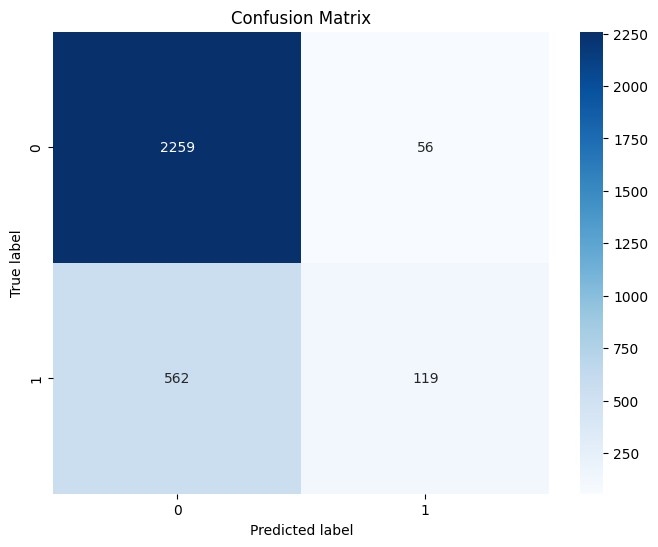

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8041374708041374
Precision: 0.7776516317329482
Recall: 0.8041374708041374
F1-score: 0.7589467882909554
Confusion Matrix:
[[2291   67]
 [ 520  119]]


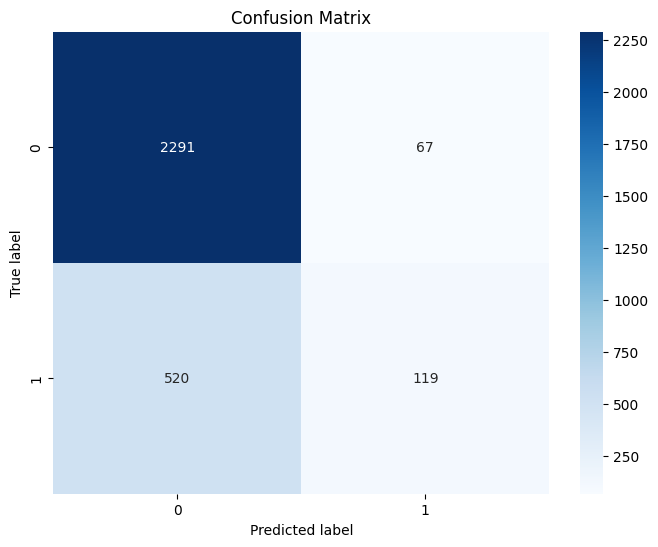

In [ ]:
test_predictions3 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions3))
print("Precision:", precision_score(y_test, test_predictions3, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions3, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions3,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions3)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

###**STANDARD DEVIATION AND SKEWNESS BASED FEATURE SELECTION METHOD**

In [ ]:
from sklearn.metrics import accuracy_score
import random

class SDSFeatureSelection:
    def __init__(self, population_size, max_iterations, features_size, cost_function, X_train, y_train, X_val, y_val):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.features_size = features_size
        self.cost_function = cost_function
        self.population = []
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def initialize_population(self):
        for _ in range(self.population_size):
            hypothesis = [1] * self.features_size + [0] * (self.X_train.shape[1] - self.features_size)
            random.shuffle(hypothesis)
            self.population.append(hypothesis)

    def calculate_fitness(self, hypothesis, with_metric=True):
        indexes = [i for i in range(len(hypothesis)) if hypothesis[i] == 1]
        print(indexes)
        subdata = self.X_train.iloc[:, indexes]

        if with_metric:
            clf = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter= 2000)
            clf.fit(subdata, self.y_train)
            y_pred = clf.predict(self.X_val.iloc[:, indexes])
            print(y_train.shape,y_pred.shape)
            return accuracy_score(self.y_val, y_pred)
        else:
            return self.cost_function(subdata)

    def sds_algorithm(self):
        self.initialize_population()

        for iteration in range(self.max_iterations):
            for agent in self.population:
                # Calculate fitness
                agent_fitness = self.calculate_fitness(agent)

                # Update hypothesis
                for i in range(self.features_size):
                    if random.random() < 0.5:
                        agent[i] = 1
                    else:
                        agent[i] = 0

                # Calculate fitness after the update
                updated_fitness = self.calculate_fitness(agent)

                # Accept or reject the update
                if updated_fitness > agent_fitness:
                    agent_fitness = updated_fitness

        # Select the best hypothesis from the population
        best_hypothesis = max(self.population, key=lambda x: self.calculate_fitness(x))

        return best_hypothesis


sds = SDSFeatureSelection(population_size=15, max_iterations=10, features_size=30, cost_function=None, X_train=X_train, y_train=y_train, X_val=X_val, y_val= y_val)
selected_features = sds.sds_algorithm()

# Print the selected features
print("Selected features:", [i for i, val in enumerate(selected_features) if val == 1])

[8, 9, 11, 17, 21, 23, 24, 26, 27, 33, 34, 35, 37, 38, 40, 43, 48, 53, 56, 60, 66, 68, 72, 73, 74, 77, 78, 83, 85, 89]
(23972,) (2996,)
[0, 2, 3, 4, 5, 6, 9, 10, 11, 14, 15, 18, 21, 23, 24, 27, 28, 33, 34, 35, 37, 38, 40, 43, 48, 53, 56, 60, 66, 68, 72, 73, 74, 77, 78, 83, 85, 89]
(23972,) (2996,)
[0, 3, 5, 10, 11, 12, 13, 19, 25, 28, 31, 33, 37, 40, 51, 54, 56, 60, 62, 63, 65, 69, 71, 73, 75, 80, 82, 86, 88, 90]
(23972,) (2996,)
[1, 3, 4, 5, 7, 9, 11, 14, 16, 17, 18, 19, 21, 25, 26, 27, 31, 33, 37, 40, 51, 54, 56, 60, 62, 63, 65, 69, 71, 73, 75, 80, 82, 86, 88, 90]
(23972,) (2996,)
[1, 2, 5, 6, 8, 12, 14, 18, 19, 21, 25, 26, 28, 32, 36, 38, 45, 52, 53, 59, 65, 66, 69, 70, 75, 76, 79, 80, 81, 89]
(23972,) (2996,)
[0, 2, 6, 7, 9, 10, 11, 12, 14, 15, 16, 17, 18, 24, 25, 27, 29, 32, 36, 38, 45, 52, 53, 59, 65, 66, 69, 70, 75, 76, 79, 80, 81, 89]
(23972,) (2996,)
[1, 4, 6, 12, 13, 16, 17, 18, 21, 25, 30, 35, 36, 37, 48, 51, 54, 55, 61, 63, 64, 67, 68, 69, 71, 74, 80, 81, 84, 89]
(23972,) (

In [ ]:
actual_features = [feature for i, feature in enumerate(X_train.columns) if selected_features[i] == 1]
print("Actual selected features:", actual_features)

Actual selected features: ['X2_2', 'X3_0', 'X3_3', 'X3_5', 'X3_6', 'X4_0', 'X4_1', 'X4_2', 'X4_3', 'X6_-2', 'X6_0', 'X6_2', 'X6_3', 'X6_4', 'X6_6', 'X6_8', 'X7_0', 'X7_1', 'X7_7', 'X7_8', 'X8_-1', 'X8_0', 'X8_2', 'X8_8', 'X9_0', 'X9_3', 'X9_7', 'X10_-1', 'X10_5', 'X10_8', 'X11_-2', 'X11_4', 'X11_6', 'X12', 'X13', 'X14', 'X16', 'X20']


**APPLICATION OF CHOSEN MODEL ON SELECTED FEATURES**

In [ ]:
new_X_train = X_train[actual_features]
new_X_test = X_test[actual_features]
new_X_val = X_val[actual_features]
# Display the new DataFrame
print("New DataFrame with selected features:")
print(new_X_train)
print(new_X_test)
print(new_X_val)

New DataFrame with selected features:
       X2_2  X3_0  X3_3  X3_5  X3_6  X4_0  X4_1  X4_2  X4_3  X6_-2  ...  \
0       0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
1       1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
2       1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
3       1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
4       1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0    0.0  ...   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
23967   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0    1.0  ...   
23968   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
23969   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    1.0  ...   
23970   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0    0.0  ...   
23971   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0    0.0  ...   

       X10_5  X10_8  X11_-2  X11_4  X11_6       X12       X13

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 0.8127503337783711
Precision: 0.7980510831680935
Recall: 0.8127503337783711
F1-score: 0.7813869145073394


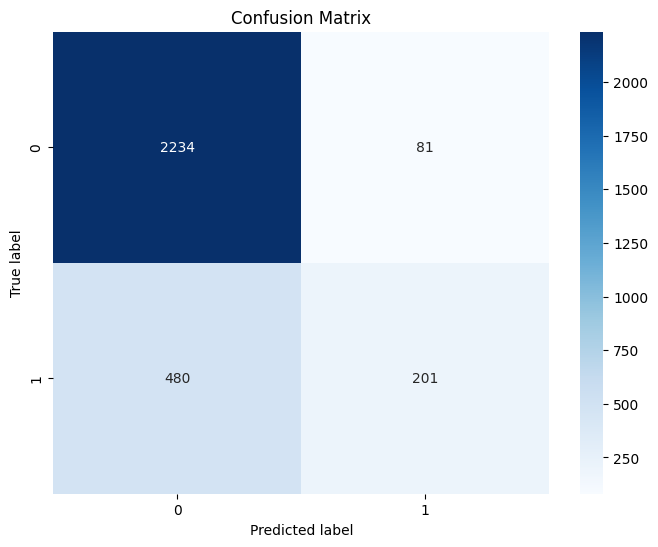

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8224891558224892
Precision: 0.804897515121083
Recall: 0.8224891558224892
F1-score: 0.7946825792979639
Confusion Matrix:
[[2269   89]
 [ 443  196]]


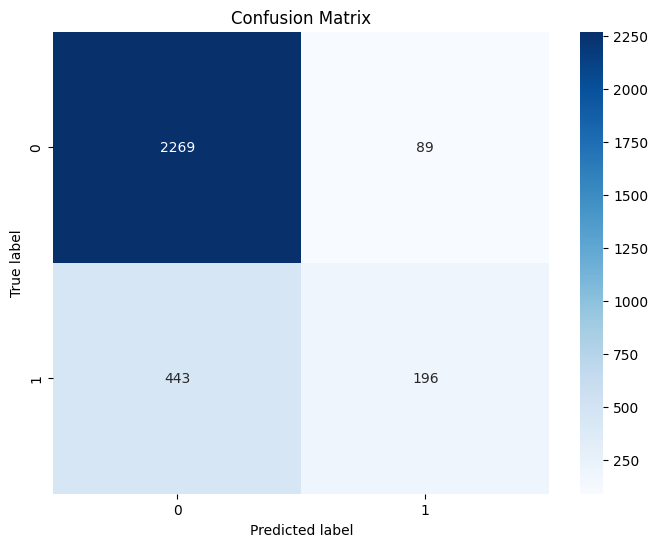

In [ ]:
test_predictions3 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions3))
print("Precision:", precision_score(y_test, test_predictions3, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions3, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions3,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions3)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **IMPROVED SDS[ADAPTIVE]**

In [ ]:
X = pd.concat([X_train, X_test, X_val], ignore_index=True)


In [ ]:
lblEncoder_Y = LabelEncoder()
y= lblEncoder_Y.fit_transform(y)
y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
y= np.array(y)

In [ ]:
X= np.array(X)

In [ ]:
X

array([[1.        , 0.        , 0.        , ..., 0.02268873, 0.02813408,
        0.02276422],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.00945364, 0.1227185 ,
        0.02845528],
       ...,
       [0.        , 1.        , 0.        , ..., 0.00945364, 0.02344506,
        0.00379404],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.01670269, 0.        ,
        0.01229458]])

In [ ]:
from sklearn.svm import SVC
#Creating instances of estimators
logReg=LogisticRegression(C=100, solver='liblinear', max_iter= 500)
decClf=DecisionTreeClassifier(max_depth=5, min_samples_split=4)
svc=SVC(C=0.5,gamma=0.5)

estimators=[svc,logReg,decClf]

# Below function returns an agent, which is hypothesis, and its corresponding binary array.
# 1 indicates inclusion of corresponding feature and 0 indicates exclusion of the feature.
# lowerLim indicates minimum number of features, whereas; upperLim indicated max no of features to beincluded in an agent
def agent(arryX,lowerLim,upperLim):
        if lowerLim<0 or upperLim>arryX.shape[1]:
            print('recall function with appropriate limits')
        else:
            randomNoFeatures=np.random.randint(lowerLim,upperLim,size=1)[0] #generating a random number
            zeroArry=np.zeros(arryX.shape[1]-randomNoFeatures, dtype='int') #zero array
            oneArry=np.ones(randomNoFeatures, dtype='int')   #one array
            fArry=np.concatenate((zeroArry,oneArry), axis=0) #concatinating zero and one array
            np.random.shuffle(fArry) #shuffling fArray
            fIndex=np.where(fArry==1)[0]
            agentArry=arryX[:,fIndex] #generating feature subset from origanal dataset
            return fArry,agentArry


# Below function generates required number of agents that are to be deployed on search space.
# All the agents and corresponding binary feature array are stored and returned as a list.

def agentsInitiation(arryX,numAgents,lowerLim,upperLim):
        agents=[]
        agentFIndex=[]
        agentStatus=['active']*numAgents
        for i in range(0,numAgents):
            fArry,agentArry=agent(arryX,lowerLim,upperLim) #generating a single agent
            agentFIndex.append(fArry) #appending its binary feature array to agentFIndex
            agents.append(agentArry) #appending the agent to the agents list
        return agents,agentFIndex,agentStatus


# 'Score' function fits each model to the agent's training data and then evaluates the score on test agent.
# The output is the average score of three estimators. Original paper used only one classifier to calculate score.
# Therefore, the resultant subset was very biased towards the signle estimator.
# To avoind this, we are using ensemble of classifiers.

def score(estimators,arryX,arrY):
        X_train,X_test,y_train,y_test=train_test_split(arryX,arrY,random_state=0)
        scores=[]
        for i in range(len(estimators)):
            estimators[i].fit(X_train,y_train) #fitting the ith estimator to the training data of an agent
            scores.append(estimators[i].score(X_test,y_test)) #evaluating the score on the test data
        return sum(scores)/len(scores)



#below function calculates score for each agents and appends the score to the agentScores list
def agentClfscores(estimators,agents,arrY):
    agentScores=[]
    for agent in agents:
        agentscore=score(estimators,agent,arrY)
        agentScores.append(agentScores)
    return agentScores #returns a list that caputres agents' scores



def SDSFS(arryX,arrY,estimators,numIterations,numAgents,lowerLim,upperLim):
    agents,agentFIndex,agentStatus=agentsInitiation(arryX,numAgents,lowerLim,upperLim)
    agentScores=agentClfscores(estimators,agents,arrY)
    niters=0
    while niters<numIterations:
        #testing phase
        for i in range(len(agents)):
            rndmId=np.random.randint(len(agents),size=1)[0]
            if agentScores[i]>agentScores[rndmId]:
                agentStatus[i]='active'

            else:
                agentStatus[i]='inactive'

        #Diffusion phase
        for i in range(len(agents)):
                if agentStatus[i]=='inactive':
                    rndmId2=np.random.randint(len(agents),size=1)[0]
                    if agentStatus[rndmId2]=='active':
                        oneIds=np.where(agentFIndex[rndmId2]==1)[0]
                        zeroIds=np.where(agentFIndex[rndmId2]==0)[0]
                        rndmId3=np.random.randint(len(oneIds), size=1)
                        rndmId4=np.random.randint(len(zeroIds), size=1)
                        oneZeroId=oneIds[rndmId3]
                        zeroOneId=zeroIds[rndmId4]
                        agentFIndex[i]=agentFIndex[rndmId2].copy()
                        agentFIndex[i][oneZeroId]=0
                        agentFIndex[i][zeroOneId]=1
                        fIndex2=np.where(agentFIndex[i]==1)[0]
                        agents[i]=X[:,fIndex2]
                        agentScores[i]=score(estimators,agents[i],arrY)
                    else:
                        agentFIndex[i],agents[i]=agent(arryX,lowerLim,upperLim)
                        agentScores[i]=score(estimators,agents[i],arrY)
                else:
                    rndmId5=np.random.randint(len(agents),size=1)[0]
                    if agentStatus[rndmId5]=='active' and (agentFIndex[i]==agentFIndex[rndmId5]).all():
                        agentStatus[i]='inactive'
                        agentFIndex[i],agents[i]=agent(arryX,lowerLim,upperLim)
                        agentScores[i]=score(estimators,agents[i],arrY)
        niters+=1
    return agents,agentFIndex,agentStatus,agentScores






In [ ]:
agents,agentFIndex,agentStatus,agentScores=SDSFS(X,y,estimators,50,10,5,20)
max(agentScores)

0.7801655098772023

In [ ]:
np.argmax(np.array(agentScores))

2

In [ ]:
agents[2].shape

(29965, 14)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(agents[2], y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23972, 14)
(23972,)
(5993, 14)
(5993,)


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'saga'}


Accuracy: 0.779743033539129
Precision: 0.6079991983528032
Recall: 0.779743033539129
F1-score: 0.6832438019366867
Confusion Matrix:
[[4673    0]
 [1320    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


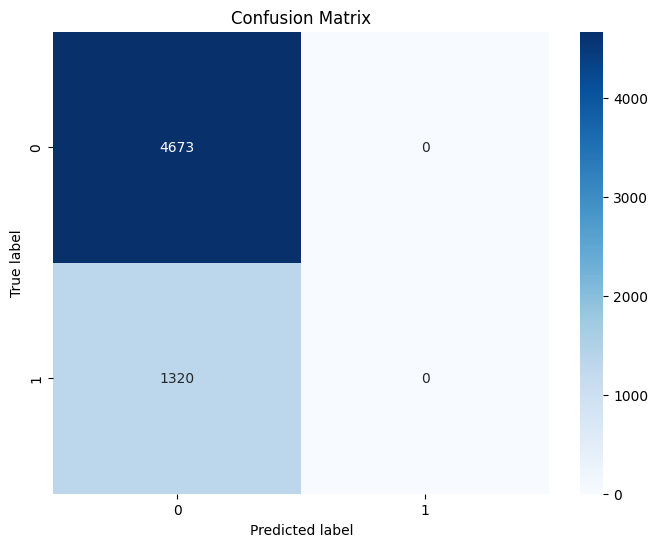

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **MACHINE LEARNING METHOD(FEATURE IMPORTANCE)**

In [ ]:
fi = pd.DataFrame({'features':X_train.columns, 'importance':abs(logreg_grid.best_estimator_.coef_[0])}).sort_values(by=['importance'],ascending = False)
fi

features  importance
85      X18    3.031277
77       X1    1.911953
90      X23    1.569035
86      X19    1.561853
80      X13    1.492963
..      ...         ...
48     X9_0    0.016725
25    X7_-2    0.013548
23     X6_8    0.012987
28     X7_2    0.011481
46    X9_-1    0.006295

[91 rows x 2 columns]

<Axes: xlabel='importance', ylabel='features'>

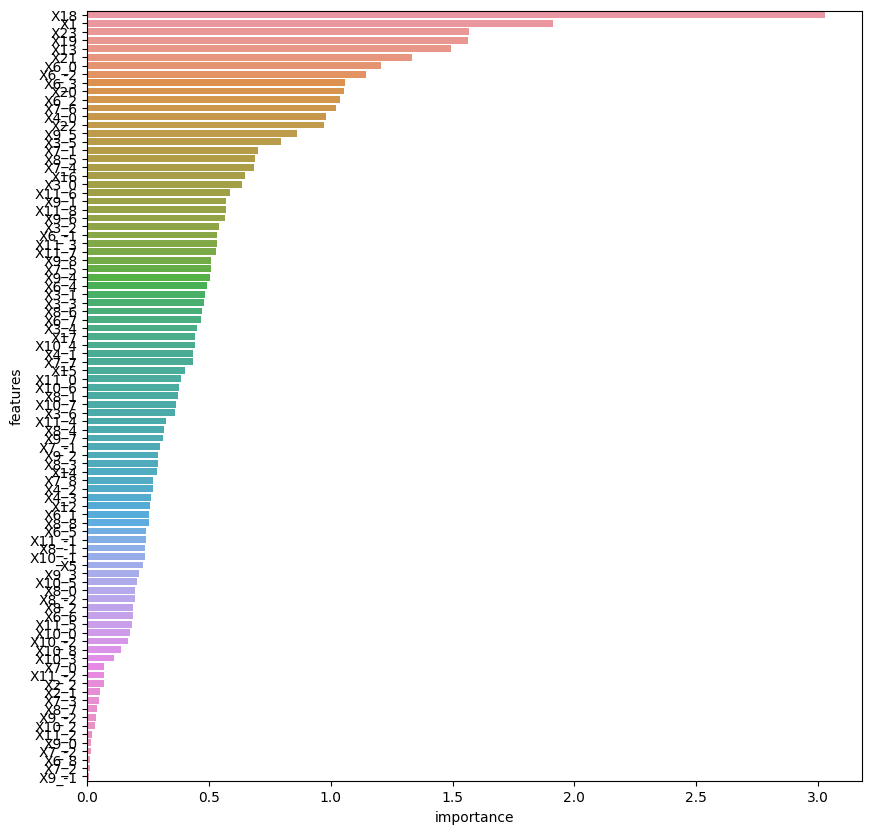

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x="importance", y="features", data=fi)

In [ ]:
important_features = fi[fi['importance'] > 0.45]

In [ ]:
selected_features = important_features['features']

# Optionally, print or use the selected features
print("Selected Features:", selected_features)


Selected Features: 85      X18
77       X1
90      X23
86      X19
80      X13
88      X21
15     X6_0
14    X6_-2
18     X6_3
87      X20
17     X6_2
32     X7_6
9      X4_0
89      X22
53     X9_5
7      X3_5
27     X7_1
42     X8_5
30     X7_4
83      X16
2      X3_0
74    X11_6
49     X9_1
76    X11_8
54     X9_6
4      X3_2
13    X6_-1
71    X11_3
75    X11_7
56     X9_8
31     X7_5
52     X9_4
19     X6_4
3      X3_1
5      X3_3
43     X8_6
22     X6_7
Name: features, dtype: object


In [ ]:
new_X_train = X_train[selected_features]
new_X_test = X_test[selected_features]
new_X_val = X_val[selected_features]
# Display the new DataFrame
print("New DataFrame with selected features:")
print(new_X_train)
print(new_X_test)
print(new_X_val)

New DataFrame with selected features:
            X18        X1       X23       X19       X13       X21  X6_0  \
0      0.027723  0.333333  0.022764  0.007719  0.388779  0.022689   1.0   
1      0.005836  0.232323  0.000000  0.000176  0.069017  0.000000   0.0   
2      0.007093  0.202020  0.028455  0.037405  0.069620  0.009454   1.0   
3      0.011881  0.101010  0.005691  0.002601  0.172327  0.009454   0.0   
4      0.023780  0.040404  0.011384  0.001253  0.100449  0.001891   1.0   
...         ...       ...       ...       ...       ...       ...   ...   
23967  0.000000  0.171717  0.000000  0.000000  0.066220  0.000000   0.0   
23968  0.003960  0.080808  0.000000  0.001781  0.085842  0.000000   0.0   
23969  0.000000  0.040404  0.000000  0.000000  0.066220  0.000000   0.0   
23970  0.012446  0.272727  0.021311  0.003501  0.233497  0.014647   1.0   
23971  0.000000  0.171717  0.000000  0.000000  0.070101  0.000000   0.0   

       X6_-2  X6_3       X20  ...  X11_3  X11_7  X9_8  X7_5  

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}



Logistic Regression Metrics:
Accuracy: 0.8137516688918558
Precision: 0.7985736439421258
Recall: 0.8137516688918558
F1-score: 0.7843195457577613


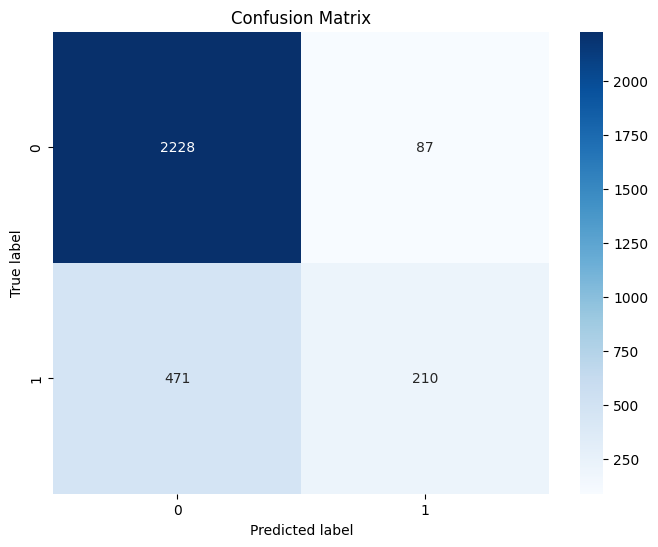

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8214881548214882
Precision: 0.8030919000432586
Recall: 0.8214881548214882
F1-score: 0.79433819303343
Confusion Matrix:
[[2264   94]
 [ 441  198]]


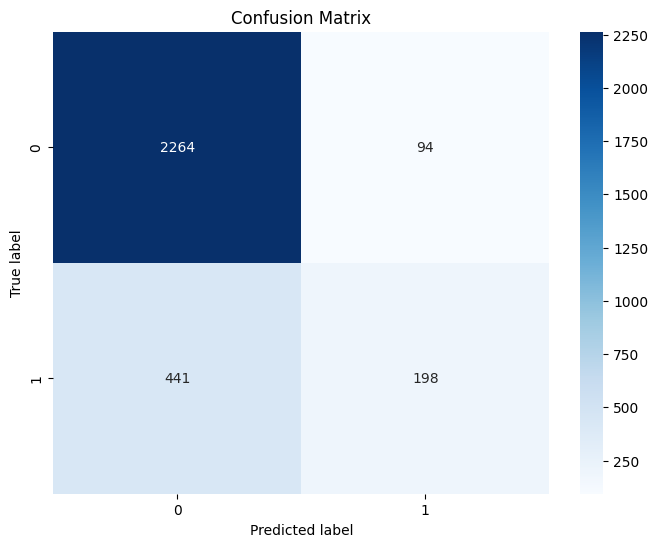

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **FILTER METHOD**  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Filter method: Mutual Information
k_best = 35  # Select top 35 features
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Train a classifier on the selected features
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
f1_score = f1_score(y_val, y_pred,average='weighted')
print(f"Accuracy using filter method: {accuracy}")
print(f"F1score using wrapper method: {f1_score}")

Accuracy using filter method: 0.815086782376502
F1score using wrapper method: 0.7914713681210794


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val)


Logistic Regression Metrics:
Accuracy: 0.8117489986648865
Precision: 0.7941285901605732
Recall: 0.8117489986648865
F1-score: 0.7853784982437794


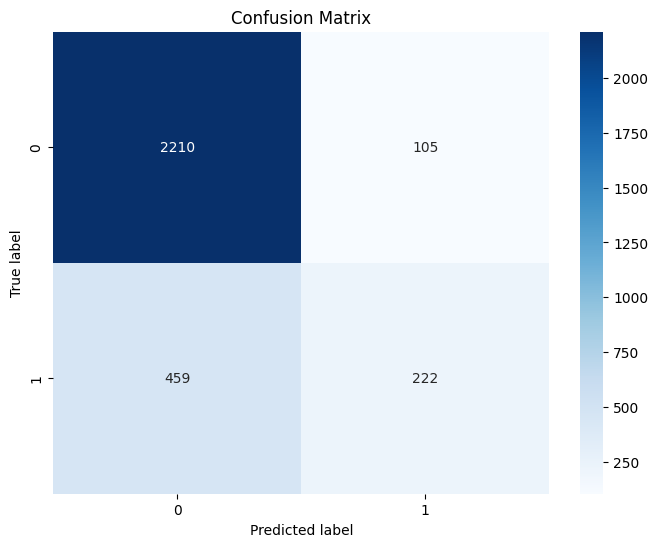

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8241574908241575
Precision: 0.8062139338302193
Recall: 0.8241574908241575
F1-score: 0.8025471013854177
Confusion Matrix:
[[2244  114]
 [ 413  226]]


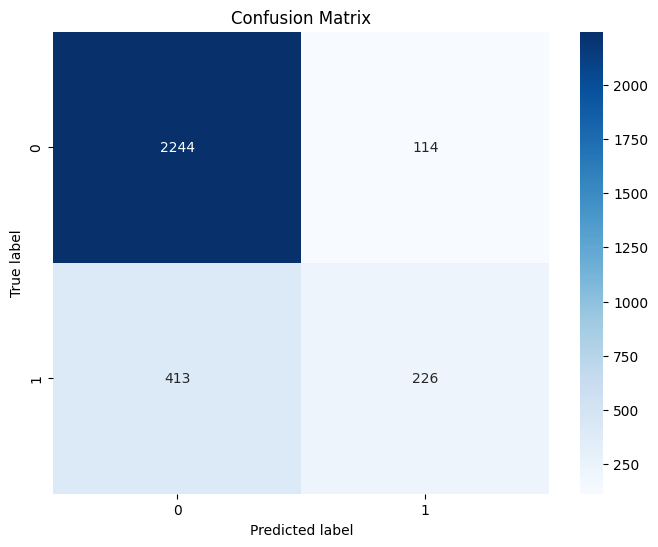

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **WRAPPER METHOD**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.datasets import load_digits

n_features_to_select = 15  # Select top 15 features
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=n_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Train a classifier on the selected features
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
f1_score = f1_score(y_val, y_pred ,average='weighted')

print(f"Accuracy using wrapper method: {accuracy}")
print(f"F1score using wrapper method: {f1_score}")

Accuracy using wrapper method: 0.8104138851802403
F1score using wrapper method: 0.7849375063839696


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train_selected, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val_selected)


Logistic Regression Metrics:
Accuracy: 0.8044058744993324
Precision: 0.7876719613041343
Recall: 0.8044058744993324
F1-score: 0.7656630591901069


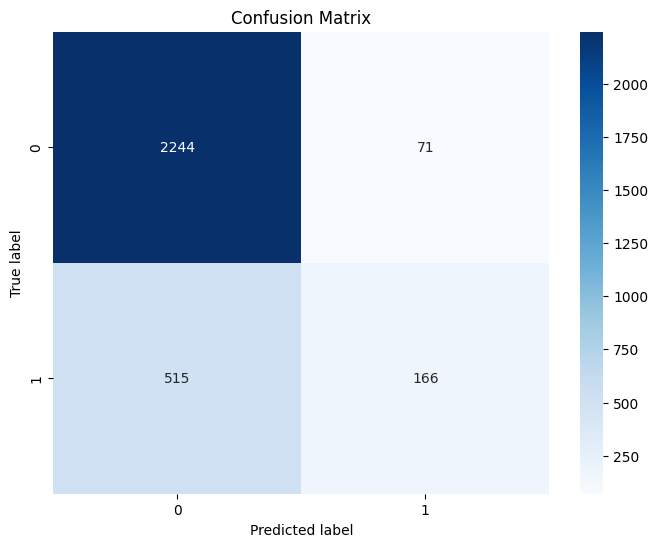

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
X_test_selected = selector.transform(X_test)

Accuracy: 0.8144811478144811
Precision: 0.7939338955936466
Recall: 0.8144811478144811
F1-score: 0.7797476450390021
Confusion Matrix:
[[2279   79]
 [ 477  162]]


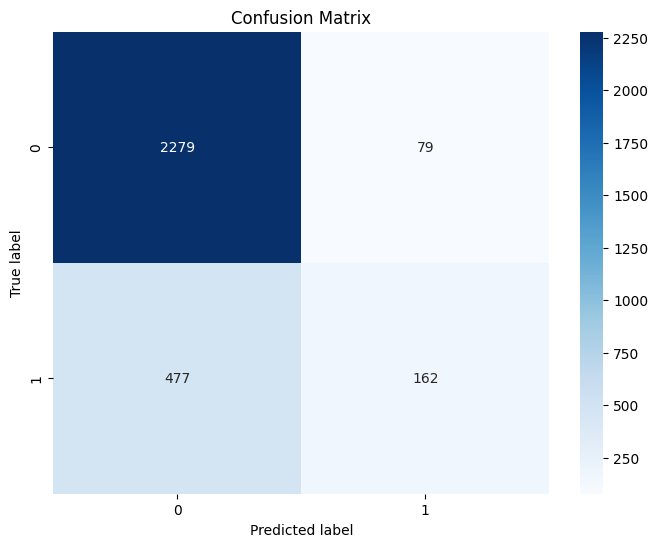

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test_selected)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# **HIGH DIMENSIONAL DATASET**

### **DATA EXPLORATION**

In [ ]:
!gdown 1ANbNbfl-3la6eeNGJVRB1Qbduz_-32YM

Downloading...
From: https://drive.google.com/uc?id=1ANbNbfl-3la6eeNGJVRB1Qbduz_-32YM
To: /content/train.csv
100% 48.1M/48.1M [00:01<00:00, 30.9MB/s]


In [ ]:
!gdown 1362ofo9CMqwDv1NqCKZqZMqiW0iOr9P1

Downloading...
From: https://drive.google.com/uc?id=1362ofo9CMqwDv1NqCKZqZMqiW0iOr9P1
To: /content/test.csv
100% 19.3M/19.3M [00:00<00:00, 35.7MB/s]


In [ ]:
df_train=pd.read_csv('train.csv')
df_test= pd.read_csv('test.csv')
df = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
...                  ...                ...                ...   
10294           0.310155          -0.053391          -0.099109   
10295           0.363385          -0.039214          -0.105915   
10296           0.349966           0.030077          -0.115788   
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             -0.995279         -0.983111         -0.913526         -0.995112   
1             -0.998245         -0.975300         -0.960322         -0.998807   
2             -0.995380         -0.967187         -0.978944         -0.996520   
3             -0.996091         -0.983403         -0.990675         -0.997099   
4             -0.998139         -0.980817         -0.990482         -0.998321   
...                 ...               ...               ...               ...   
10294         -0.287866         -0.140589         -0.215088         -0.356083   
10295         -0.305388          0.028148         -0.196373         -0.373540   
10296         -0.329638         -0.042143         -0.250181         -0.388017   
10297         -0.323114         -0.229775         -0.207574         -0.392380   
10298         -0.330046         -0.195253         -0.164339         -0.430974   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0             -0.983185         -0.923527         -0.934724  ...   
1             -0.974914         -0.957686         -0.943068  ...   
2             -0.963668         -0.977469         -0.938692  ...   
3             -0.982750         -0.989302         -0.938692  ...   
4             -0.979672         -0.990441         -0.942469  ...   
...                 ...               ...               ...  ...   
10294         -0.148775         -0.232057          0.185361  ...   
10295         -0.030036         -0.270237          0.185361  ...   
10296         -0.133257         -0.347029          0.007471  ...   
10297         -0.279610         -0.289477          0.007471  ...   
10298         -0.218295         -0.229933         -0.111527  ...   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                            -0.710304                    -0.112754   
1                            -0.861499                     0.053477   
2                            -0.760104                    -0.118559   
3                            -0.482845                    -0.036788   
4                            -0.699205                     0.123320   
...                                ...                          ...   
10294                        -0.750809                    -0.337422   
10295                        -0.700274                    -0.736701   
10296                        -0.467179                    -0.181560   
10297                        -0.617737                     0.444558   
10298                        -0.436940                     0.598808   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                  0.030400                         -0.464761   
1                                 -0.007435                         -0.732626   
2                                  0.177899                          0.100699   
3                                 -0.012892                          0.640011   
4                                  0.122542                          0.693578   
...                                     ...                               ...   
1029

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [ ]:
print(f'Is there any duplicate rows? {df.duplicated().any()}')
print(f'There are {len(df)-len(df.drop_duplicates()):,} duplicate rows')

Is there any duplicate rows? False
There are 0 duplicate rows


In [ ]:
nulls = df.isnull().sum(axis=0).sort_values(ascending=False); nulls

tBodyAcc-mean()-X            0
fBodyAccJerk-kurtosis()-Y    0
fBodyAccJerk-meanFreq()-X    0
fBodyAccJerk-meanFreq()-Y    0
fBodyAccJerk-meanFreq()-Z    0
                            ..
tBodyGyroJerk-iqr()-Z        0
tBodyGyroJerk-iqr()-Y        0
tBodyGyroJerk-iqr()-X        0
tBodyGyroJerk-energy()-Z     0
Activity                     0
Length: 563, dtype: int64

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64


<Axes: >

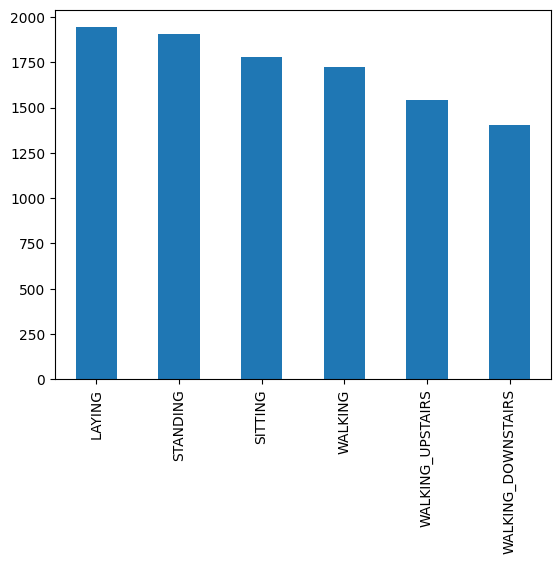

In [ ]:
print(df['Activity'].value_counts())
df['Activity'].value_counts().plot(kind='bar')

In [ ]:
feature_cols = df.columns[:-1]
label = df.columns[-1:]

X = df[feature_cols]
y = df[label]

In [ ]:
y

Activity
0              STANDING
1              STANDING
2              STANDING
3              STANDING
4              STANDING
...                 ...
10294  WALKING_UPSTAIRS
10295  WALKING_UPSTAIRS
10296  WALKING_UPSTAIRS
10297  WALKING_UPSTAIRS
10298  WALKING_UPSTAIRS

[10299 rows x 1 columns]

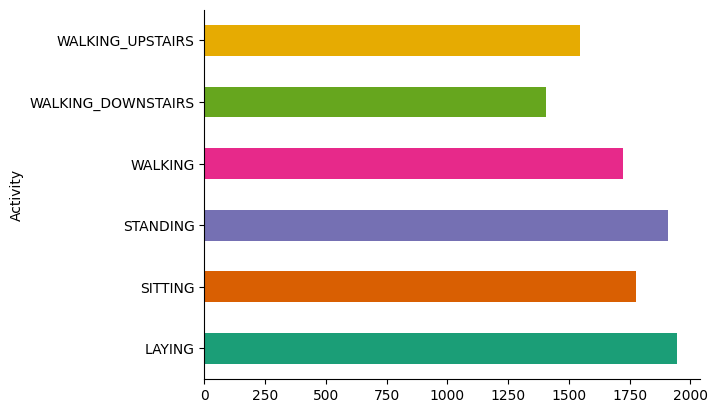

In [ ]:
y.groupby('Activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
X

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
...                  ...                ...                ...   
10294           0.310155          -0.053391          -0.099109   
10295           0.363385          -0.039214          -0.105915   
10296           0.349966           0.030077          -0.115788   
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             -0.995279         -0.983111         -0.913526         -0.995112   
1             -0.998245         -0.975300         -0.960322         -0.998807   
2             -0.995380         -0.967187         -0.978944         -0.996520   
3             -0.996091         -0.983403         -0.990675         -0.997099   
4             -0.998139         -0.980817         -0.990482         -0.998321   
...                 ...               ...               ...               ...   
10294         -0.287866         -0.140589         -0.215088         -0.356083   
10295         -0.305388          0.028148         -0.196373         -0.373540   
10296         -0.329638         -0.042143         -0.250181         -0.388017   
10297         -0.323114         -0.229775         -0.207574         -0.392380   
10298         -0.330046         -0.195253         -0.164339         -0.430974   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0             -0.983185         -0.923527         -0.934724  ...   
1             -0.974914         -0.957686         -0.943068  ...   
2             -0.963668         -0.977469         -0.938692  ...   
3             -0.982750         -0.989302         -0.938692  ...   
4             -0.979672         -0.990441         -0.942469  ...   
...                 ...               ...               ...  ...   
10294         -0.148775         -0.232057          0.185361  ...   
10295         -0.030036         -0.270237          0.185361  ...   
10296         -0.133257         -0.347029          0.007471  ...   
10297         -0.279610         -0.289477          0.007471  ...   
10298         -0.218295         -0.229933         -0.111527  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                            -0.298676                        -0.710304   
1                            -0.595051                        -0.861499   
2                            -0.390748                        -0.760104   
3                            -0.117290                        -0.482845   
4                            -0.351471                        -0.699205   
...                                ...                              ...   
10294                        -0.376278                        -0.750809   
10295                        -0.320418                        -0.700274   
10296                        -0.118854                        -0.467179   
10297                        -0.205445                        -0.617737   
10298                        -0.072237                        -0.436940   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                        -0.112754                              0.030400   
1                         0.053477                             -0.007435   
2                        -0.118559                              0.177899   
3                        -0.036788                             -0.012892   
4                         0.123320                              0.122542   
...                            ...                                 

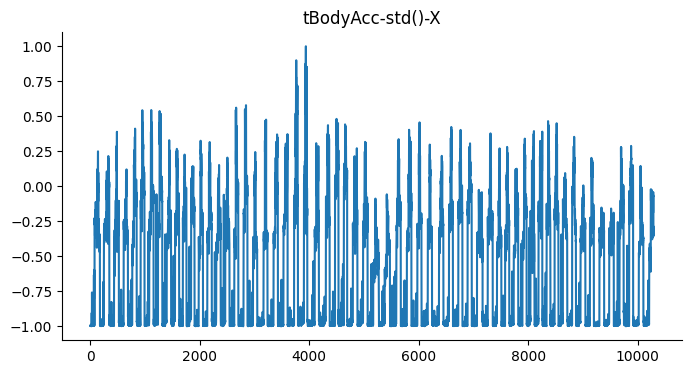

In [ ]:
X['tBodyAcc-std()-X'].plot(kind='line', figsize=(8, 4), title='tBodyAcc-std()-X')
plt.gca().spines[['top', 'right']].set_visible(False)

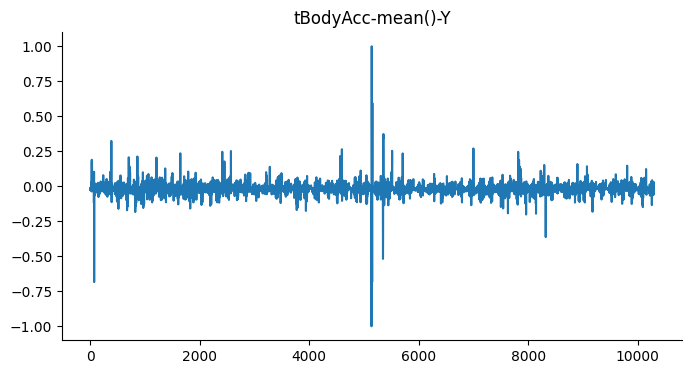

In [ ]:
X['tBodyAcc-mean()-Y'].plot(kind='line', figsize=(8, 4), title='tBodyAcc-mean()-Y')
plt.gca().spines[['top', 'right']].set_visible(False)

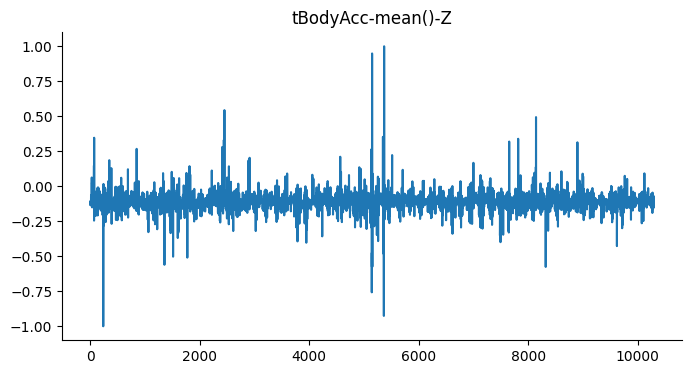

In [ ]:
X['tBodyAcc-mean()-Z'].plot(kind='line', figsize=(8, 4), title='tBodyAcc-mean()-Z')
plt.gca().spines[['top', 'right']].set_visible(False)

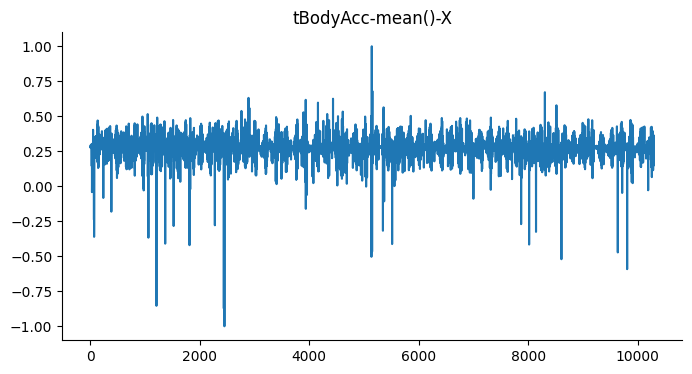

In [ ]:
X['tBodyAcc-mean()-X'].plot(kind='line', figsize=(8, 4), title='tBodyAcc-mean()-X')
plt.gca().spines[['top', 'right']].set_visible(False)

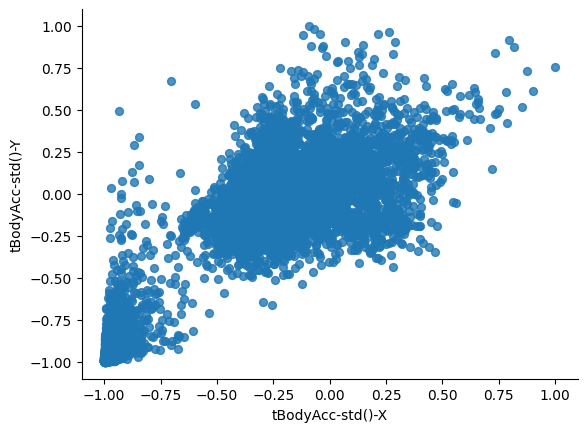

In [ ]:
X.plot(kind='scatter', x='tBodyAcc-std()-X', y='tBodyAcc-std()-Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

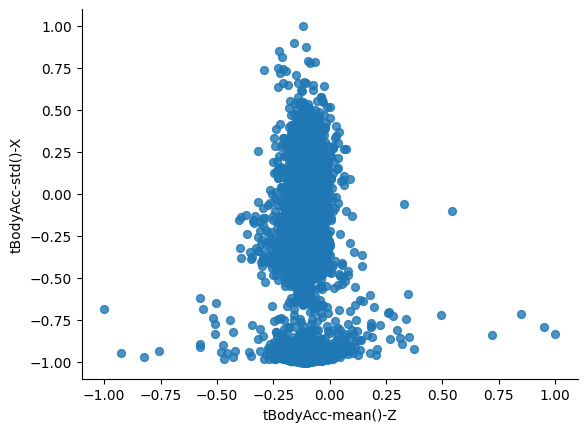

In [ ]:
X.plot(kind='scatter', x='tBodyAcc-mean()-Z', y='tBodyAcc-std()-X', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

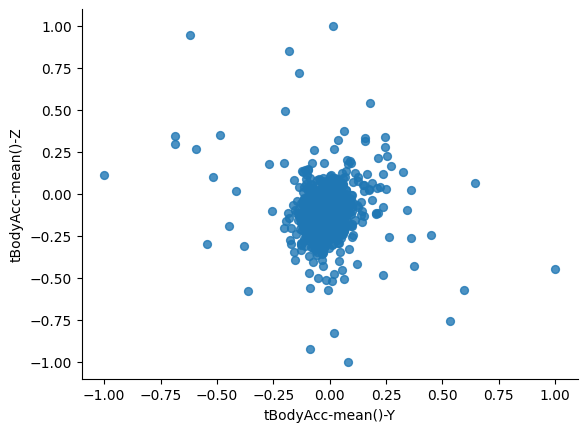

In [ ]:
X.plot(kind='scatter', x='tBodyAcc-mean()-Y', y='tBodyAcc-mean()-Z', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

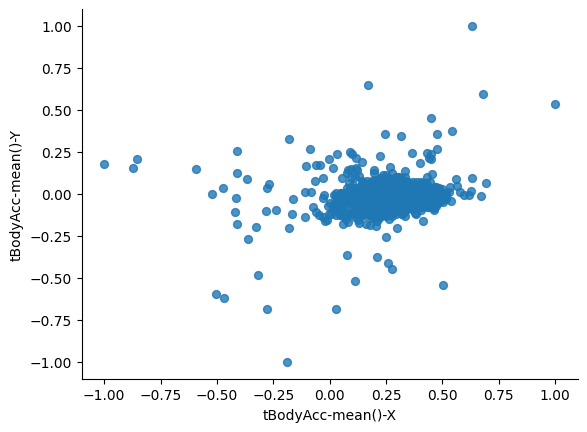

In [ ]:
X.plot(kind='scatter', x='tBodyAcc-mean()-X', y='tBodyAcc-mean()-Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

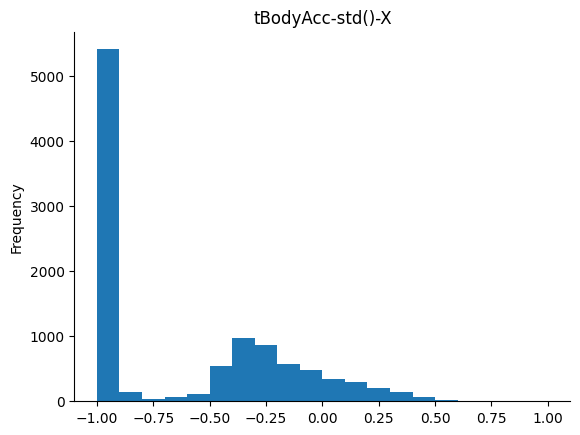

In [ ]:
X['tBodyAcc-std()-X'].plot(kind='hist', bins=20, title='tBodyAcc-std()-X')
plt.gca().spines[['top', 'right',]].set_visible(False)

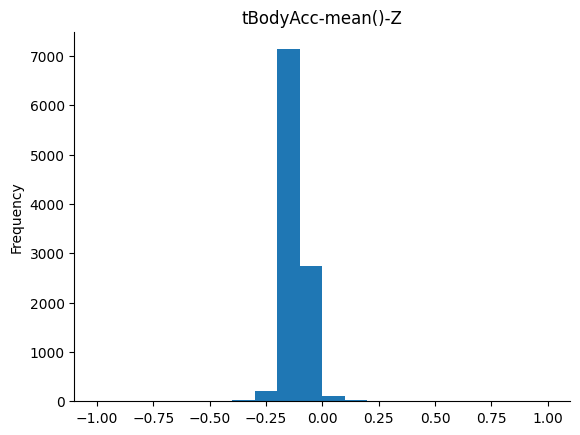

In [ ]:
X['tBodyAcc-mean()-Z'].plot(kind='hist', bins=20, title='tBodyAcc-mean()-Z')
plt.gca().spines[['top', 'right',]].set_visible(False)

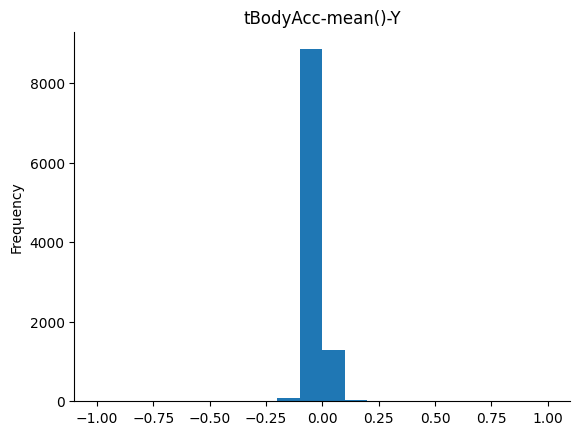

In [ ]:
X['tBodyAcc-mean()-Y'].plot(kind='hist', bins=20, title='tBodyAcc-mean()-Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

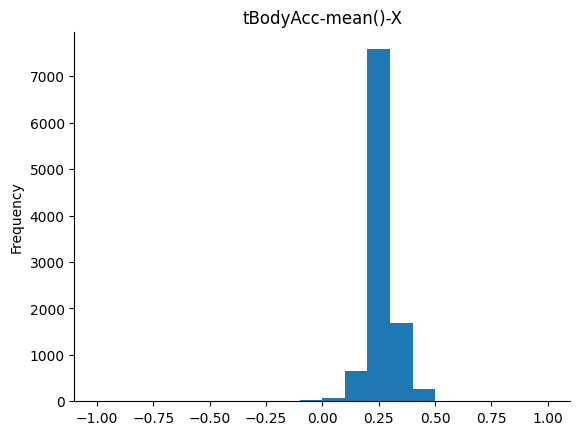

In [ ]:
X['tBodyAcc-mean()-X'].plot(kind='hist', bins=20, title='tBodyAcc-mean()-X')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

<ipython-input-111-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                                      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  \
tBodyAcc-mean()-X                              1.000000           0.128037   
tBodyAcc-mean()-Y                              0.128037           1.000000   
tBodyAcc-mean()-Z                             -0.230302          -0.029882   
tBodyAcc-std()-X                               0.004590          -0.046352   
tBodyAcc-std()-Y                              -0.016785          -0.046996   
...                                                 ...                ...   
angle(tBodyGyroJerkMean,gravityMean)           0.034296           0.077627   
angle(X,gravityMean)                          -0.041021          -0.007513   
angle(Y,gravityMean)                           0.034053          -0.005616   
angle(Z,gravityMean)                           0.030656          -0.016233   
subject                                        0.020345          -0.001577   

                                      tBodyAcc-mean()-Z  tBodyA

### **DATA SPLITTING AND ONE HOT ENCODING**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(8239, 562)
(8239, 1)
(1030, 562)
(1030, 1)
(1030, 562)
(1030, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X_train)

In [ ]:
X_scaled_val = scaler.transform(X_val)

In [ ]:
X_scaled_test = scaler.transform(X_test)

In [ ]:
X_scaled_column = scaler.get_feature_names_out()
X_train = pd.DataFrame(X_scaled, columns=X_scaled_column)
X_val = pd.DataFrame(X_scaled_val, columns=X_scaled_column)
X_test = pd.DataFrame(X_scaled_test, columns=X_scaled_column)

In [ ]:
lblEncoder_Y = LabelEncoder()
train_encoded_labels = lblEncoder_Y.fit_transform(y_train)
train_encoded_labels


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5, 3, 1, ..., 3, 2, 3])

In [ ]:
val_encoded_labels = lblEncoder_Y.transform(y_val)
val_encoded_labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0, 5, 2, ..., 0, 0, 4])

In [ ]:
test_encoded_labels = lblEncoder_Y.transform(y_test)
test_encoded_labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([3, 1, 0, ..., 4, 1, 1])

In [ ]:
y_train = train_encoded_labels
y_val = val_encoded_labels
y_test = test_encoded_labels

In [ ]:
X_train

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.758826           0.377880           0.447506   
1              0.753016           0.383027           0.472189   
2              0.761022           0.396788           0.447184   
3              0.757740           0.399349           0.431491   
4              0.761321           0.403051           0.453782   
...                 ...                ...                ...   
8234           0.762264           0.394634           0.442603   
8235           0.761127           0.388504           0.451978   
8236           0.770084           0.395605           0.440042   
8237           0.762067           0.395228           0.443122   
8238           0.752013           0.410603           0.452340   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             0.460616          0.573736          0.365806          0.427007   
1             0.423384          0.567989          0.405507          0.402285   
2             0.001526          0.007594          0.004313          0.001494   
3             0.248634          0.458238          0.196864          0.234459   
4             0.001862          0.015354          0.009568          0.001756   
...                ...               ...               ...               ...   
8234          0.005861          0.020735          0.031654          0.005589   
8235          0.222284          0.447938          0.280968          0.213735   
8236          0.186359          0.391678          0.287618          0.175667   
8237          0.002536          0.007280          0.017071          0.002415   
8238          0.315638          0.428648          0.424375          0.286987   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0             0.611535          0.377263          0.527268  ...   
1             0.606822          0.403229          0.645966  ...   
2             0.007861          0.004478          0.029485  ...   
3             0.470959          0.201052          0.307643  ...   
4             0.015333          0.010641          0.030362  ...   
...                ...               ...               ...  ...   
8234          0.022813          0.034438          0.035460  ...   
8235          0.443925          0.285156          0.260128  ...   
8236          0.373093          0.291216          0.226459  ...   
8237          0.007857          0.018354          0.031248  ...   
8238          0.434672          0.425461          0.391580  ...   

      fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0                            0.523489                         0.387266   
1                            0.679613                         0.591448   
2                            0.099087                         0.013230   
3                            0.631330                         0.526858   
4                            0.543079                         0.416369   
...                               ...                              ...   
8234                         0.249621                         0.114465   
8235                         0.712593                         0.613368   
8236                         0.767591                         0.689240   
8237                         0.055455                         0.008151   
8238                         0.565174                         0.430092   

      angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                        0.446455                              0.744232   
1                        0.511515                              0.728847   
2                        0.345418                              0.530957   
3                        0.579067                              0.148727   
4                        0.505388                              0.372470   
...                           ...                                   ...   
8234                     0.503002            

In [ ]:
y_train

array([5, 3, 1, ..., 3, 2, 3])

### **MODEL EVALUATION**

In [ ]:
# Model: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(rf_classifier, rf_params, scoring='accuracy', cv=3)
rf_grid.fit(X_train, y_train)

# Evaluate on validation set
y_val_predictions = rf_grid.best_estimator_.predict(X_val)



Accuracy: 0.9786407766990292
Precision: 0.9787699452259893
Recall: 0.9786407766990292
F1-score: 0.9786180343312274
Confusion Matrix:
[[205   0   0   0   0   0]
 [  0 169  10   0   0   0]
 [  0   5 171   0   0   0]
 [  0   0   0 195   0   0]
 [  0   0   0   2 139   3]
 [  0   0   0   0   2 129]]


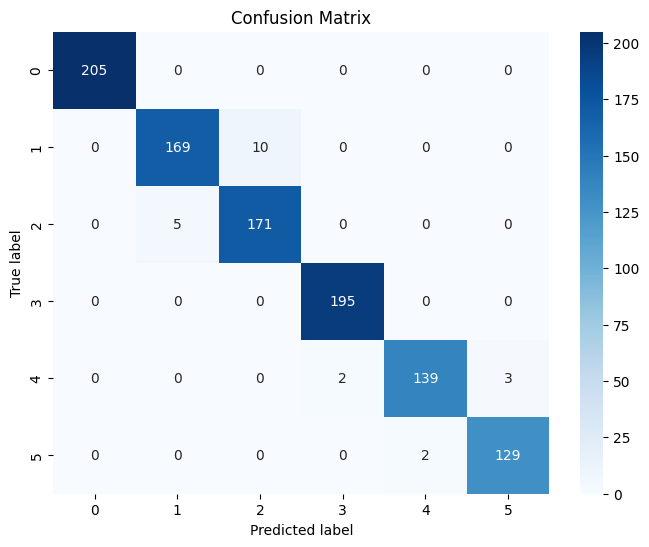

Trivial Baseline Accuracy: 0.19902912621359223


In [ ]:
# Print classification metrics
print("Accuracy:", accuracy_score(y_val, y_val_predictions))
print("Precision:", precision_score(y_val, y_val_predictions, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions, average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_predictions)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Trivial Baseline
trivial_baseline = len(y_val[y_val == 0]) / len(y_val)
print("Trivial Baseline Accuracy:", trivial_baseline)

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val)

In [ ]:
logreg_grid.best_estimator_

LogisticRegression(C=100, max_iter=2000, solver='liblinear')


Logistic Regression Metrics:
Accuracy: 0.987378640776699
Precision: 0.9876269874606178
Recall: 0.987378640776699
F1-score: 0.9873508526748238


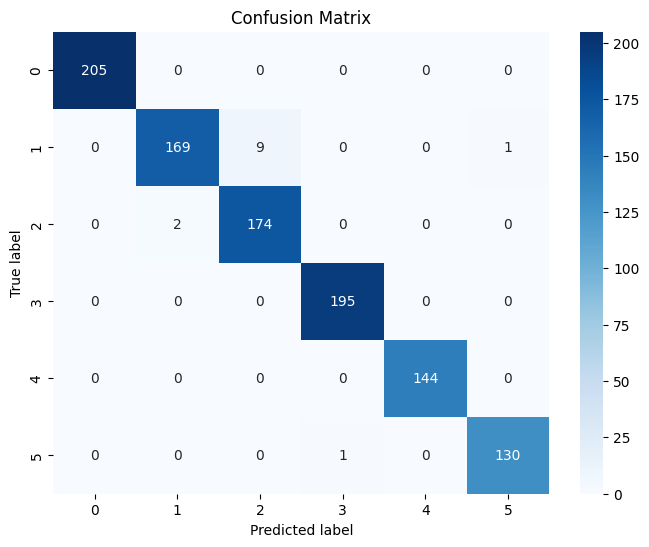

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9864077669902913
Precision: 0.9864142975649564
Recall: 0.9864077669902913
F1-score: 0.9863962877920754
Confusion Matrix:
[[201   0   0   0   0   0]
 [  0 192   5   0   0   1]
 [  0   7 171   0   0   0]
 [  0   0   0 173   0   1]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0 139]]


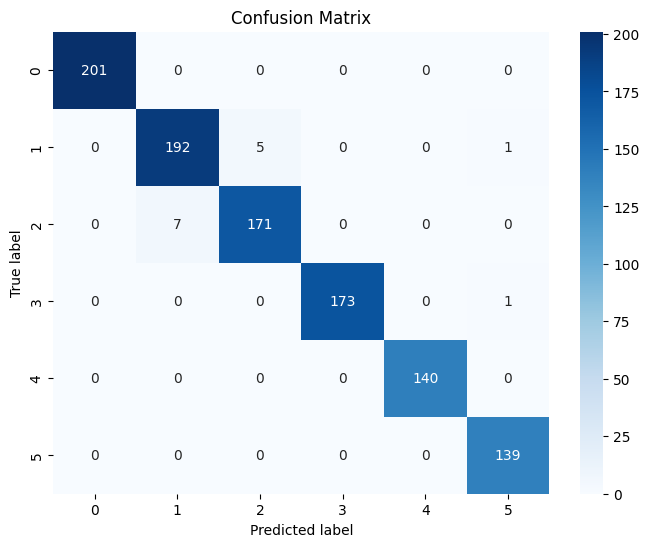

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.17378640776699028
F1-score: 0.173527961910927


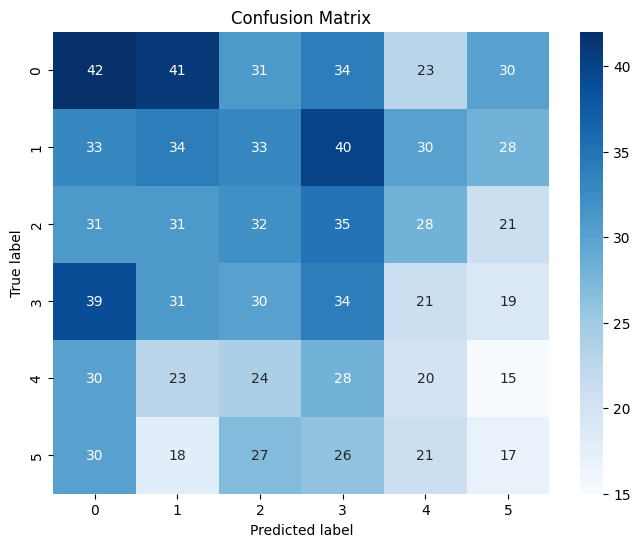

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

#Evaluate on Validation Data
y_val_predictions = svm_classifier.predict(X_val)

accuracy = accuracy_score(y_test, y_val_predictions)
conf_matrix = confusion_matrix(y_test, y_val_predictions)
f1_score = f1_score(y_test, y_val_predictions,average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.17572815533980582
F1-score: 0.1753774938505993


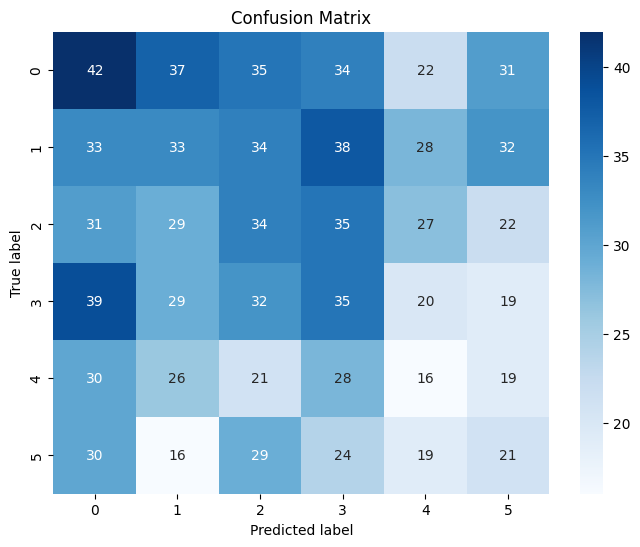

In [ ]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

#Evaluate on Validation Data
y_val_predictions = clf.predict(X_val)

accuracy = accuracy_score(y_test, y_val_predictions)
conf_matrix = confusion_matrix(y_test, y_val_predictions)
f1_score = f1_score(y_test, y_val_predictions,average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **APPLICATION OF PCA FOR DIMENSIONALITY REDUCTION**

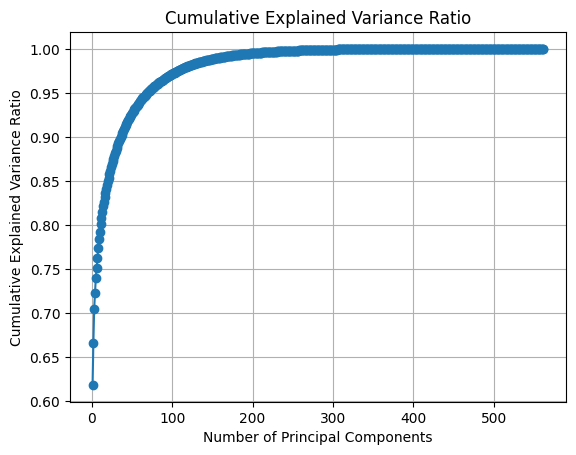

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Transform validation and test data using the learned PCA transformation
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

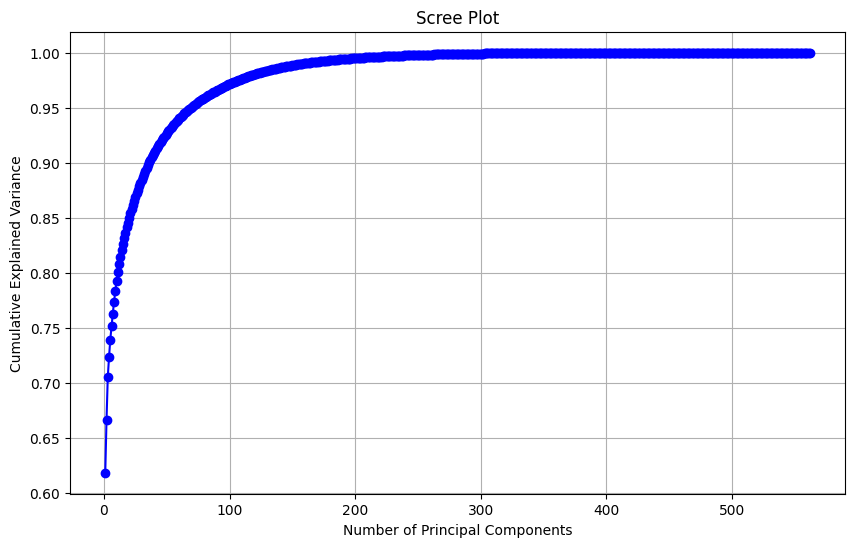

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
n_components_optimal = 200  # Replace with your chosen number of components

# Create a PCA instance with the optimal number of components
pca = PCA(n_components=n_components_optimal)

# Fit and transform your training data
X_train_pca = pca.fit_transform(X_train)

# Transform your validation and test data using the same PCA model
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca

array([[ 3.02362396e+00, -8.76803133e-01,  1.73181424e-01, ...,
         2.51407071e-02,  6.50663568e-03, -6.03058681e-04],
       [ 4.13838460e+00,  7.71747681e-01,  4.10920901e-03, ...,
         4.41073809e-02,  3.77550065e-02,  2.56413081e-02],
       [-2.93119379e+00,  2.68716497e-01, -4.70549086e-01, ...,
        -9.22069301e-03,  5.28972936e-03, -3.15182955e-03],
       ...,
       [ 1.25618368e+00, -8.88597197e-01,  4.19462193e-02, ...,
        -5.84181145e-03,  3.63616476e-02, -6.35177323e-03],
       [-2.85899149e+00,  2.45770673e-01, -5.54756989e-01, ...,
         8.79402851e-03, -9.41024618e-04, -1.32060693e-02],
       [ 2.76858628e+00, -3.15470227e-01,  9.18054645e-02, ...,
         1.62655203e-02, -3.21572843e-02,  1.34355681e-02]])

In [ ]:
# Model 2: Logistic Regression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train_pca, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_valid_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}



Logistic Regression Metrics:
Accuracy: 0.9864077669902913
Precision: 0.9864737255241345
Recall: 0.9864077669902913
F1-score: 0.9863850742854826


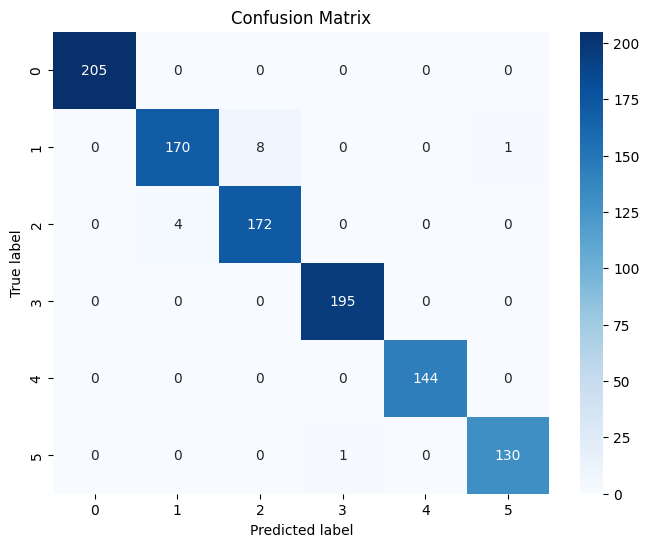

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9854368932038835
Precision: 0.9855252229899925
Recall: 0.9854368932038835
F1-score: 0.9854204945071456
Confusion Matrix:
[[201   0   0   0   0   0]
 [  0 193   4   0   0   1]
 [  0   9 169   0   0   0]
 [  0   0   0 173   0   1]
 [  0   0   0   0 140   0]
 [  0   0   0   0   0 139]]


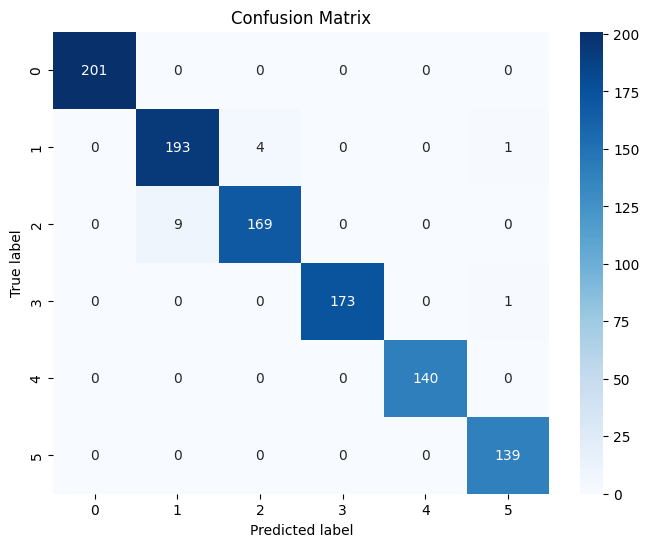

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test_pca)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## **FEATURE SELECTION**

### **MACHINE LEARNING METHOD (FEATURE IMPORTANCE)**

In [ ]:
X_train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

In [ ]:
fi = pd.DataFrame({'features':X_train.columns, 'importance':abs(logreg_grid.best_estimator_.coef_[0])}).sort_values(by=['importance'],ascending = False)
fi

features  importance
56               tGravityAcc-energy()-X    6.905544
52                  tGravityAcc-min()-X    6.264789
40                 tGravityAcc-mean()-X    6.262900
49                  tGravityAcc-max()-X    6.048950
558                angle(X,gravityMean)    5.407912
..                                  ...         ...
399  fBodyAccJerk-bandsEnergy()-33,40.1    0.001088
388    fBodyAccJerk-bandsEnergy()-57,64    0.000697
401  fBodyAccJerk-bandsEnergy()-49,56.1    0.000164
402  fBodyAccJerk-bandsEnergy()-57,64.1    0.000156
406  fBodyAccJerk-bandsEnergy()-49,64.1    0.000124

[562 rows x 2 columns]

In [ ]:
plt.figure(figsize=(10,100))

sns.barplot(x="importance", y="features", data=fi)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
important_features = fi[fi['importance'] > 0.2]

In [ ]:
important_features


features  importance
56           tGravityAcc-energy()-X    6.905544
52              tGravityAcc-min()-X    6.264789
40             tGravityAcc-mean()-X    6.262900
49              tGravityAcc-max()-X    6.048950
558            angle(X,gravityMean)    5.407912
..                              ...         ...
154         tBodyGyro-arCoeff()-Z,2    0.213120
0                 tBodyAcc-mean()-X    0.210557
549  fBodyBodyGyroJerkMag-entropy()    0.209375
120              tBodyGyro-mean()-X    0.205114
2                 tBodyAcc-mean()-Z    0.200456

[165 rows x 2 columns]

In [ ]:
selected_features = important_features['features']

# Optionally, print or use the selected features
print("Selected Features:", selected_features)

# Create a dataframe with the selected features
selected_features_df = X[selected_features]

Selected Features: 56             tGravityAcc-energy()-X
52                tGravityAcc-min()-X
40               tGravityAcc-mean()-X
49                tGravityAcc-max()-X
558              angle(X,gravityMean)
                    ...              
154           tBodyGyro-arCoeff()-Z,2
0                   tBodyAcc-mean()-X
549    fBodyBodyGyroJerkMag-entropy()
120                tBodyGyro-mean()-X
2                   tBodyAcc-mean()-Z
Name: features, Length: 165, dtype: object


In [ ]:
selected_features_df

tGravityAcc-energy()-X  tGravityAcc-min()-X  tGravityAcc-mean()-X  \
0                    0.899469             0.977436              0.963396   
1                    0.907829             0.984520              0.966561   
2                    0.908668             0.986770              0.966878   
3                    0.910621             0.986821              0.967615   
4                    0.912235             0.987434              0.968224   
...                       ...                  ...                   ...   
10294                0.712964             0.903413              0.890968   
10295                0.713748             0.903793              0.891281   
10296                0.712784             0.903793              0.890897   
10297                0.717394             0.909007              0.892736   
10298                0.721405             0.909007              0.894331   

       tGravityAcc-max()-X  angle(X,gravityMean)  tGravityAcc-sma()  \
0                 0.892055             -0.841247          -0.375426   
1                 0.892060             -0.844788          -0.383430   
2                 0.892401             -0.848933          -0.401602   
3                 0.893817             -0.848649          -0.400278   
4                 0.893817             -0.847865          -0.400477   
...                    ...                   ...                ...   
10294             0.823272             -0.651732           0.194878   
10295             0.823272             -0.655181           0.181283   
10296             0.822107             -0.655357           0.178977   
10297             0.823679             -0.659719           0.168668   
10298             0.825359             -0.660080           0.171842   

       tGravityAcc-energy()-Y  tGravityAcc-energy()-Z  \
0                   -0.970905               -0.975510   
1                   -0.970583               -0.978500   
2                   -0.970368               -0.981672   
3                   -0.969400               -0.982420   
4                   -0.967051               -0.984363   
...                       ...                     ...   
10294               -0.870515               -0.888599   
10295               -0.872342               -0.891822   
10296               -0.871197               -0.893504   
10297               -0.884788               -0.885275   
10298               -0.885692               -0.884370   

       tBodyAcc-correlation()-Y,Z  tBodyGyro-entropy()-X  ...  \
0                        0.660790               0.082632  ...   
1                        0.579382               0.007469  ...   
2                        0.608900              -0.260943  ...   
3                        0.507459              -0.930551  ...   
4                        0.599213              -0.628861  ...   
...                           ...                    ...  ...   
10294                   -0.022682              -0.105642  ...   
10295                    0.031417               0.408471  ...   
10296                    0.118835              -0.008002  ...   
10297                    0.122642              -0.523313  ...   
10298                    0.056253              -0.248298  ...   

       tBodyAcc-max()-X  tBodyGyroJerk-arCoeff()-Z,2  \
0             -0.934724                    -0.572370   
1             -0.943068                    -0.167457   
2             -0.938692                    -0.169308   
3             -0.938692                    -0.136809   
4             -0.942469                    -0.340967   
...                 ...                          ...   
10294          0.185361                     0.325343   
10295          0.185361                     0.354389   
10296          0.007471                     0.255297   
10297          0.007471                     0.288909   
10298         -0.111527                     0.171663   

       tBodyGyroJerkMag-entropy()  tBodyGyroJerk-min()-Z  \
0                       -0.619768         

**APPLICATION OF CHOSEN MODEL ON THE FEATURE SELECTED**

In [ ]:
new_X_train = X_train[selected_features]
new_X_test = X_test[selected_features]
new_X_val = X_val[selected_features]


In [ ]:
new_X_train

tGravityAcc-energy()-X  tGravityAcc-min()-X  tGravityAcc-mean()-X  \
0                   0.924802             0.975309              0.972193   
1                   0.908293             0.972345              0.965832   
2                   0.801106             0.933986              0.923044   
3                   0.949013             0.989556              0.981427   
4                   0.940256             0.987905              0.978103   
...                      ...                  ...                   ...   
8234                0.904548             0.973260              0.964385   
8235                0.884461             0.964632              0.956548   
8236                0.955860             0.990167              0.984013   
8237                0.940408             0.987617              0.978161   
8238                0.949116             0.985577              0.981459   

      tGravityAcc-max()-X  angle(X,gravityMean)  tGravityAcc-sma()  \
0                0.939257              0.106675           0.311173   
1                0.932855              0.117989           0.348348   
2                0.886375              0.195784           0.545201   
3                0.944899              0.077023           0.298591   
4                0.941162              0.101815           0.386723   
...                   ...                   ...                ...   
8234             0.929845              0.125248           0.440901   
8235             0.923592              0.148006           0.460144   
8236             0.949231              0.071744           0.278806   
8237             0.941565              0.080153           0.242880   
8238             0.950049              0.065954           0.209699   

      tGravityAcc-energy()-Y  tGravityAcc-energy()-Z  \
0                   0.044842                0.000857   
1                   0.052989                0.002195   
2                   0.126711                0.015435   
3                   0.008100                0.017196   
4                   0.028561                0.014409   
...                      ...                     ...   
8234                0.018107                0.046397   
8235                0.008189                0.082125   
8236                0.015890                0.005713   
8237                0.000461                0.027098   
8238                0.017408                0.000515   

      tBodyAcc-correlation()-Y,Z  tBodyGyro-entropy()-X  ...  \
0                       0.648477               0.888895  ...   
1                       0.475880               0.555284  ...   
2                       0.466897               0.174296  ...   
3                       0.670546               0.584036  ...   
4                       0.442146               0.257170  ...   
...                          ...                    ...  ...   
8234                    0.967484               0.101723  ...   
8235                    0.493834               0.519220  ...   
8236                    0.488063               0.581515  ...   
8237                    0.294742               0.285305  ...   
8238                    0.418504               0.668101  ...   

      tBodyAcc-max()-X  tBodyGyroJerk-arCoeff()-Z,2  \
0             0.527268                     0.772722   
1             0.645966                     0.606085   
2             0.029485                     0.392736   
3             0.307643                     0.745650   
4             0.030362                     0.460911   
...                ...                          ...   
8234          0.035460                     0.351748   
8235          0.260128                     0.654150   
8236          0.226459                     0.485566   
8237          0.031248                     0.500897   
8238          0.391580                     0.650995   

      tBodyGyroJerkMag-entropy()  tBodyGyroJerk-min()-Z  \
0                       0.940279               0.694453   
1                       0.981663           

In [ ]:
y_train

array([5, 3, 1, ..., 3, 2, 3])

Since the logisitic regression gave the best result on the actual data, so i run the log model on these new selected data

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', None],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 0.9825242718446602
Precision: 0.9827747323588815
Recall: 0.9825242718446602
F1-score: 0.9825210358298494


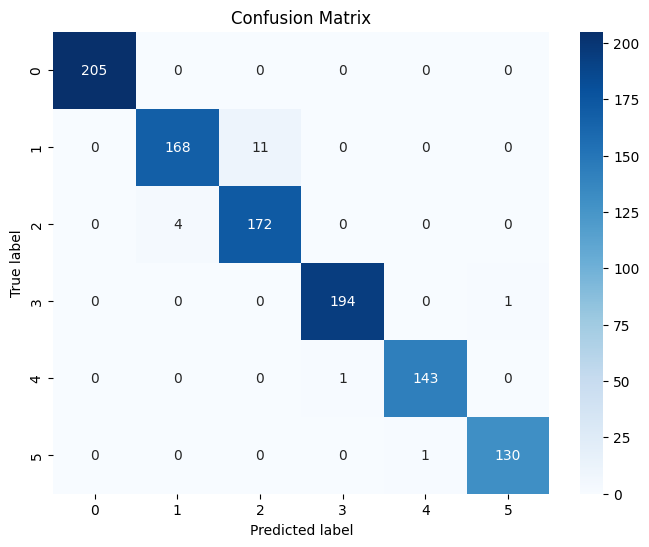

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9815533980582525
Precision: 0.9816191218724497
Recall: 0.9815533980582525
F1-score: 0.9815325247295672
Confusion Matrix:
[[201   0   0   0   0   0]
 [  0 192   5   0   1   0]
 [  0  10 168   0   0   0]
 [  0   0   0 173   0   1]
 [  0   0   0   1 139   0]
 [  0   0   0   0   1 138]]


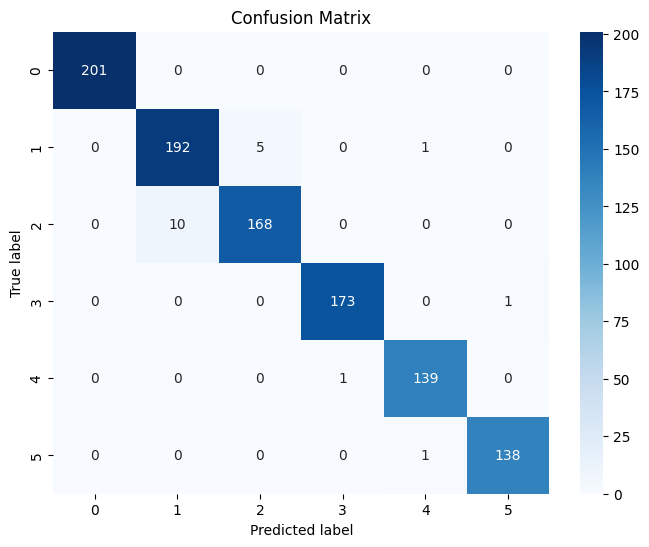

In [ ]:
test_predictions2 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions2))
print("Precision:", precision_score(y_test, test_predictions2, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions2, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions2,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions2)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **STANDARD DEVIATION AND SKEWNESS BASED FEATURE SELECTION METHOD**

In [ ]:
from sklearn.metrics import accuracy_score
import random

class SDSFeatureSelection:
    def __init__(self, population_size, max_iterations, features_size, cost_function, X_train, y_train, X_val, y_val):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.features_size = features_size
        self.cost_function = cost_function
        self.population = []
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def initialize_population(self):
        for _ in range(self.population_size):
            hypothesis = [1] * self.features_size + [0] * (self.X_train.shape[1] - self.features_size)
            random.shuffle(hypothesis)
            self.population.append(hypothesis)

    def calculate_fitness(self, hypothesis, with_metric=True):
        indexes = [i for i in range(len(hypothesis)) if hypothesis[i] == 1]
        print(indexes)
        subdata = self.X_train.iloc[:, indexes]

        if with_metric:
            clf = RandomForestClassifier()
            clf.fit(subdata, self.y_train)
            y_pred = clf.predict(self.X_val.iloc[:, indexes])
            print(y_train.shape,y_pred.shape)
            return accuracy_score(self.y_val, y_pred)
        else:
            return self.cost_function(subdata)

    def sds_algorithm(self):
        self.initialize_population()

        for iteration in range(self.max_iterations):
            for agent in self.population:
                # Calculate fitness
                agent_fitness = self.calculate_fitness(agent)

                # Update hypothesis
                for i in range(self.features_size):
                    if random.random() < 0.5:
                        agent[i] = 1
                    else:
                        agent[i] = 0

                # Calculate fitness after the update
                updated_fitness = self.calculate_fitness(agent)

                # Accept or reject the update
                if updated_fitness > agent_fitness:
                    agent_fitness = updated_fitness

        # Select the best hypothesis from the population
        best_hypothesis = max(self.population, key=lambda x: self.calculate_fitness(x))

        return best_hypothesis


# Example usage
sds = SDSFeatureSelection(population_size=20, max_iterations=20, features_size=24, cost_function=None, X_train=X_train, y_train=y_train, X_val=X_val, y_val= y_val)
selected_features = sds.sds_algorithm()

# Print the selected features
print("Selected features:", [i for i, val in enumerate(selected_features) if val == 1])

[11, 12, 27, 34, 111, 122, 139, 165, 168, 185, 186, 195, 209, 214, 219, 236, 321, 336, 410, 439, 443, 498, 522, 529]
(8239,) (1030,)
[0, 1, 2, 3, 6, 7, 8, 9, 11, 12, 16, 17, 18, 21, 23, 27, 34, 111, 122, 139, 165, 168, 185, 186, 195, 209, 214, 219, 236, 321, 336, 410, 439, 443, 498, 522, 529]
(8239,) (1030,)
[88, 98, 118, 137, 160, 182, 184, 193, 206, 219, 248, 250, 296, 339, 363, 370, 375, 382, 387, 416, 417, 424, 449, 475]
(8239,) (1030,)
[1, 2, 4, 7, 9, 10, 11, 13, 16, 17, 18, 19, 20, 22, 23, 88, 98, 118, 137, 160, 182, 184, 193, 206, 219, 248, 250, 296, 339, 363, 370, 375, 382, 387, 416, 417, 424, 449, 475]
(8239,) (1030,)
[5, 36, 53, 79, 110, 122, 138, 141, 187, 194, 225, 238, 277, 294, 323, 328, 399, 400, 407, 441, 490, 497, 505, 510]
(8239,) (1030,)
[2, 3, 5, 9, 11, 12, 13, 14, 18, 19, 21, 36, 53, 79, 110, 122, 138, 141, 187, 194, 225, 238, 277, 294, 323, 328, 399, 400, 407, 441, 490, 497, 505, 510]
(8239,) (1030,)
[5, 11, 53, 98, 106, 114, 148, 198, 200, 226, 248, 264, 271, 282

In [ ]:
actual_features = [feature for i, feature in enumerate(X_train.columns) if selected_features[i] == 1]
print("Actual selected features:", actual_features)

Actual selected features: ['tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-Y', 'tBodyAcc-max()-X', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-energy()-Y', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-arCoeff()-Z,2', 'tGravityAcc-min()-X', 'tGravityAcc-energy()-Z', 'tGravityAcc-arCoeff()-Z,3', 'tBodyAccJerk-arCoeff()-X,2', 'tBodyAccJerk-arCoeff()-X,4', 'tBodyGyroJerk-mad()-X', 'tBodyGyroJerk-arCoeff()-Z,3', 'fBodyAcc-mad()-Y', 'fBodyAcc-iqr()-Z', 'fBodyAcc-maxInds-X', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-1,16.2', 'fBodyAcc-bandsEnergy()-17,32.2', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAccJerk-bandsEnergy()-25,32.1', 'fBodyGyro-meanFreq()-Y', 'fBodyGyro-bandsEnergy()-1,8.2', 'fBodyAccMag-skewness()', 'fBodyBodyGyroMag-skewness()', 'fBodyBodyGyroJerkMag-std()', 'angle(tBodyAccJerkMean),gravityMean)']


In [ ]:
new_X_train = X_train[actual_features]
new_X_test = X_test[actual_features]
new_X_val = X_val[actual_features]
# Display the new DataFrame
print("New DataFrame with selected features:")
print(new_X_train)
print(new_X_test)
print(new_X_val)

New DataFrame with selected features:
      tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-Y  \
0              0.377880           0.447506          0.573736   
1              0.383027           0.472189          0.567989   
2              0.396788           0.447184          0.007594   
3              0.399349           0.431491          0.458238   
4              0.403051           0.453782          0.015354   
...                 ...                ...               ...   
8234           0.394634           0.442603          0.020735   
8235           0.388504           0.451978          0.447938   
8236           0.395605           0.440042          0.391678   
8237           0.395228           0.443122          0.007280   
8238           0.410603           0.452340          0.428648   

      tBodyAcc-std()-Z  tBodyAcc-mad()-Y  tBodyAcc-max()-X  tBodyAcc-min()-X  \
0             0.365806          0.611535          0.527268          0.636066   
1             0.405507          0

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 0.8621359223300971
Precision: 0.8630604833659188
Recall: 0.8621359223300971
F1-score: 0.8619247777352083


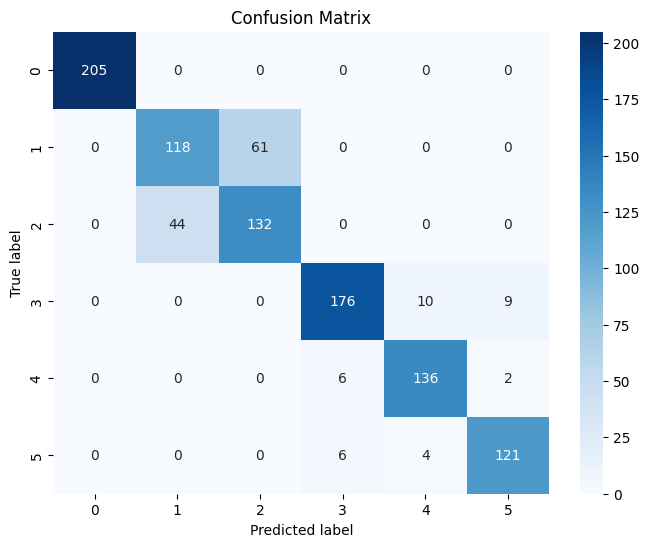

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.8650485436893204
Precision: 0.8673867137028557
Recall: 0.8650485436893204
F1-score: 0.8646506144976064
Confusion Matrix:
[[201   0   0   0   0   0]
 [  1 132  64   0   0   1]
 [  0  37 141   0   0   0]
 [  0   0   0 160   6   8]
 [  0   0   0   6 129   5]
 [  0   0   0   3   8 128]]


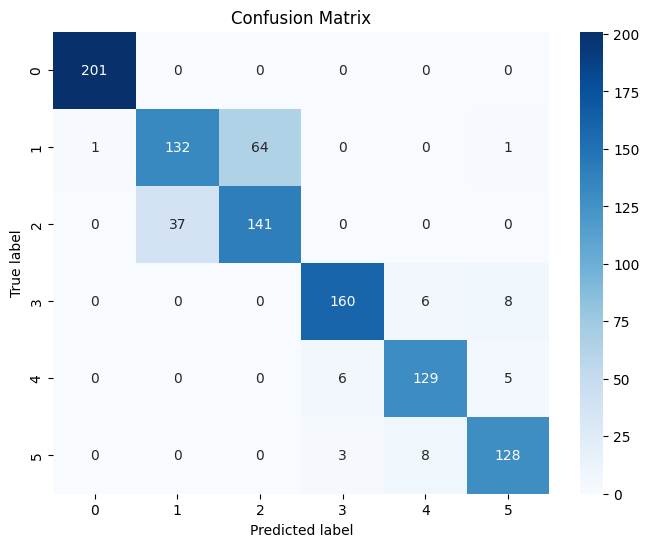

In [ ]:
test_predictions3 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions3))
print("Precision:", precision_score(y_test, test_predictions3, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions3, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions3,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions3)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **FILTER METHOD**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Filter method: Mutual Information
k_best = 50  # Select top 50 features
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Train a classifier on the selected features
clf = LogisticRegression(C= 100, penalty= 'l2', solver= 'liblinear')
clf.fit(X_train_selected, y_train)

from sklearn.metrics import f1_score
# Evaluate the classifier
y_pred = clf.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
f1_score = f1_score(y_val, y_pred,average='weighted')
print(f"Accuracy using filter method: {accuracy}")
print(f"F1score using wrapper method: {f1_score}")

Accuracy using filter method: 0.8786407766990292
F1score using wrapper method: 0.8752966715738167


Accuracy: 0.8728155339805825
Precision: 0.8786047505624033
Recall: 0.8728155339805825
F1-score: 0.8690788908122736
Confusion Matrix:
[[180   6  13   0   0   2]
 [ 33 120  43   0   0   2]
 [  2  11 165   0   0   0]
 [  0   0   0 169   2   3]
 [  0   0   0   1 134   5]
 [  0   0   0   6   2 131]]


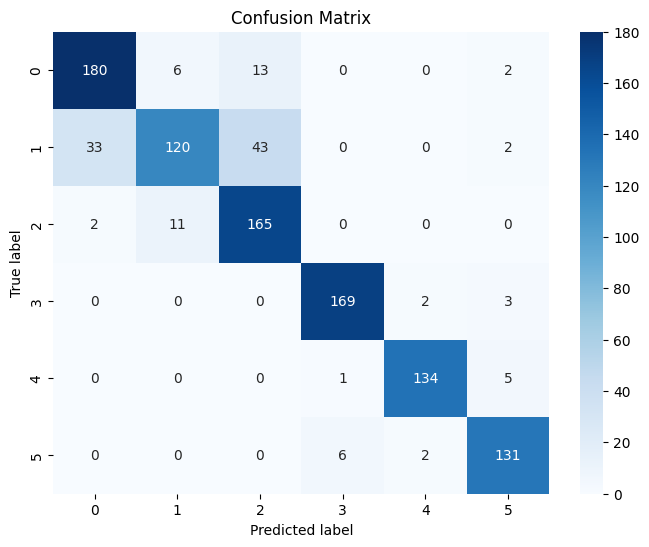

In [ ]:
X_test_selected = selector.transform(X_test)
test_prediction = clf.predict(X_test_selected)

from sklearn.metrics import f1_score
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **WRAPPER METHOD**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.datasets import load_digits

n_features_to_select = 50  # Select top 50 features
estimator = LogisticRegression(max_iter=2000)
selector = RFE(estimator, n_features_to_select=n_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Train a classifier on the selected features
clf = LogisticRegression(C= 100, penalty= 'l2', solver= 'liblinear')
clf.fit(X_train_selected, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
f1_score = f1_score(y_val, y_pred ,average='weighted')

print(f"Accuracy using wrapper method: {accuracy}")
print(f"F1score using wrapper method: {f1_score}")

Accuracy using wrapper method: 0.970873786407767
F1score using wrapper method: 0.9708717030028433


Accuracy: 0.9737864077669903
Precision: 0.973766300471225
Recall: 0.9737864077669903
F1-score: 0.9737339217459486
Confusion Matrix:
[[201   0   0   0   0   0]
 [  0 187   9   0   1   1]
 [  0  13 165   0   0   0]
 [  0   0   0 173   0   1]
 [  0   0   0   1 138   1]
 [  0   0   0   0   0 139]]


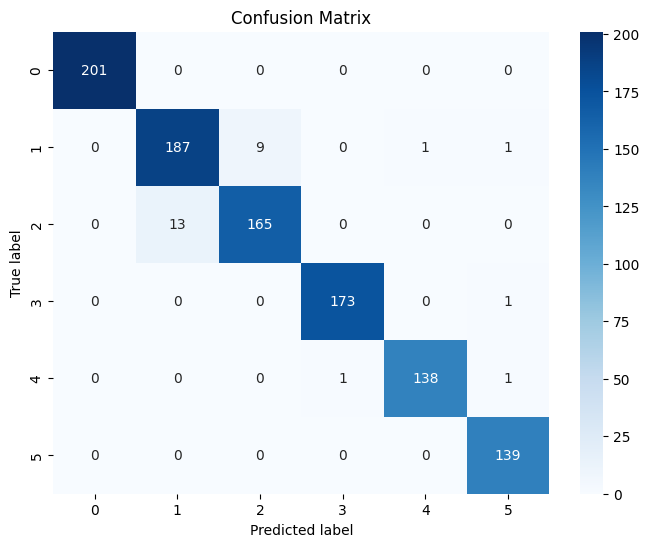

In [ ]:
X_test_selected = selector.transform(X_test)
test_prediction = clf.predict(X_test_selected)

from sklearn.metrics import f1_score
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **STOCHASTIC DIFFUSION SEARCH METHOD[STANDARD]**

SVM - SDS features selection
Originial data shape: (10299, 563)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for all features: 0.9776699029126213

Search space size: 5.078509573345787e+167


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 0

==>Iteration: 0
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 1
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 2
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 3
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 4
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 5
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 6
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 7
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 8
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 1

==>Iteration: 0
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 1
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 2
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 3
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 4
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 5
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 6
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 7
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 8
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029

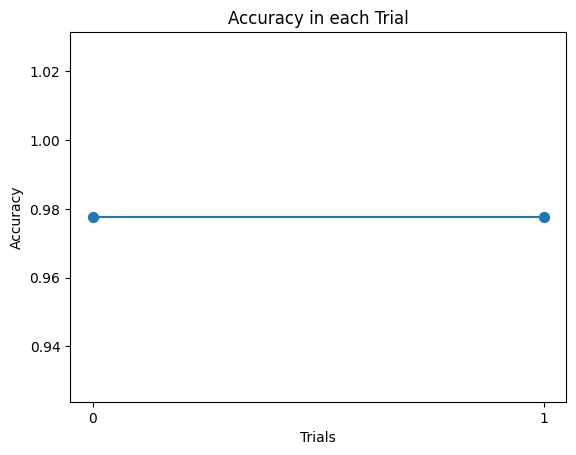


======== FINAL RESULTS ======== 
Selected features [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 0

==>Iteration: 0
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 1
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 2
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 3
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 4
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 5
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 6
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 7
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 8
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c



====> Trial: 1

==>Iteration: 0
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 1
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 2
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 3
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 4
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 5
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 6
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 7
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029126213

==>Iteration: 8
Best accuracy in iteration: 	 0.9776699029126213
Best overall accuracy:		 0.9776699029

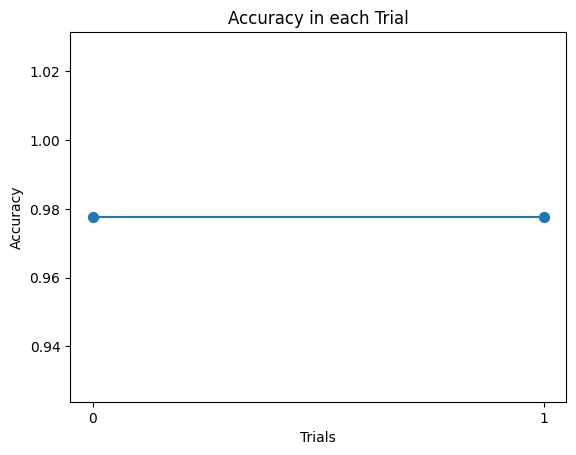


======== FINAL RESULTS ======== 
Selected features: [2, 4, 5, 6, 9, 11, 12, 14, 15, 17, 18, 22, 24, 26, 27, 30, 38, 39, 41, 44, 48, 50, 52, 53, 60, 61, 64, 65, 68, 70, 71, 72, 74, 75, 78, 80, 81, 82, 83, 84, 85, 86, 90, 92, 93, 96, 99, 100, 101, 105, 107, 113, 114, 116, 118, 121, 123, 126, 127, 131, 133, 135, 136, 137, 139, 144, 146, 147, 148, 151, 152, 153, 157, 160, 161, 163, 165, 166, 168, 169, 170, 171, 172, 173, 176, 177, 179, 180, 181, 182, 188, 189, 190, 194, 195, 196, 200, 203, 204, 206, 207, 212, 214, 215, 216, 217, 219, 220, 221, 224, 230, 231, 233, 236, 239, 240, 241, 243, 245, 246, 249, 250, 253, 254, 258, 259, 263, 269, 272, 273, 274, 276, 277, 280, 282, 284, 286, 292, 296, 297, 298, 299, 300, 304, 305, 306, 308, 310, 311, 313, 317, 318, 319, 323, 325, 326, 327, 328, 329, 331, 332, 333, 335, 338, 339, 340, 342, 343, 344, 347, 348, 350, 351, 354, 355, 356, 359, 360, 361, 362, 364, 366, 368, 369, 370, 371, 374, 376, 380, 384, 385, 386, 392, 395, 396, 399, 400, 404, 405, 409

In [ ]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

testRun = True

score_store= {}
def SDS(features_size,cost_function, df, maxIteration=50, population_size = 100):
    VarSize = df.shape[1]-1
    search_space_size = math.factorial(VarSize)/(math.factorial(features_size)*math.factorial(VarSize-features_size))
    print("Search space size: "+str(search_space_size))

	#agent class
    class Agent(object):
        def __init__(self):
            self.set_random_hypotesis()
            self.active = False

        def set_random_hypotesis(self):
            self.hypotesis = [1]*features_size + [0]*(VarSize-features_size)
            np.random.shuffle(self.hypotesis)

        def set_hypotesis_with_offset(self, new_hypotesis):
            self.hypotesis[:] = new_hypotesis #copy good hypotesis
            zero_set = False
            one_set = False
            stored = -1
            z=VarSize-1
            while not zero_set or not one_set:
                r = random.randint(0,z)
                if(self.hypotesis[r]==1 and stored!=r and not zero_set):
                    self.hypotesis[r]=0
                    zero_set = True
                    stored = r
                r2 = random.randint(0,z)
                if(self.hypotesis[r2]==0 and stored!=r2 and not one_set):
                    self.hypotesis[r2]=1
                    one_set = True
                    stored = r2

        def calculate(self,with_metric=True):
            if self.active==True:
                self.score

            indexes = []
            for j in range(0,VarSize):
                if(self.hypotesis[j]==1):
                    indexes.append(j)
            indexes.append(VarSize)
            subdata = df[:,indexes]
            #print('Indices selected:' , indexes[:len(indexes)-1])

            if(with_metric):
                self.score = cost_function(subdata,True)
            else:
                self.score = cost_function(subdata,True)

        def cal(self,  hypo):
            indexes = []
            for j in range(0,VarSize-1):
                if(hypo[j]==1):
                    indexes.append(j)
            indexes.append(VarSize)
            subdata = df[:,indexes]

            score = cost_function(subdata)
            return score


    # INITIALIZATION
    def initial():
        global population
        population=[]
        for ag in range(population_size):
            population.append(Agent())
        for ag in population:
            ag.calculate()

    #TEST
    def test():
        for ag in population:
            s = np.random.choice(population)
            while(s == ag):
                s = np.random.choice(population)
            another_agent = s
            if(ag.score >= another_agent.score):
                ag.active = True
            else:
                ag.active = False

    #DIFFUSION
    def diffusion():
        for ag in population:
             if (ag.active==False):
                #print('ag is inactive and the score is:', ag.score,'and its hypo is:', ag.hypotesis)
                another_agent= np.random.choice(population)
                while(another_agent==ag):
                    another_agent=np.random.choice(population)
                if(another_agent.active):
                    #print('The other agent hypo is', another_agent.hypotesis)
                    ag.set_hypotesis_with_offset(another_agent.hypotesis)
                    ag.calculate()
                    #print('After the offset:', ag.score, ', with hypo:', ag.hypotesis)
                else:
                    ag.set_random_hypotesis()
                    ag.calculate()
                    #print('The score of random hypo:', ag.score, ' and the new hypo is:', ag.hypotesis)

             else:
                 #print('Ag is active and its score is', ag.score)
                 another_agent= np.random.choice(population)
                 while(another_agent==ag):
                    another_agent=np.random.choice(population)
                 if((another_agent.active) and (another_agent.hypotesis == ag.hypotesis)):
                    ag.active=False
                    ag.set_random_hypotesis()
                    ag.calculate()
                    #print('The score after context sensitive diffusion is: ', ag.score)

    # #MAIN
    trial=10
    if testRun: trial = 2
    maxAcc=-1
    trial_best=[]
    for trialCounter in range(trial):
        initial()
        maxAccForit=-1
        best_it=[]
        print('\n\n====> Trial:', trialCounter)
        for iteration in range(maxIteration):
            print('\n==>Iteration:', iteration)
            it=-1
            for ag in population:
                if ag.score>it:
                    it=ag.score

            for ag in population:
                #print(ag.score)
                #print(ag.active)
                if (ag.score > maxAccForit):
                    maxAccForit=ag.score
                if(ag.score>maxAcc):
                    maxAcc=ag.score
                    best=ag.hypotesis

            test()
            diffusion()

            print( 'Best accuracy in iteration: \t', maxAccForit)
            best_it.append(maxAccForit)#for ploting the max acc at each iteration
            print('Best overall accuracy:\t\t', maxAcc)

        trial_best.append(max(best_it)) #here the trial ends


    print('\nBest accuracy in each trial:', trial_best)

    print('Time elapsed:', (time.time() - start_time))
    t=[]
    for i in range(trial):
        t.append(i)
    tr=np.array(t)
    tra=np.array(trial_best)
    plt.plot(tr,tra)
    plt.scatter(tr,tra, s=50)
    plt.xlabel('Trials')
    plt.xticks(range(0,len(t)))
    plt.ylabel('Accuracy')
    plt.title('Accuracy in each Trial')
    plt.show()
    print('\n======== FINAL RESULTS ======== ')
    return best

#to calculate the run time
start_time = time.time()


#Fintess function
def log_accuracy(df, additional_metrics = False):
    np.random.shuffle(df)
    np.random.shuffle(df)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test,y_test)
    if(additional_metrics):
        predicted = clf.predict(X_test)
        CM = metrics.confusion_matrix(y_test, predicted)
        #print('the Confusion Matrix')
        #print(CM)
        #TN = CM[0][0]
        #FN = CM[1][0]
        #TP = CM[1][1]
        #FP = CM[0][1]
        #print("Additional metrics: ")
        #print("TP "+str(TP))
        #print("FP "+str(FP))
        #print("TN "+str(FN))
        #print("FN "+str(FN))
        #sensitivity = TP / (TP + FN)
        #print(sensitivity)
        #specificity = TN / (FP + TN)
        #print("Specificity "+str(specificity))
        #print('Accuracy', accurancy)
    return accuracy


print("SVM - SDS features selection")
my_data = df.values
x_norm = X_train
np.random.shuffle(my_data)
print('Originial data shape:', my_data.shape)

# For all features
print("Accuracy for all features: "+str(abs(log_accuracy(my_data, True))) + "\n")

#For selected features
features_size = int((my_data.shape[1]-1)/2) # half the original features
maxIteration = 50
if testRun: maxIteration = 30
population_size = 100
if testRun: population_size = 30
print("Selected features "+str(SDS(features_size,log_accuracy,my_data,maxIteration,population_size)))

best_feature_subset = SDS(features_size, log_accuracy, my_data, maxIteration, population_size)

# Print the selected features
print("Selected features:", [i for i, val in enumerate(best_feature_subset) if val == 1])

In [ ]:
selected_features = [feature for i, feature in enumerate(X_train.columns) if best_feature_subset[i] == 1]
print("Actual selected features:", selected_features)


Actual selected features: ['tBodyAcc-mean()-Z', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-Y', 'tGravityAcc-std()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-Y', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-entropy()-Z', 'tGravityAcc-arCoeff()-X,1', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-correlation()-X,Z', 'tBodyAccJerk-mean()-X', 'tBodyAccJerk-mean()-Y', 'tBodyAccJerk-mean()-Z', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-s

In [ ]:
new_X_train = X_train[selected_features]

In [ ]:
new_X_train

tBodyAcc-mean()-Z  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0              0.447506          0.573736          0.365806          0.427007   
1              0.472189          0.567989          0.405507          0.402285   
2              0.447184          0.007594          0.004313          0.001494   
3              0.431491          0.458238          0.196864          0.234459   
4              0.453782          0.015354          0.009568          0.001756   
...                 ...               ...               ...               ...   
8234           0.442603          0.020735          0.031654          0.005589   
8235           0.451978          0.447938          0.280968          0.213735   
8236           0.440042          0.391678          0.287618          0.175667   
8237           0.443122          0.007280          0.017071          0.002415   
8238           0.452340          0.428648          0.424375          0.286987   

      tBodyAcc-max()-X  tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Z  \
0             0.527268          0.313922          0.636066          0.753161   
1             0.645966          0.433221          0.522251          0.646003   
2             0.029485          0.092023          0.970787          0.922448   
3             0.307643          0.219631          0.718651          0.822160   
4             0.030362          0.096343          0.970681          0.922685   
...                ...               ...               ...               ...   
8234          0.035460          0.099560          0.968421          0.908830   
8235          0.260128          0.313211          0.763036          0.737849   
8236          0.226459          0.279323          0.803090          0.734819   
8237          0.031248          0.097158          0.970540          0.914288   
8238          0.391580          0.445883          0.657252          0.663159   

      tBodyAcc-sma()  tBodyAcc-energy()-Y  ...  fBodyBodyGyroJerkMag-min()  \
0           0.528213             0.127909  ...                    0.162354   
1           0.521837             0.124981  ...                    0.198442   
2           0.003229             0.000051  ...                    0.004130   
3           0.327381             0.081422  ...                    0.027961   
4           0.009743             0.000264  ...                    0.001832   
...              ...                  ...  ...                         ...   
8234        0.019007             0.000250  ...                    0.000740   
8235        0.330718             0.077975  ...                    0.010218   
8236        0.290846             0.059692  ...                    0.021268   
8237        0.008077             0.000050  ...                    0.002673   
8238        0.413219             0.071855  ...                    0.268653   

      fBodyBodyGyroJerkMag-iqr()  fBodyBodyGyroJerkMag-entropy()  \
0                       0.160970                        0.657412   
1                       0.325082                        0.775789   
2                       0.002055                        0.000000   
3                       0.139334                        0.588123   
4                       0.003987                        0.022700   
...                          ...                             ...   
8234                    0.003299                        0.000000   
8235                    0.119737                        0.569138   
8236                    0.097688                        0.530336   
8237                    0.003534                        0.000000   
8238                    0.252862                        0.705984   

      fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-kurtosis()  \
0                            0.609507                         0.387266   
1                            0.641312                         0.591448   
2                            0.790528                         0.013230   
3                     

In [ ]:
new_X_test = X_test[selected_features]
new_X_val = X_val[selected_features]

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression()
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/py

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 0.9728155339805825
Precision: 0.9727018004442451
Recall: 0.9728155339805825
F1-score: 0.9727387667835398


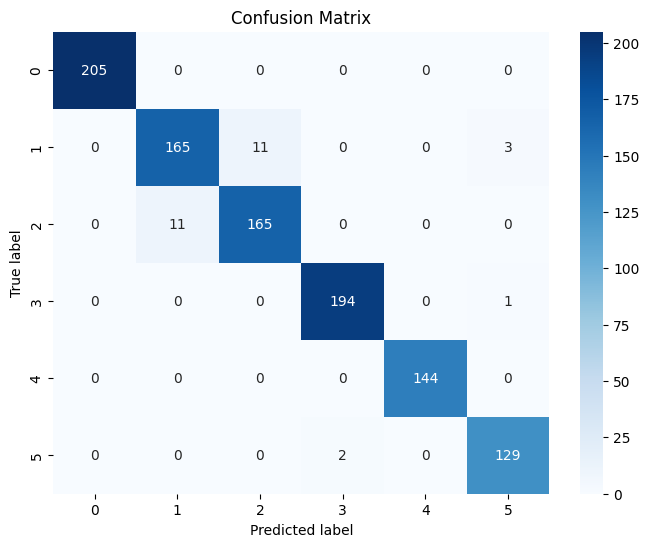

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9737864077669903
Precision: 0.9739190343137198
Recall: 0.9737864077669903
F1-score: 0.973762966668282
Confusion Matrix:
[[201   0   0   0   0   0]
 [  0 190   6   0   0   2]
 [  0  12 166   0   0   0]
 [  0   0   0 172   1   1]
 [  0   0   0   1 137   2]
 [  0   0   0   2   0 137]]


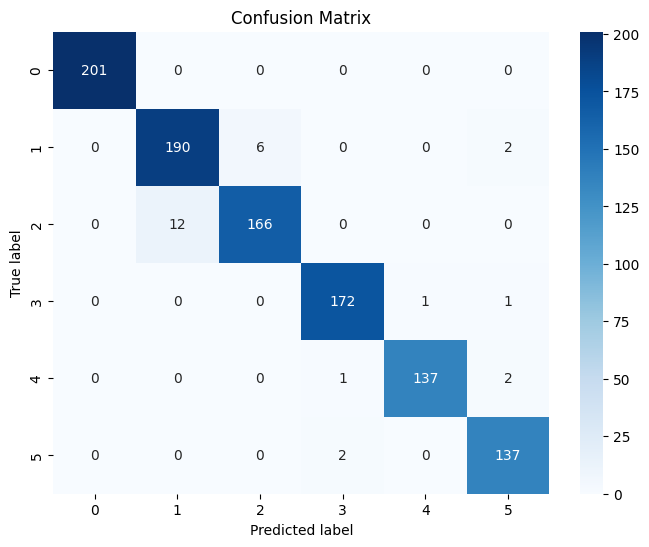

In [ ]:
test_predictions3 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions3))
print("Precision:", precision_score(y_test, test_predictions3, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions3, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions3,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions3)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **IMPROVED SDS[ADAPTIVE]**

In [ ]:
X=np.array(X)


In [ ]:
lblEncoder_Y = LabelEncoder()
y= lblEncoder_Y.fit_transform(y)
y

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
y= np.array(y)

In [ ]:
y

array([2, 2, 2, ..., 5, 5, 5])

In [ ]:
from sklearn.svm import SVC
#Creating instances of estimators
logReg=LogisticRegression(C=100, solver='liblinear', max_iter= 2000)
decClf=DecisionTreeClassifier(max_depth=5, min_samples_split=4)
svc=SVC(C=0.5,gamma=0.5)

estimators=[svc,logReg,decClf]

# Below function returns an agent, which is hypothesis, and its corresponding binary array.
# 1 indicates inclusion of corresponding feature and 0 indicates exclusion of the feature.
# lowerLim indicates minimum number of features, whereas; upperLim indicated max no of features to beincluded in an agent
def agent(arryX,lowerLim,upperLim):
        if lowerLim<0 or upperLim>arryX.shape[1]:
            print('recall function with appropriate limits')
        else:
            randomNoFeatures=np.random.randint(lowerLim,upperLim,size=1)[0] #generating a random number
            zeroArry=np.zeros(arryX.shape[1]-randomNoFeatures, dtype='int') #zero array
            oneArry=np.ones(randomNoFeatures, dtype='int')   #one array
            fArry=np.concatenate((zeroArry,oneArry), axis=0) #concatinating zero and one array
            np.random.shuffle(fArry) #shuffling fArray
            fIndex=np.where(fArry==1)[0]
            agentArry=arryX[:,fIndex] #generating feature subset from origanal dataset
            return fArry,agentArry


# Below function generates required number of agents that are to be deployed on search space.
# All the agents and corresponding binary feature array are stored and returned as a list.

def agentsInitiation(arryX,numAgents,lowerLim,upperLim):
        agents=[]
        agentFIndex=[]
        agentStatus=['active']*numAgents
        for i in range(0,numAgents):
            fArry,agentArry=agent(arryX,lowerLim,upperLim) #generating a single agent
            agentFIndex.append(fArry) #appending its binary feature array to agentFIndex
            agents.append(agentArry) #appending the agent to the agents list
        return agents,agentFIndex,agentStatus


# 'Score' function fits each model to the agent's training data and then evaluates the score on test agent.
# The output is the average score of three estimators. Original paper used only one classifier to calculate score.
# Therefore, the resultant subset was very biased towards the signle estimator.
# To avoind this, we are using ensemble of classifiers.

def score(estimators,arryX,arrY):
        X_train,X_test,y_train,y_test=train_test_split(arryX,arrY,random_state=0)
        scores=[]
        for i in range(len(estimators)):
            estimators[i].fit(X_train,y_train) #fitting the ith estimator to the training data of an agent
            scores.append(estimators[i].score(X_test,y_test)) #evaluating the score on the test data
        return sum(scores)/len(scores)



#below function calculates score for each agents and appends the score to the agentScores list
def agentClfscores(estimators,agents,arrY):
    agentScores=[]
    for agent in agents:
        agentscore=score(estimators,agent,arrY)
        agentScores.append(agentScores)
    return agentScores #returns a list that caputres agents' scores



def SDSFS(arryX,arrY,estimators,numIterations,numAgents,lowerLim,upperLim):
    agents,agentFIndex,agentStatus=agentsInitiation(arryX,numAgents,lowerLim,upperLim)
    agentScores=agentClfscores(estimators,agents,arrY)
    niters=0
    while niters<numIterations:
        #testing phase
        for i in range(len(agents)):
            rndmId=np.random.randint(len(agents),size=1)[0]
            if agentScores[i]>agentScores[rndmId]:
                agentStatus[i]='active'

            else:
                agentStatus[i]='inactive'

        #Diffusion phase
        for i in range(len(agents)):
                if agentStatus[i]=='inactive':
                    rndmId2=np.random.randint(len(agents),size=1)[0]
                    if agentStatus[rndmId2]=='active':
                        oneIds=np.where(agentFIndex[rndmId2]==1)[0]
                        zeroIds=np.where(agentFIndex[rndmId2]==0)[0]
                        rndmId3=np.random.randint(len(oneIds), size=1)
                        rndmId4=np.random.randint(len(zeroIds), size=1)
                        oneZeroId=oneIds[rndmId3]
                        zeroOneId=zeroIds[rndmId4]
                        agentFIndex[i]=agentFIndex[rndmId2].copy()
                        agentFIndex[i][oneZeroId]=0
                        agentFIndex[i][zeroOneId]=1
                        fIndex2=np.where(agentFIndex[i]==1)[0]
                        agents[i]=X[:,fIndex2]
                        agentScores[i]=score(estimators,agents[i],arrY)
                    else:
                        agentFIndex[i],agents[i]=agent(arryX,lowerLim,upperLim)
                        agentScores[i]=score(estimators,agents[i],arrY)
                else:
                    rndmId5=np.random.randint(len(agents),size=1)[0]
                    if agentStatus[rndmId5]=='active' and (agentFIndex[i]==agentFIndex[rndmId5]).all():
                        agentStatus[i]='inactive'
                        agentFIndex[i],agents[i]=agent(arryX,lowerLim,upperLim)
                        agentScores[i]=score(estimators,agents[i],arrY)
        niters+=1
    return agents,agentFIndex,agentStatus,agentScores






In [ ]:
agents,agentFIndex,agentStatus,agentScores=SDSFS(X,y,estimators,50,30,5,30)
max(agentScores)

0.924789644012945

In [ ]:
np.argmax(np.array(agentScores))

5

In [ ]:
agents[5].shape

(10299, 29)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(agents[5], y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8239, 29)
(8239,)
(2060, 29)
(2060,)


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}


Accuracy: 0.9480582524271844
Precision: 0.9481873585430889
Recall: 0.9480582524271844
F1-score: 0.9480612494014085
Confusion Matrix:
[[406   0   0   0   0   0]
 [  0 329  48   0   0   0]
 [  0  38 316   0   0   0]
 [  0   0   0 365   2   2]
 [  0   0   0   3 275   6]
 [  0   0   0   3   5 262]]


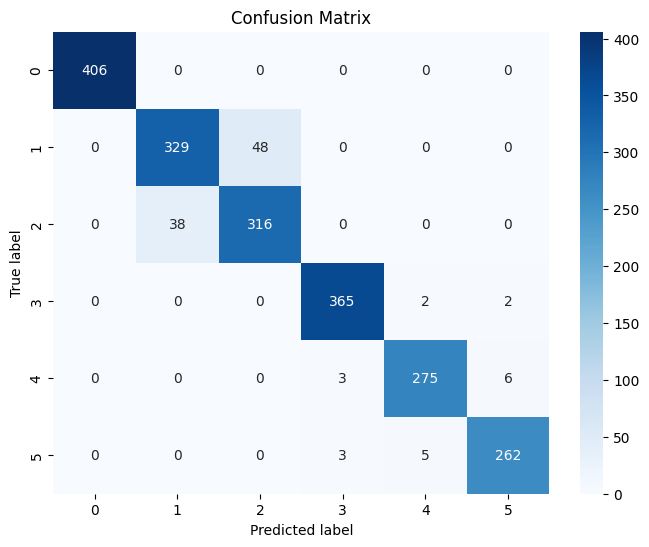

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# **BREST CANCER GENE EXPRESSION DATASET**


### **DATA EXPLORATION**

In [ ]:
!gdown 13Pi5I7SMJd08dEopPYyTO6hqnQ8h9cbL

Downloading...
From: https://drive.google.com/uc?id=13Pi5I7SMJd08dEopPYyTO6hqnQ8h9cbL
To: /content/METABRIC_RNA_Mutation.csv
100% 8.39M/8.39M [00:00<00:00, 135MB/s]


In [ ]:
df=pd.read_csv('METABRIC_RNA_Mutation.csv')

<ipython-input-53-d8934a347824>:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('METABRIC_RNA_Mutation.csv')


In [ ]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv', low_memory=False)

In [ ]:
df

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0              0             75.65             MASTECTOMY  Breast Cancer   
1              2             43.19      BREAST CONSERVING  Breast Cancer   
2              5             48.87             MASTECTOMY  Breast Cancer   
3              6             47.68             MASTECTOMY  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1899        7295             43.10      BREAST CONSERVING  Breast Cancer   
1900        7296             42.88             MASTECTOMY  Breast Cancer   
1901        7297             62.90             MASTECTOMY  Breast Cancer   
1902        7298             61.16             MASTECTOMY  Breast Cancer   
1903        7299             60.02      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
0              Breast Invasive Ductal Carcinoma         NaN             0   
1              Breast Invasive Ductal Carcinoma        High             0   
2              Breast Invasive Ductal Carcinoma        High             1   
3     Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
...                                         ...         ...           ...   
1899          Breast Invasive Lobular Carcinoma        High             0   
1900           Breast Invasive Ductal Carcinoma        High             0   
1901           Breast Invasive Ductal Carcinoma        High             0   
1902           Breast Invasive Ductal Carcinoma    Moderate             0   
1903           Breast Invasive Ductal Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                    claudin-low     1.0                   Positve  ...   
1                           LumA     1.0                   Positve  ...   
2                           LumB     1.0                   Positve  ...   
3                           LumB     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
...                          ...     ...                       ...  ...   
1899                        LumA     4.0                   Positve  ...   
1900                        LumB     4.0                   Positve  ...   
1901                        LumB     4.0                   Positve  ...   
1902                        LumB     4.0                   Positve  ...   
1903                        LumB     4.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
0           0           0           0        0          0         0         0   
1           0           0           0        0          0         0         0   
2           0           0           0        0          0         0         0   
3           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1899        0           0           0        0          0         0         0   
1900        0           0           0        0          0         0         0   
1901        0           0           0        0          0         0         0   
1902        0           0           0        0          0         0         0   
1903        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
0              0         0          0  
1              0         0          0  
2              0         0          0  
3              0         0          0  
4              0         0          0  
...          ...       ...        ...  
1899          

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [ ]:
print(f'Is there any duplicate rows? {df.duplicated().any()}')
print(f'There are {len(df)-len(df.drop_duplicates()):,} duplicate rows')

Is there any duplicate rows? False
There are 0 duplicate rows


In [ ]:
nulls = df.isnull().sum(axis=0).sort_values(ascending=False); nulls

tumor_stage                  501
3-gene_classifier_subtype    204
primary_tumor_laterality     106
neoplasm_histologic_grade     72
cellularity                   54
                            ... 
mmp15                          0
mmp16                          0
mmp17                          0
mmp19                          0
siah1_mut                      0
Length: 693, dtype: int64

In [ ]:
df = df.dropna()

0    608
1    484
Name: overall_survival, dtype: int64


<Axes: >

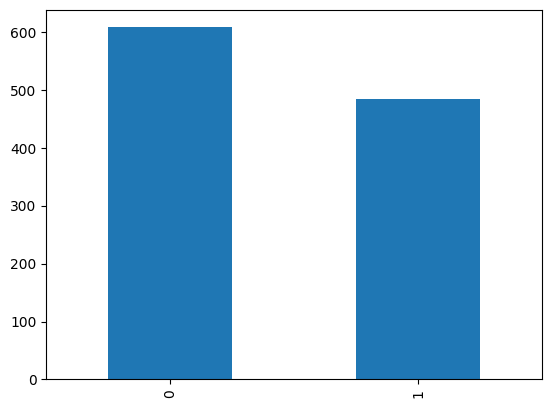

In [ ]:
print(df['overall_survival'].value_counts())
df['overall_survival'].value_counts().plot(kind='bar')

In [ ]:
y = df['overall_survival']

# Remove the target variable to get feature matrix X
X = df.drop('overall_survival', axis=1)

In [ ]:
X

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
1              2             43.19      BREAST CONSERVING  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
5             10             78.77             MASTECTOMY  Breast Cancer   
8             28             86.41      BREAST CONSERVING  Breast Cancer   
9             35             84.22             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1618        6232             71.22             MASTECTOMY  Breast Cancer   
1619        6233             70.65      BREAST CONSERVING  Breast Cancer   
1621        6237             75.62             MASTECTOMY  Breast Cancer   
1623        6239             52.84      BREAST CONSERVING  Breast Cancer   
1664        6346             63.20      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  chemotherapy  \
1              Breast Invasive Ductal Carcinoma        High             0   
4     Breast Mixed Ductal and Lobular Carcinoma        High             1   
5              Breast Invasive Ductal Carcinoma    Moderate             0   
8              Breast Invasive Ductal Carcinoma    Moderate             0   
9             Breast Invasive Lobular Carcinoma        High             0   
...                                         ...         ...           ...   
1618  Breast Mixed Ductal and Lobular Carcinoma        High             0   
1619  Breast Mixed Ductal and Lobular Carcinoma        High             0   
1621           Breast Invasive Ductal Carcinoma        High             0   
1623  Breast Mixed Ductal and Lobular Carcinoma        High             1   
1664   Breast Invasive Mixed Mucinous Carcinoma        High             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
1                           LumA     1.0                   Positve  ...   
4                           LumB     1.0                   Positve  ...   
5                           LumB     1.0                   Positve  ...   
8                           LumB     1.0                   Positve  ...   
9                           Her2     1.0                  Negative  ...   
...                          ...     ...                       ...  ...   
1618                        LumA     5.0                   Positve  ...   
1619                        LumB     5.0                   Positve  ...   
1621                       Basal     5.0                  Negative  ...   
1623                      Normal     5.0                   Positve  ...   
1664                        LumB     5.0                   Positve  ...   

     mtap_mut  ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut  \
1           0           0           0        0          0         0         0   
4           0           0           0        0          0         0         0   
5           0           0           0        0          0         0         0   
8           0           0           0        0          0         0         0   
9           0           0           0        0          0         0         0   
...       ...         ...         ...      ...        ...       ...       ...   
1618        0           0           0        0          0         0         0   
1619        0           0           0        0          0         0         0   
1621        0           0           0        0          0         0         0   
1623        0           0           0        0          0         0         0   
1664        0           0           0        0          0         0         0   

     smarcb1_mut stmn2_mut  siah1_mut  
1              0         0          0  
4              0         0          0  
5              0         0          0  
8              0         0          0  
9              0         0          0  
...          ...       ...        ...  
1618          

In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

<ipython-input-63-becb50483c66>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                           patient_id  age_at_diagnosis  chemotherapy  \
patient_id                   1.000000          0.012380     -0.249417   
age_at_diagnosis             0.012380          1.000000     -0.413432   
chemotherapy                -0.249417         -0.413432      1.000000   
cohort                       0.958563          0.031611     -0.233979   
neoplasm_histologic_grade    0.012586         -0.096408      0.289945   
...                               ...               ...           ...   
tnk2                         0.420129          0.134148     -0.187923   
tulp4                        0.291286          0.126682     -0.178469   
ugt2b15                     -0.139256         -0.003674     -0.032600   
ugt2b17                     -0.012042         -0.003317     -0.041454   
ugt2b7                      -0.008099          0.005421      0.006805   

                             cohort  neoplasm_histologic_grade  \
patient_id                 0.958563                   0.0

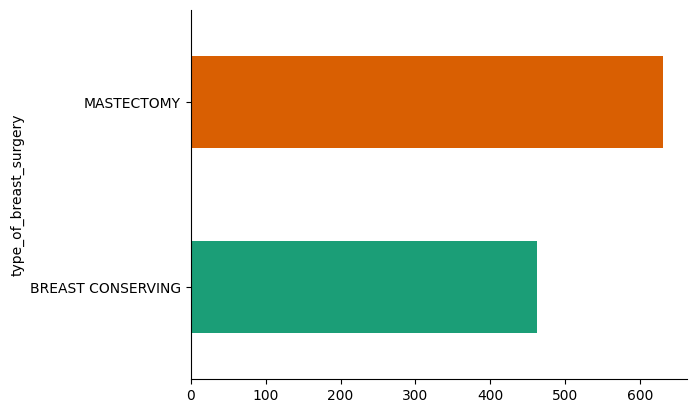

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type_of_breast_surgery').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

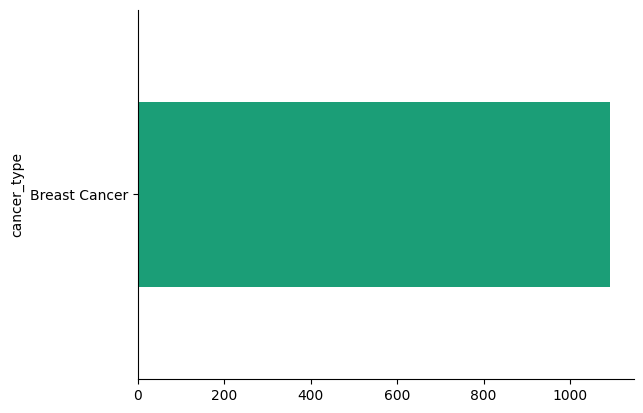

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('cancer_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
def identify_data_types(X):
    numerical_columns = X.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

    return numerical_columns, categorical_columns

In [ ]:
numerical_columns, categorical_columns = identify_data_types(X)

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['patient_id', 'age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'radio_therapy', 'tumor_size', 'tumor_stage', 'brca1', 'brca2', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'stk11', 'bard1', 'mlh1', 'msh2', 'msh6', 'pms2', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'rbl2', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'cdk6', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'cdkn1b', 'e2f1', 'e2f2', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'e2f8', 'src', 'jak1', 'jak2', 'stat1', 'stat2', 'stat3', 'stat5a', 'stat5b', 'mdm2', 'tp53bp1', 'adam10', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll3', 'dll4', 'dtx1', 'dtx2', 'dtx3', 'dtx4', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'hes5', 'heyl', 'itch', 'jag1', 'jag2', 'kdm5a', 'lfng',

In [ ]:
X_categorical = X[categorical_columns]
print (X_categorical)

     type_of_breast_surgery    cancer_type  \
1         BREAST CONSERVING  Breast Cancer   
4                MASTECTOMY  Breast Cancer   
5                MASTECTOMY  Breast Cancer   
8         BREAST CONSERVING  Breast Cancer   
9                MASTECTOMY  Breast Cancer   
...                     ...            ...   
1618             MASTECTOMY  Breast Cancer   
1619      BREAST CONSERVING  Breast Cancer   
1621             MASTECTOMY  Breast Cancer   
1623      BREAST CONSERVING  Breast Cancer   
1664      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed cellularity  \
1              Breast Invasive Ductal Carcinoma        High   
4     Breast Mixed Ductal and Lobular Carcinoma        High   
5              Breast Invasive Ductal Carcinoma    Moderate   
8              Breast Invasive Ductal Carcinoma    Moderate   
9             Breast Invasive Lobular Carcinoma        High   
...                                         ...         ...   
1618  

In [ ]:
X_numerical = X[numerical_columns]
print (X_numerical)

      patient_id  age_at_diagnosis  chemotherapy  cohort  \
1              2             43.19             0     1.0   
4              8             76.97             1     1.0   
5             10             78.77             0     1.0   
8             28             86.41             0     1.0   
9             35             84.22             0     1.0   
...          ...               ...           ...     ...   
1618        6232             71.22             0     5.0   
1619        6233             70.65             0     5.0   
1621        6237             75.62             0     5.0   
1623        6239             52.84             1     5.0   
1664        6346             63.20             0     5.0   

      neoplasm_histologic_grade  hormone_therapy  \
1                           3.0                1   
4                           3.0                1   
5                           3.0                1   
8                           3.0                1   
9                  

### **DATA SPLITTING AND ONE HOT ENCODING**

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(873, 692)
(873,)
(109, 692)
(109,)
(110, 692)
(110,)


In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(handle_unknown='ignore'),
            categorical_columns,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
ct_cat.fit(X_train)
encoded_array = ct_cat.transform(X_train).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

['type_of_breast_surgery_BREAST CONSERVING'
 'type_of_breast_surgery_MASTECTOMY' 'cancer_type_Breast Cancer' ...
 'ugt2b15' 'ugt2b17' 'ugt2b7']


In [ ]:
encoded_array = ct_cat.transform(X_val).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_val= pd.DataFrame(encoded_array, columns=encoded_col_names)

['type_of_breast_surgery_BREAST CONSERVING'
 'type_of_breast_surgery_MASTECTOMY' 'cancer_type_Breast Cancer' ...
 'ugt2b15' 'ugt2b17' 'ugt2b7']


In [ ]:
encoded_array = ct_cat.transform(X_test).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_test= pd.DataFrame(encoded_array, columns=encoded_col_names)

['type_of_breast_surgery_BREAST CONSERVING'
 'type_of_breast_surgery_MASTECTOMY' 'cancer_type_Breast Cancer' ...
 'ugt2b15' 'ugt2b17' 'ugt2b7']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_scaled = scaler.fit_transform(X_train[numerical_columns])

In [ ]:
X_scaled_val = scaler.transform(X_val[numerical_columns])

In [ ]:
X_scaled_test = scaler.transform(X_test[numerical_columns])

In [ ]:
X_scaled_column = scaler.get_feature_names_out()
X_train[numerical_columns]= pd.DataFrame(X_scaled, columns=X_scaled_column)
X_val[numerical_columns] = pd.DataFrame(X_scaled_val, columns=X_scaled_column)
X_test[numerical_columns] = pd.DataFrame(X_scaled_test, columns=X_scaled_column)

In [ ]:
X_train[numerical_columns]

patient_id  age_at_diagnosis  chemotherapy  cohort  \
0      0.009142          0.316030           1.0    0.00   
1      0.860025          0.444190           1.0    0.50   
2      0.796816          0.232921           0.0    0.50   
3      0.823455          0.720818           0.0    0.50   
4      0.747636          0.378564           1.0    0.50   
..          ...               ...           ...     ...   
868    0.142182          0.821409           0.0    0.00   
869    0.489124          0.355164           0.0    0.25   
870    0.052648          0.710463           0.0    0.00   
871    0.883197          0.247983           0.0    0.50   
872    0.824874          0.499059           0.0    0.50   

     neoplasm_histologic_grade  hormone_therapy  \
0                          1.0              1.0   
1                          1.0              0.0   
2                          1.0              0.0   
3                          1.0              0.0   
4                          1.0              0.0   
..                         ...              ...   
868                        0.5              1.0   
869                        0.0              1.0   
870                        1.0              1.0   
871                        0.5              0.0   
872                        0.5              0.0   

     lymph_nodes_examined_positive  mutation_count  \
0                          0.00000        0.088889   
1                          0.02439        0.133333   
2                          0.00000        0.244444   
3                          0.00000        0.088889   
4                          0.02439        0.311111   
..                             ...             ...   
868                        0.02439        0.044444   
869                        0.04878        0.088889   
870                        0.02439        0.000000   
871                        0.00000        0.066667   
872                        0.00000        0.266667   

     nottingham_prognostic_index  overall_survival_months  ...    srd5a1  \
0                       0.469022                 0.415823  ...  0.494603   
1                       0.699403                 0.542585  ...  0.964689   
2                       0.465351                 0.164086  ...  0.542448   
3                       0.465351                 0.593707  ...  0.172152   
4                       0.704911                 0.123387  ...  0.264681   
..                           ...                      ...  ...       ...   
868                     0.468564                 0.427238  ...  0.161426   
869                     0.241395                 0.747767  ...  0.187557   
870                     0.698027                 0.504467  ...  0.176583   
871                     0.240477                 0.364701  ...  0.336738   
872                     0.231758                 0.604427  ...  0.171461   

       srd5a2    srd5a3       st7      star      tnk2     tulp4   ugt2b15  \
0    0.203778  0.065385  0.647640  0.160885  0.366156  0.359246  0.092671   
1    0.128210  0.268294  0.395084  0.215391  0.459725  0.524400  0.229528   
2    0.184776  0.101383  0.274875  0.165145  0.664940  0.672951  0.084949   
3    0.379809  0.352726  0.476122  0.182152  0.698238  0.567720  0.118131   
4    0.370616  0.173186  0.275562  0.214918  0.347005  0.703410  0.031818   
..        ...       ...       ...       ...       ...       ...       ...   
868  0.258694  0.186825  0.567091  0.129202  0.353629  0.560179  0.121498   
869  0.304688  0.383872  0.456919  0.122113  0.356290  0.609667  0.157322   
870  0.238481  0.404718  0.753084  0.048145  0.761839  0.000000  0.041181   
871  0.300875  0.231532  0.646980  0.097512  0.588390  0.323512  0.155959   
872  0.243450  0.152767  0.529478  0.129011  0.583791  0.594481  0.081221   

      ugt2b17    ugt2b7  
0    0.174510  0.073850  
1    0.148683  0.666643  
2    0.130532  0.121737  
3    0.130462  0.523329  
4    0.228346  0.209554  
..        ...       ...  
868  0.243304 

In [ ]:
lblEncoder_Y = LabelEncoder()
train_encoded_labels = lblEncoder_Y.fit_transform(y_train)
train_encoded_labels



array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,

In [ ]:
val_encoded_labels = lblEncoder_Y.transform(y_val)
val_encoded_labels

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
test_encoded_labels = lblEncoder_Y.transform(y_test)
test_encoded_labels

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
y_train = train_encoded_labels
y_val = val_encoded_labels
y_test = test_encoded_labels

###**MODEL**

In [ ]:
# Model: Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(rf_classifier, rf_params, scoring='accuracy', cv=3)
rf_grid.fit(X_train, y_train)

# Print the best hyperparameters for the model
print("Random Forest Classifier Best Hyperparameters:", rf_grid.best_params_)
# Evaluate on validation set
y_val_predictions = rf_grid.best_estimator_.predict(X_val)

Random Forest Classifier Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy: 0.9357798165137615
Precision: 0.9420234454638124
Recall: 0.9357798165137615
F1-score: 0.9346455319356501
Confusion Matrix:
[[65  0]
 [ 7 37]]


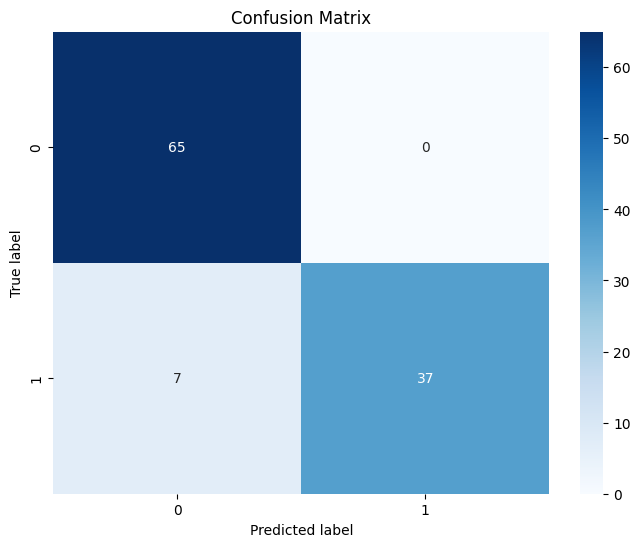

Trivial Baseline Accuracy: 0.5963302752293578


In [ ]:
# Print classification metrics
print("Accuracy:", accuracy_score(y_val, y_val_predictions))
print("Precision:", precision_score(y_val, y_val_predictions, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions, average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_val_predictions)
print("Confusion Matrix:")
print(conf_matrix)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Trivial Baseline
trivial_baseline = len(y_val[y_val == 0]) / len(y_val)
print("Trivial Baseline Accuracy:", trivial_baseline)

ANOTHER MODEL

In [ ]:
# Model 2: Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

Logistic regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}



Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


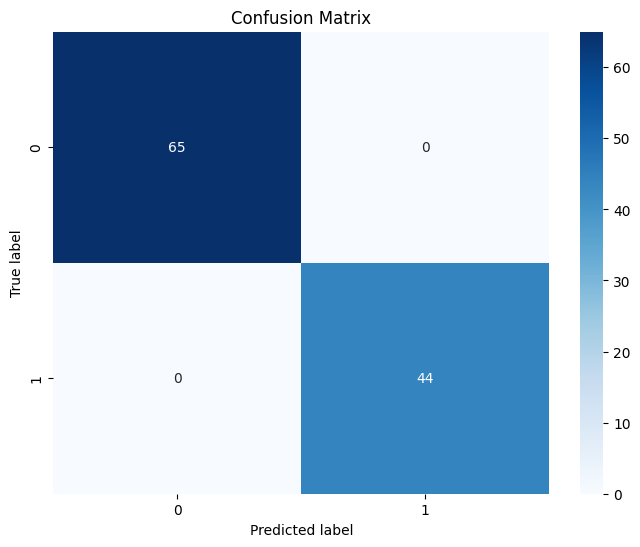

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[59  0]
 [ 0 51]]


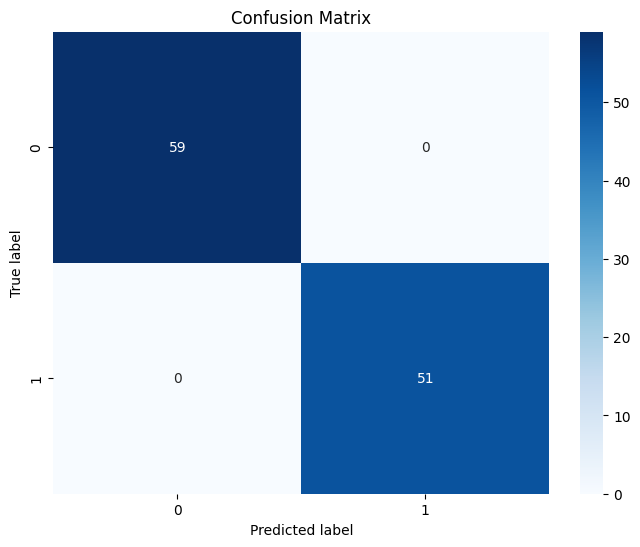

In [ ]:
test_predictions1 = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions1))
print("Precision:", precision_score(y_test, test_predictions1, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions1, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions1,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions1)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
data = pd.DataFrame({"Y_test" : y_test , "Y_predict": test_predictions1})
data.head(10)

Y_test  Y_predict
0       0          0
1       1          1
2       1          1
3       1          1
4       1          1
5       0          0
6       0          0
7       0          0
8       0          0
9       0          0

In [ ]:
logreg_grid.best_estimator_.coef_

array([[ 0.14430901, -0.15434556, -0.01003655, ...,  0.03076854,
         0.02068892, -0.00597174]])

In [ ]:
logreg_grid.best_estimator_.intercept_

array([-0.02968093])

Accuracy: 1.0
F1-score: 1.0


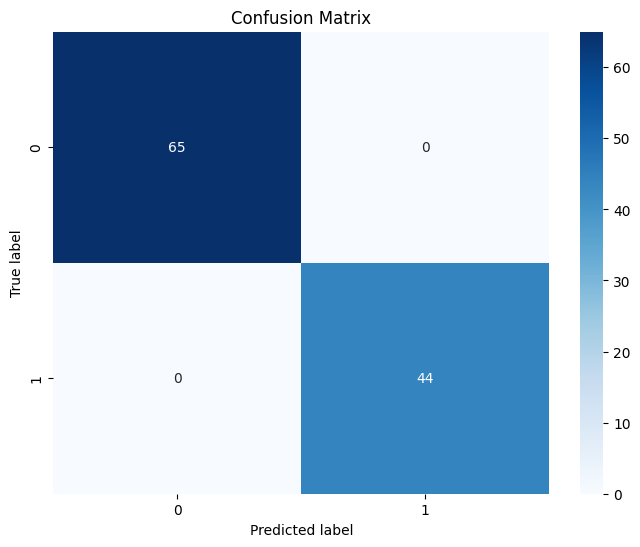

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

#Evaluate on Validation Data
y_val_predictions = svm_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_val_predictions)
conf_matrix = confusion_matrix(y_val, y_val_predictions)
f1_score = f1_score(y_val, y_val_predictions,average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 1.0
F1-score: 1.0


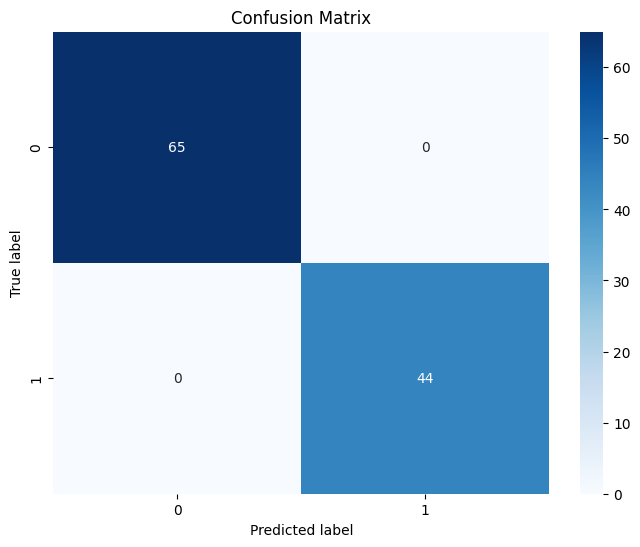

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Training the model
clf.fit(X_train, y_train)

#Evaluate on Validation Data
y_val_predictions = clf.predict(X_val)

accuracy = accuracy_score(y_val, y_val_predictions)
conf_matrix = confusion_matrix(y_val, y_val_predictions)
#f1_score_val = f1_score(y_val, y_val_predictions,average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("F1-score:", f1_score)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **APPLICATION OF PCA FOR DIMENSIONALITY REDUCTION**

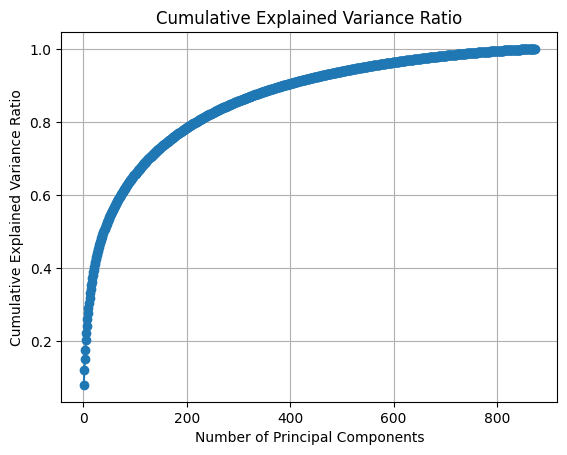

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Transform validation and test data using the learned PCA transformation
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Plot the explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

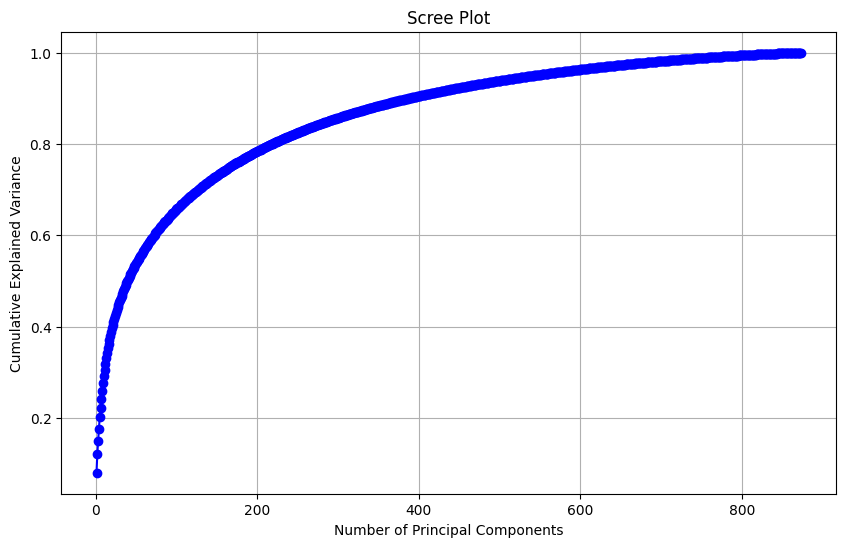

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [ ]:
n_components_optimal = 300 # Replace with your chosen number of components

# Create a PCA instance with the optimal number of components
pca = PCA(n_components=n_components_optimal)

# Fit and transform your training data
X_train_pca = pca.fit_transform(X_train)

# Transform your validation and test data using the same PCA model
X_valid_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca

array([[ 0.93741344,  1.75050931, -2.03147048, ...,  0.11974085,
         0.05858564, -0.04028436],
       [ 2.449481  ,  0.05231064,  0.71554506, ...,  0.13386338,
        -0.25919488, -0.11295241],
       [ 3.21276252, -0.47156112, -0.10828185, ...,  0.13576046,
         0.02616295,  0.07623968],
       ...,
       [-0.44707378,  1.57095083, -0.68335297, ...,  0.004388  ,
        -0.14897078, -0.01062176],
       [-0.48373424,  1.04728629, -1.25255914, ...,  0.11237499,
         0.14715268, -0.27077121],
       [ 1.7811768 , -0.47804127,  0.22940655, ...,  0.05893799,
         0.39760418, -0.01643847]])

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter= 2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train_pca, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_valid_pca)

Logistic regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


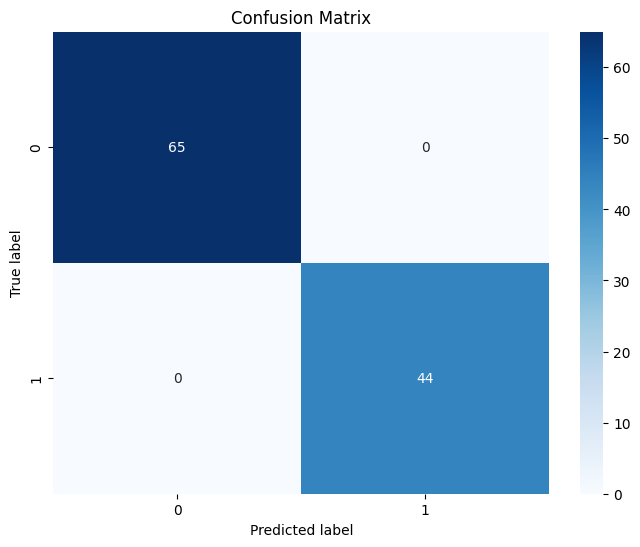

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[59  0]
 [ 0 51]]


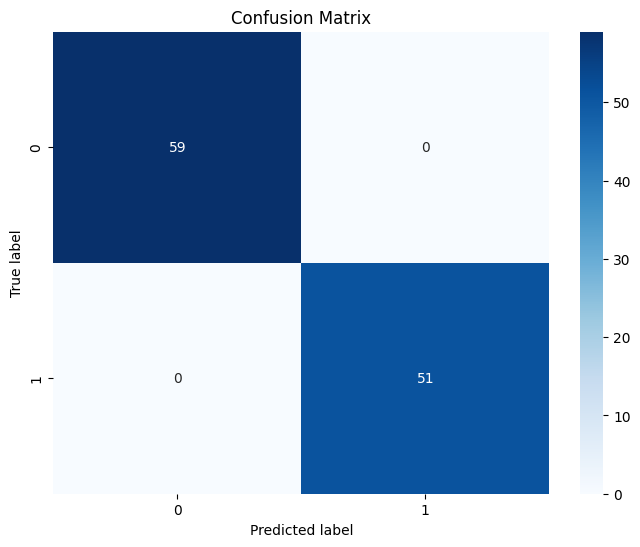

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test_pca)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

## **FEATURE SELECTION**

### **STOCHASTIC DIFFUSION SEARCH METHOD**

LR - SDS features selection
Originial data shape: (1092, 693)
Accuracy for all features: 1.0

Search space size: 1.0097135929256825e+176


====> Trial: 0

==>Iteration: 0
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 1
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 2
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 3
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 4
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 5
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 6
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 7
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 8
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 9
Best accuracy in iteration: 	 1.0
Best overall accuracy:		 1.0

==>Iteration: 10
Best accuracy in iteration: 

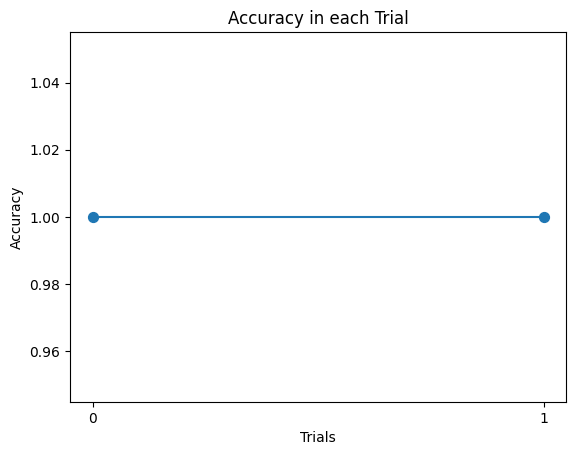


======== FINAL RESULTS ======== 
Selected features [0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

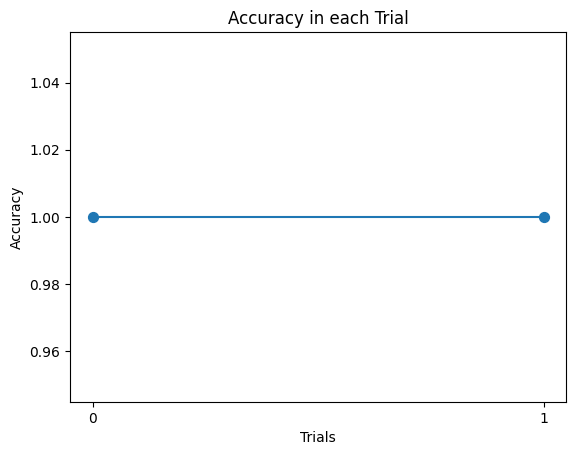


======== FINAL RESULTS ======== 
Selected features: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 70, 71, 72, 73, 74, 76, 78, 79, 81, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 108, 110, 111, 114, 115, 118, 119, 120, 121, 122, 124, 125, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 163, 164, 166, 167, 168, 171, 172, 173, 174, 175, 176, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 200, 202, 204, 205, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 227, 228, 229, 232, 233, 234, 235, 237, 239, 240, 241, 244, 248, 249, 250, 251, 252, 253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 265, 270, 272, 273, 274, 275, 276,

In [ ]:
import numpy as np
import random
import math
import time
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn import metrics
from numpy import genfromtxt
from sklearn.model_selection import train_test_split

testRun = True

score_store= {}
def SDS(features_size,cost_function, df, maxIteration=50, population_size = 100):
    VarSize = df.shape[1]-1
    search_space_size = math.factorial(VarSize)/(math.factorial(features_size)*math.factorial(VarSize-features_size))
    print("Search space size: "+str(search_space_size))

	#agent class
    class Agent(object):
        def __init__(self):
            self.set_random_hypotesis()
            self.active = False

        def set_random_hypotesis(self):
            self.hypotesis = [1]*features_size + [0]*(VarSize-features_size)
            np.random.shuffle(self.hypotesis)

        def set_hypotesis_with_offset(self, new_hypotesis):
            self.hypotesis[:] = new_hypotesis #copy good hypotesis
            zero_set = False
            one_set = False
            stored = -1
            z=VarSize-1
            while not zero_set or not one_set:
                r = random.randint(0,z)
                if(self.hypotesis[r]==1 and stored!=r and not zero_set):
                    self.hypotesis[r]=0
                    zero_set = True
                    stored = r
                r2 = random.randint(0,z)
                if(self.hypotesis[r2]==0 and stored!=r2 and not one_set):
                    self.hypotesis[r2]=1
                    one_set = True
                    stored = r2

        def calculate(self,with_metric=True):
            if self.active==True:
                self.score

            indexes = []
            for j in range(0,VarSize):
                if(self.hypotesis[j]==1):
                    indexes.append(j)
            indexes.append(VarSize)
            subdata = df[:,indexes]
            #print('Indices selected:' , indexes[:len(indexes)-1])

            if(with_metric):
                self.score = cost_function(subdata,True)
            else:
                self.score = cost_function(subdata,True)

        def cal(self,  hypo):
            indexes = []
            for j in range(0,VarSize-1):
                if(hypo[j]==1):
                    indexes.append(j)
            indexes.append(VarSize)
            subdata = df[:,indexes]

            score = cost_function(subdata)
            return score


    # INITIALIZATION
    def initial():
        global population
        population=[]
        for ag in range(population_size):
            population.append(Agent())
        for ag in population:
            ag.calculate()

    #TEST
    def test():
        for ag in population:
            s = np.random.choice(population)
            while(s == ag):
                s = np.random.choice(population)
            another_agent = s
            if(ag.score >= another_agent.score):
                ag.active = True
            else:
                ag.active = False

    #DIFFUSION
    def diffusion():
        for ag in population:
             if (ag.active==False):
                #print('ag is inactive and the score is:', ag.score,'and its hypo is:', ag.hypotesis)
                another_agent= np.random.choice(population)
                while(another_agent==ag):
                    another_agent=np.random.choice(population)
                if(another_agent.active):
                    #print('The other agent hypo is', another_agent.hypotesis)
                    ag.set_hypotesis_with_offset(another_agent.hypotesis)
                    ag.calculate()
                    #print('After the offset:', ag.score, ', with hypo:', ag.hypotesis)
                else:
                    ag.set_random_hypotesis()
                    ag.calculate()
                    #print('The score of random hypo:', ag.score, ' and the new hypo is:', ag.hypotesis)

             else:
                 #print('Ag is active and its score is', ag.score)
                 another_agent= np.random.choice(population)
                 while(another_agent==ag):
                    another_agent=np.random.choice(population)
                 if((another_agent.active) and (another_agent.hypotesis == ag.hypotesis)):
                    ag.active=False
                    ag.set_random_hypotesis()
                    ag.calculate()
                    #print('The score after context sensitive diffusion is: ', ag.score)

    # #MAIN
    trial=10
    if testRun: trial = 2
    maxAcc=-1
    trial_best=[]
    for trialCounter in range(trial):
        initial()
        maxAccForit=-1
        best_it=[]
        print('\n\n====> Trial:', trialCounter)
        for iteration in range(maxIteration):
            print('\n==>Iteration:', iteration)
            it=-1
            for ag in population:
                if ag.score>it:
                    it=ag.score

            for ag in population:
                #print(ag.score)
                #print(ag.active)
                if (ag.score > maxAccForit):
                    maxAccForit=ag.score
                if(ag.score>maxAcc):
                    maxAcc=ag.score
                    best=ag.hypotesis

            test()
            diffusion()

            print( 'Best accuracy in iteration: \t', maxAccForit)
            best_it.append(maxAccForit)#for ploting the max acc at each iteration
            print('Best overall accuracy:\t\t', maxAcc)

        trial_best.append(max(best_it)) #here the trial ends


    print('\nBest accuracy in each trial:', trial_best)

    print('Time elapsed:', (time.time() - start_time))
    t=[]
    for i in range(trial):
        t.append(i)
    tr=np.array(t)
    tra=np.array(trial_best)
    plt.plot(tr,tra)
    plt.scatter(tr,tra, s=50)
    plt.xlabel('Trials')
    plt.xticks(range(0,len(t)))
    plt.ylabel('Accuracy')
    plt.title('Accuracy in each Trial')
    plt.show()
    print('\n======== FINAL RESULTS ======== ')
    return best

#to calculate the run time
start_time = time.time()


#Fintess function
def log_accuracy(df, additional_metrics = False):
    np.random.shuffle(df)
    np.random.shuffle(df)
    clf = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter= 2000)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_val, y_val)
    if(additional_metrics):
        predicted = clf.predict(X_val)
        CM = metrics.confusion_matrix(y_val, predicted)
        #print('the Confusion Matrix')
        #print(CM)
        #TN = CM[0][0]
        #FN = CM[1][0]
        #TP = CM[1][1]
        #FP = CM[0][1]
        #print("Additional metrics: ")
        #print("TP "+str(TP))
        #print("FP "+str(FP))
        #print("TN "+str(FN))
        #print("FN "+str(FN))
        #sensitivity = TP / (TP + FN)
        #print(sensitivity)
        #specificity = TN / (FP + TN)
        #print("Specificity "+str(specificity))
        #print('Accuracy', accurancy)
    return accuracy


print("LR - SDS features selection")
my_data = df.values
x_norm = X_train
np.random.shuffle(my_data)
print('Originial data shape:', my_data.shape)

# For all features
print("Accuracy for all features: "+str(abs(log_accuracy(my_data, True))) + "\n")

#For selected features
features_size = 500
maxIteration = 50
if testRun: maxIteration = 30
population_size = 100
if testRun: population_size = 30
print("Selected features "+str(SDS(features_size,log_accuracy,my_data,maxIteration,population_size)))

best_feature_subset = SDS(features_size, log_accuracy, my_data, maxIteration, population_size)

# Print the selected features
print("Selected features:", [i for i, val in enumerate(best_feature_subset) if val == 1])

In [ ]:
best_feature_subset

[1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


In [ ]:
df.columns

Index(['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery',
       'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy',
       'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc',
       ...
       'mtap_mut', 'ppp2cb_mut', 'smarcd1_mut', 'nras_mut', 'ndfip1_mut',
       'hras_mut', 'prps2_mut', 'smarcb1_mut', 'stmn2_mut', 'siah1_mut'],
      dtype='object', length=693)

In [ ]:
selected_features = [feature for i, feature in enumerate(X.columns) if best_feature_subset[i] == 1]
print("Actual selected features:", selected_features)


Actual selected features: ['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'oncotree_code', 'overall_survival_months', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_stage', 'death_from_cancer', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'bard1', 'mlh1', 'msh2', 'msh6', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'src', 'jak2', 'stat1', 'stat3', 'mdm2', 'tp53bp1', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 

In [ ]:
new_X = X[selected_features]

In [ ]:
new_X

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
1              2             43.19      BREAST CONSERVING  Breast Cancer   
4              8             76.97             MASTECTOMY  Breast Cancer   
5             10             78.77             MASTECTOMY  Breast Cancer   
8             28             86.41      BREAST CONSERVING  Breast Cancer   
9             35             84.22             MASTECTOMY  Breast Cancer   
...          ...               ...                    ...            ...   
1618        6232             71.22             MASTECTOMY  Breast Cancer   
1619        6233             70.65      BREAST CONSERVING  Breast Cancer   
1621        6237             75.62             MASTECTOMY  Breast Cancer   
1623        6239             52.84      BREAST CONSERVING  Breast Cancer   
1664        6346             63.20      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed  chemotherapy  \
1              Breast Invasive Ductal Carcinoma             0   
4     Breast Mixed Ductal and Lobular Carcinoma             1   
5              Breast Invasive Ductal Carcinoma             0   
8              Breast Invasive Ductal Carcinoma             0   
9             Breast Invasive Lobular Carcinoma             0   
...                                         ...           ...   
1618  Breast Mixed Ductal and Lobular Carcinoma             0   
1619  Breast Mixed Ductal and Lobular Carcinoma             0   
1621           Breast Invasive Ductal Carcinoma             0   
1623  Breast Mixed Ductal and Lobular Carcinoma             1   
1664   Breast Invasive Mixed Mucinous Carcinoma             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc er_status  \
1                           LumA     1.0                   Positve  Positive   
4                           LumB     1.0                   Positve  Positive   
5                           LumB     1.0                   Positve  Positive   
8                           LumB     1.0                   Positve  Positive   
9                           Her2     1.0                  Negative  Positive   
...                          ...     ...                       ...       ...   
1618                        LumA     5.0                   Positve  Positive   
1619                        LumB     5.0                   Positve  Positive   
1621                       Basal     5.0                  Negative  Negative   
1623                      Normal     5.0                   Positve  Positive   
1664                        LumB     5.0                   Positve  Positive   

      ...  spaca1_mut rasgef1b_mut hist1h2bc_mut  nr2f1_mut mbl2_mut  \
1     ...           0            0             0          0        0   
4     ...           0            0             0          0        0   
5     ...           0            0             0          0        0   
8     ...           0            0             0          0        0   
9     ...           0            0             0          0        0   
...   ...         ...          ...           ...        ...      ...   
1618  ...           0            0             0          0        0   
1619  ...           0            0             0          0        0   
1621  ...           0            0             0          0        0   
1623  ...           0            0             0          0        0   
1664  ...           0            0             0          0        0   

     ndfip1_mut  prps2_mut  smarcb1_mut stmn2_mut  siah1_mut  
1             0          0            0         0          0  
4             0          0            0         0          0  
5             0          0            0         0          0  
8             0          0            0         0          0  
9             0          0            0         0          0  
...         ...        ...          ...       ...        ...  
1618          0          0            0      

In [ ]:
def identify_data_types(new_X):
    numerical_columns = new_X.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = new_X.select_dtypes(include=['object', 'category']).columns.tolist()

    return numerical_columns, categorical_columns

In [ ]:
numerical_columns, categorical_columns = identify_data_types(new_X)

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['patient_id', 'age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'overall_survival_months', 'radio_therapy', 'tumor_stage', 'palb2', 'pten', 'tp53', 'atm', 'cdh1', 'chek2', 'nbn', 'nf1', 'bard1', 'mlh1', 'msh2', 'msh6', 'epcam', 'rad51c', 'rad51d', 'rad50', 'rb1', 'rbl1', 'ccna1', 'ccnb1', 'cdk1', 'ccne1', 'cdk2', 'cdc25a', 'ccnd1', 'cdk4', 'ccnd2', 'cdkn2a', 'cdkn2b', 'myc', 'cdkn1a', 'e2f3', 'e2f4', 'e2f5', 'e2f6', 'e2f7', 'src', 'jak2', 'stat1', 'stat3', 'mdm2', 'tp53bp1', 'adam17', 'aph1a', 'aph1b', 'arrdc1', 'cir1', 'ctbp1', 'ctbp2', 'cul1', 'dll1', 'dll4', 'dtx1', 'dtx2', 'ep300', 'fbxw7', 'hdac1', 'hdac2', 'hes1', 'heyl', 'jag1', 'jag2', 'maml1', 'maml2', 'ncstn', 'notch1', 'notch2', 'notch3', 'nrarp', 'numbl', 'psen1', 'psenen', 'rbpjl', 'rfng', 'snw1', 'spen', 'hes2', 'hes4', 'hes7', 'hey1', 'hey2', 'acvr1', 'acvr1b', 'acvr1c', 'acvr2a', 'acvr2b', 'acvrl1', 'akt1s1

In [ ]:
new_X_categorical = new_X[categorical_columns]
print (new_X_categorical)

     type_of_breast_surgery    cancer_type  \
1         BREAST CONSERVING  Breast Cancer   
4                MASTECTOMY  Breast Cancer   
5                MASTECTOMY  Breast Cancer   
8         BREAST CONSERVING  Breast Cancer   
9                MASTECTOMY  Breast Cancer   
...                     ...            ...   
1618             MASTECTOMY  Breast Cancer   
1619      BREAST CONSERVING  Breast Cancer   
1621             MASTECTOMY  Breast Cancer   
1623      BREAST CONSERVING  Breast Cancer   
1664      BREAST CONSERVING  Breast Cancer   

                           cancer_type_detailed pam50_+_claudin-low_subtype  \
1              Breast Invasive Ductal Carcinoma                        LumA   
4     Breast Mixed Ductal and Lobular Carcinoma                        LumB   
5              Breast Invasive Ductal Carcinoma                        LumB   
8              Breast Invasive Ductal Carcinoma                        LumB   
9             Breast Invasive Lobular Carcinoma     

In [ ]:
X_numerical = X[numerical_columns]
print (X_numerical)

      patient_id  age_at_diagnosis  chemotherapy  cohort  \
1              2             43.19             0     1.0   
4              8             76.97             1     1.0   
5             10             78.77             0     1.0   
8             28             86.41             0     1.0   
9             35             84.22             0     1.0   
...          ...               ...           ...     ...   
1618        6232             71.22             0     5.0   
1619        6233             70.65             0     5.0   
1621        6237             75.62             0     5.0   
1623        6239             52.84             1     5.0   
1664        6346             63.20             0     5.0   

      neoplasm_histologic_grade  hormone_therapy  \
1                           3.0                1   
4                           3.0                1   
5                           3.0                1   
8                           3.0                1   
9                  

In [ ]:
new_X_train, X_temp= train_test_split(new_X, test_size=0.2, random_state=42)
new_X_val, new_X_test = train_test_split(X_temp, test_size=0.5, random_state=42)
print(new_X_train.shape)
print(new_X_val.shape)
print(new_X_test.shape)


(873, 500)
(109, 500)
(110, 500)


In [ ]:
new_X_train

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
19            60             45.43      BREAST CONSERVING  Breast Cancer   
1379        5458             54.96             MASTECTOMY  Breast Cancer   
1121        5057             39.25      BREAST CONSERVING  Breast Cancer   
1230        5226             75.53      BREAST CONSERVING  Breast Cancer   
963         4745             50.08      BREAST CONSERVING  Breast Cancer   
...          ...               ...                    ...            ...   
479          904             83.01             MASTECTOMY  Breast Cancer   
649         3105             48.34             MASTECTOMY  Breast Cancer   
207          336             74.76             MASTECTOMY  Breast Cancer   
1471        5605             40.37      BREAST CONSERVING  Breast Cancer   
1238        5235             59.04      BREAST CONSERVING  Breast Cancer   

                  cancer_type_detailed  chemotherapy  \
19    Breast Invasive Ductal Carcinoma             1   
1379  Breast Invasive Ductal Carcinoma             1   
1121  Breast Invasive Ductal Carcinoma             0   
1230  Breast Invasive Ductal Carcinoma             0   
963   Breast Invasive Ductal Carcinoma             1   
...                                ...           ...   
479   Breast Invasive Ductal Carcinoma             0   
649   Breast Invasive Ductal Carcinoma             0   
207   Breast Invasive Ductal Carcinoma             0   
1471  Breast Invasive Ductal Carcinoma             0   
1238  Breast Invasive Ductal Carcinoma             0   

     pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc er_status  \
19                          LumB     1.0                   Positve  Positive   
1379                       Basal     3.0                  Negative  Negative   
1121                       Basal     3.0                  Negative  Negative   
1230                        LumB     3.0                   Positve  Positive   
963                         Her2     3.0                  Negative  Negative   
...                          ...     ...                       ...       ...   
479                         LumA     1.0                   Positve  Positive   
649                         LumA     2.0                   Positve  Positive   
207                         LumB     1.0                   Positve  Positive   
1471                        LumB     3.0                   Positve  Positive   
1238                       Basal     3.0                   Positve  Negative   

      ...  spaca1_mut rasgef1b_mut hist1h2bc_mut  nr2f1_mut mbl2_mut  \
19    ...           0            0             0          0        0   
1379  ...           0            0             0          0        0   
1121  ...           0            0             0          0        0   
1230  ...           0            0             0          0        0   
963   ...           0            0             0          0        0   
...   ...         ...          ...           ...        ...      ...   
479   ...           0            0             0          0        0   
649   ...           0            0             0          0        0   
207   ...           0            0             0          0        0   
1471  ...           0            0             0          0        0   
1238  ...           0            0             0          0        0   

     ndfip1_mut  prps2_mut  smarcb1_mut stmn2_mut  siah1_mut  
19            0          0            0         0          0  
1379          0          0            0         0          0  
1121          0          0            0         0          0  
1230          0          0            0         0          0  
963           0          0            0         0          0  
...         ...        ...          ...       ...        ...  
479           0          0            0         0          0  
649           0          0            0         0          0  
207           0          0 

In [ ]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(handle_unknown='ignore'),
            categorical_columns,
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
ct_cat.fit(new_X_train)
encoded_array = ct_cat.transform(new_X_train).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
new_X_train= pd.DataFrame(encoded_array, columns=encoded_col_names)

['type_of_breast_surgery_BREAST CONSERVING'
 'type_of_breast_surgery_MASTECTOMY' 'cancer_type_Breast Cancer' ...
 'tulp4' 'ugt2b17' 'ugt2b7']


In [ ]:
encoded_array = ct_cat.transform(new_X_val).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
new_X_val= pd.DataFrame(encoded_array, columns=encoded_col_names)

['type_of_breast_surgery_BREAST CONSERVING'
 'type_of_breast_surgery_MASTECTOMY' 'cancer_type_Breast Cancer' ...
 'tulp4' 'ugt2b17' 'ugt2b7']


In [ ]:
encoded_array = ct_cat.transform(new_X_test).toarray()

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
new_X_test= pd.DataFrame(encoded_array, columns=encoded_col_names)

['type_of_breast_surgery_BREAST CONSERVING'
 'type_of_breast_surgery_MASTECTOMY' 'cancer_type_Breast Cancer' ...
 'tulp4' 'ugt2b17' 'ugt2b7']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
new_X_scaled = scaler.fit_transform(new_X_train[numerical_columns])

In [ ]:
new_X_scaled_val = scaler.transform(new_X_val[numerical_columns])

In [ ]:
new_X_scaled_test = scaler.transform(new_X_test[numerical_columns])

In [ ]:
X_scaled_column = scaler.get_feature_names_out()
new_X_train[numerical_columns]= pd.DataFrame(new_X_scaled, columns=X_scaled_column)
new_X_val[numerical_columns] = pd.DataFrame(new_X_scaled_val, columns=X_scaled_column)
new_X_test[numerical_columns] = pd.DataFrame(new_X_scaled_test, columns=X_scaled_column)

In [ ]:
new_X_train

type_of_breast_surgery_BREAST CONSERVING  \
0                                         1.0   
1                                         0.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   
..                                        ...   
868                                       0.0   
869                                       0.0   
870                                       0.0   
871                                       1.0   
872                                       1.0   

     type_of_breast_surgery_MASTECTOMY  cancer_type_Breast Cancer  \
0                                  0.0                        1.0   
1                                  1.0                        1.0   
2                                  0.0                        1.0   
3                                  0.0                        1.0   
4                                  0.0                        1.0   
..                                 ...                        ...   
868                                1.0                        1.0   
869                                1.0                        1.0   
870                                1.0                        1.0   
871                                0.0                        1.0   
872                                0.0                        1.0   

     cancer_type_detailed_Breast  \
0                            0.0   
1                            0.0   
2                            0.0   
3                            0.0   
4                            0.0   
..                           ...   
868                          0.0   
869                          0.0   
870                          0.0   
871                          0.0   
872                          0.0   

     cancer_type_detailed_Breast Invasive Ductal Carcinoma  \
0                                                  1.0       
1                                                  1.0       
2                                                  1.0       
3                                                  1.0       
4                                                  1.0       
..                                                 ...       
868                                                1.0       
869                                                1.0       
870                                                1.0       
871                                                1.0       
872                                                1.0       

     cancer_type_detailed_Breast Invasive Lobular Carcinoma  \
0                                                  0.0        
1                                                  0.0        
2                                                  0.0        
3                                                  0.0        
4                                                  0.0        
..                                                 ...        
868                                                0.0        
869                                                0.0        
870                                                0.0        
871                                                0.0        
872                                                0.0        

     cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma  \
0                                                  0.0               
1                                                  0.0               
2                                                  0.0               
3                                                  0.0               
4                                                  0.0               
..                                                 ...               
868                                                0.0               
869                                                0.0               
870                   

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter= 2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


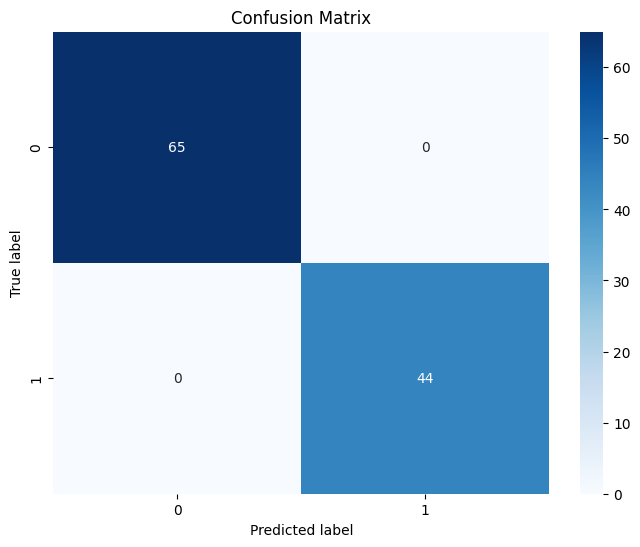

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[59  0]
 [ 0 51]]


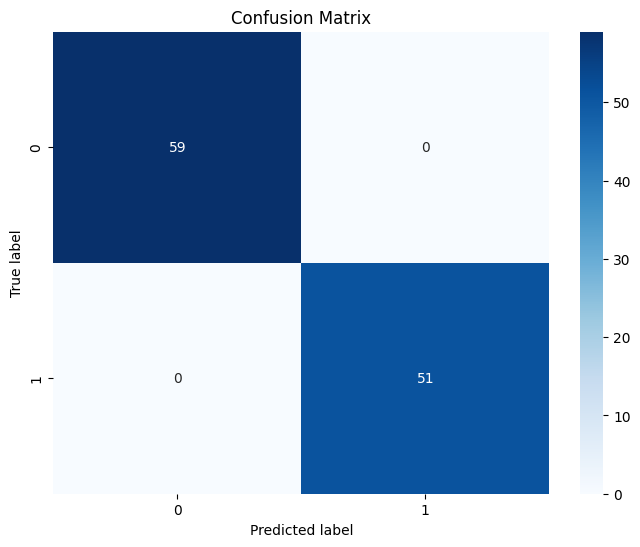

In [ ]:
test_predictions3 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions3))
print("Precision:", precision_score(y_test, test_predictions3, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions3, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions3,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions3)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **IMPROVED SDS[ADAPTIVE]**

In [ ]:
X = pd.concat([X_train, X_test, X_val], ignore_index=True)

In [ ]:
X=np.array(X)


In [ ]:
lblEncoder_Y = LabelEncoder()
y= lblEncoder_Y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
y= np.array(y)

In [ ]:
X

array([[1.        , 0.        , 1.        , ..., 0.09267091, 0.17450967,
        0.07384979],
       [0.        , 1.        , 1.        , ..., 0.22952781, 0.14868345,
        0.66664347],
       [1.        , 0.        , 1.        , ..., 0.0849495 , 0.13053201,
        0.12173731],
       ...,
       [0.        , 1.        , 1.        , ..., 0.09331089, 0.16255373,
        0.03231944],
       [0.        , 1.        , 1.        , ..., 0.09191964, 0.20495641,
        0.10280504],
       [0.        , 1.        , 1.        , ..., 0.20533404, 0.11181497,
        0.92336605]])

In [ ]:
from sklearn.svm import SVC
#Creating instances of estimators
logReg=LogisticRegression(C=100, solver='liblinear', max_iter= 2000)
decClf=DecisionTreeClassifier(max_depth=5, min_samples_split=4)
svc=SVC(C=0.5,gamma=0.5)

estimators=[svc,logReg,decClf]

# Below function returns an agent, which is hypothesis, and its corresponding binary array.
# 1 indicates inclusion of corresponding feature and 0 indicates exclusion of the feature.
# lowerLim indicates minimum number of features, whereas; upperLim indicated max no of features to beincluded in an agent
def agent(arryX,lowerLim,upperLim):
        if lowerLim<0 or upperLim>arryX.shape[1]:
            print('recall function with appropriate limits')
        else:
            randomNoFeatures=np.random.randint(lowerLim,upperLim,size=1)[0] #generating a random number
            zeroArry=np.zeros(arryX.shape[1]-randomNoFeatures, dtype='int') #zero array
            oneArry=np.ones(randomNoFeatures, dtype='int')   #one array
            fArry=np.concatenate((zeroArry,oneArry), axis=0) #concatinating zero and one array
            np.random.shuffle(fArry) #shuffling fArray
            fIndex=np.where(fArry==1)[0]
            agentArry=arryX[:,fIndex] #generating feature subset from origanal dataset
            return fArry,agentArry


# Below function generates required number of agents that are to be deployed on search space.
# All the agents and corresponding binary feature array are stored and returned as a list.

def agentsInitiation(arryX,numAgents,lowerLim,upperLim):
        agents=[]
        agentFIndex=[]
        agentStatus=['active']*numAgents
        for i in range(0,numAgents):
            fArry,agentArry=agent(arryX,lowerLim,upperLim) #generating a single agent
            agentFIndex.append(fArry) #appending its binary feature array to agentFIndex
            agents.append(agentArry) #appending the agent to the agents list
        return agents,agentFIndex,agentStatus


# 'Score' function fits each model to the agent's training data and then evaluates the score on test agent.
# The output is the average score of three estimators. Original paper used only one classifier to calculate score.
# Therefore, the resultant subset was very biased towards the signle estimator.
# To avoind this, we are using ensemble of classifiers.

def score(estimators,arryX,arrY):
        X_train,X_test,y_train,y_test=train_test_split(arryX,arrY,random_state=0)
        scores=[]
        for i in range(len(estimators)):
            estimators[i].fit(X_train,y_train) #fitting the ith estimator to the training data of an agent
            scores.append(estimators[i].score(X_test,y_test)) #evaluating the score on the test data
        return sum(scores)/len(scores)



#below function calculates score for each agents and appends the score to the agentScores list
def agentClfscores(estimators,agents,arrY):
    agentScores=[]
    for agent in agents:
        agentscore=score(estimators,agent,arrY)
        agentScores.append(agentScores)
    return agentScores #returns a list that caputres agents' scores



def SDSFS(arryX,arrY,estimators,numIterations,numAgents,lowerLim,upperLim):
    agents,agentFIndex,agentStatus=agentsInitiation(arryX,numAgents,lowerLim,upperLim)
    agentScores=agentClfscores(estimators,agents,arrY)
    niters=0
    while niters<numIterations:
        #testing phase
        for i in range(len(agents)):
            rndmId=np.random.randint(len(agents),size=1)[0]
            if agentScores[i]>agentScores[rndmId]:
                agentStatus[i]='active'

            else:
                agentStatus[i]='inactive'

        #Diffusion phase
        for i in range(len(agents)):
                if agentStatus[i]=='inactive':
                    rndmId2=np.random.randint(len(agents),size=1)[0]
                    if agentStatus[rndmId2]=='active':
                        oneIds=np.where(agentFIndex[rndmId2]==1)[0]
                        zeroIds=np.where(agentFIndex[rndmId2]==0)[0]
                        rndmId3=np.random.randint(len(oneIds), size=1)
                        rndmId4=np.random.randint(len(zeroIds), size=1)
                        oneZeroId=oneIds[rndmId3]
                        zeroOneId=zeroIds[rndmId4]
                        agentFIndex[i]=agentFIndex[rndmId2].copy()
                        agentFIndex[i][oneZeroId]=0
                        agentFIndex[i][zeroOneId]=1
                        fIndex2=np.where(agentFIndex[i]==1)[0]
                        agents[i]=X[:,fIndex2]
                        agentScores[i]=score(estimators,agents[i],arrY)
                    else:
                        agentFIndex[i],agents[i]=agent(arryX,lowerLim,upperLim)
                        agentScores[i]=score(estimators,agents[i],arrY)
                else:
                    rndmId5=np.random.randint(len(agents),size=1)[0]
                    if agentStatus[rndmId5]=='active' and (agentFIndex[i]==agentFIndex[rndmId5]).all():
                        agentStatus[i]='inactive'
                        agentFIndex[i],agents[i]=agent(arryX,lowerLim,upperLim)
                        agentScores[i]=score(estimators,agents[i],arrY)
        niters+=1
    return agents,agentFIndex,agentStatus,agentScores






In [ ]:
agents,agentFIndex,agentStatus,agentScores=SDSFS(X,y,estimators,100,350,5,100)
max(agentScores)

0.6373626373626373

In [ ]:
np.argmax(np.array(agentScores))

57

In [ ]:
agents[57].shape

(1092, 99)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(agents[57], y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(873, 99)
(873,)
(219, 99)
(219,)


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

Logistic regression Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Accuracy: 0.5616438356164384
Precision: 0.5360453853604539
Recall: 0.5616438356164384
F1-score: 0.49931506849315066
Confusion Matrix:
[[107  17]
 [ 79  16]]


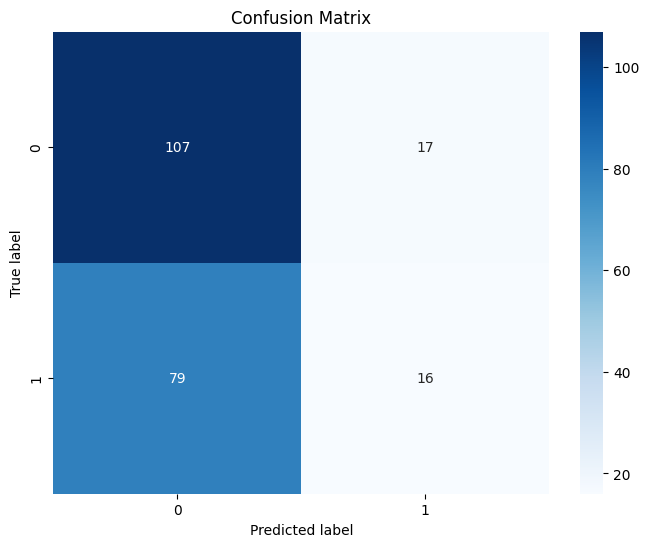

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **MACHINE LEARNING METHOD(FEATURE IMPORTANCE)**

In [ ]:
fi = pd.DataFrame({'features':X_train.columns, 'importance':abs(logreg_grid.best_estimator_.coef_[0])}).sort_values(by=['importance'],ascending = False)
fi

features    importance
63                  death_from_cancer_Living  3.045099e+00
61         death_from_cancer_Died of Disease  1.670901e+00
62    death_from_cancer_Died of Other Causes  1.384234e+00
3987                 overall_survival_months  5.019344e-01
3979                        age_at_diagnosis  2.166307e-01
...                                      ...           ...
2775                         erbb3_mut_E928G  1.090512e-04
2433                            map2k4_mut_0  6.351539e-05
110                   pik3ca_mut_H1047R E81K  4.034969e-05
4320                                    clk3  7.094003e-06
4419                                   ackr3  1.010329e-07

[4480 rows x 2 columns]

<Axes: xlabel='importance', ylabel='features'>

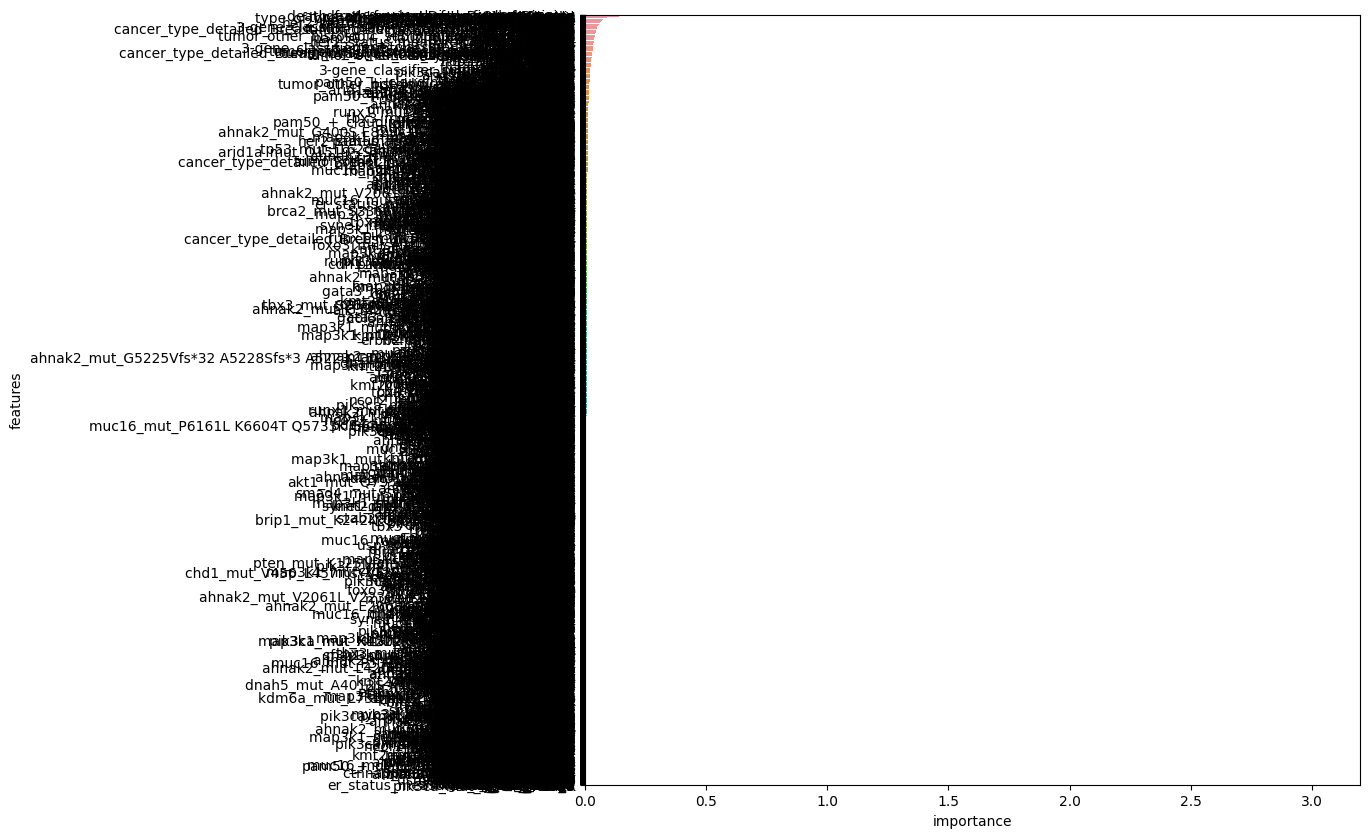

In [ ]:
plt.figure(figsize=(10,10))

sns.barplot(x="importance", y="features", data=fi)

In [ ]:
important_features = fi[fi['importance'] > 0.45]

In [ ]:
selected_features = important_features['features']

# Optionally, print or use the selected features
print("Selected Features:", selected_features)


Selected Features: 63                    death_from_cancer_Living
61           death_from_cancer_Died of Disease
62      death_from_cancer_Died of Other Causes
3987                   overall_survival_months
Name: features, dtype: object


In [ ]:
new_X_train = X_train[selected_features]
new_X_test = X_test[selected_features]
new_X_val = X_val[selected_features]
# Display the new DataFrame
print("New DataFrame with selected features:")
print(new_X_train)
print(new_X_test)
print(new_X_val)

New DataFrame with selected features:
     death_from_cancer_Living  death_from_cancer_Died of Disease  \
0                         1.0                                0.0   
1                         1.0                                0.0   
2                         0.0                                1.0   
3                         1.0                                0.0   
4                         0.0                                1.0   
..                        ...                                ...   
868                       0.0                                0.0   
869                       1.0                                0.0   
870                       0.0                                1.0   
871                       1.0                                0.0   
872                       0.0                                1.0   

     death_from_cancer_Died of Other Causes  overall_survival_months  
0                                       0.0                 0.415823  
1  

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [0.55441008 1.         0.55441008 1.                nan 1.
 1.         1.         1.         1.                nan 1.
 1.         1.         1.         1.                nan 1.
 1.         1.         1.         1.                nan 1.
 1.         1.         1.         1.                nan 1.
 1.         1.         1.         1.                nan 1.        ]
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **FILTER METHOD**  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Filter method: Mutual Information
k_best = 250 # Select top 250 features
selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Train a classifier on the selected features
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
f1_score = f1_score(y_val, y_pred,average='weighted')
print(f"Accuracy using filter method: {accuracy}")
print(f"F1score using wrapper method: {f1_score}")

Accuracy using filter method: 1.0
F1score using wrapper method: 1.0


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

Logistic regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


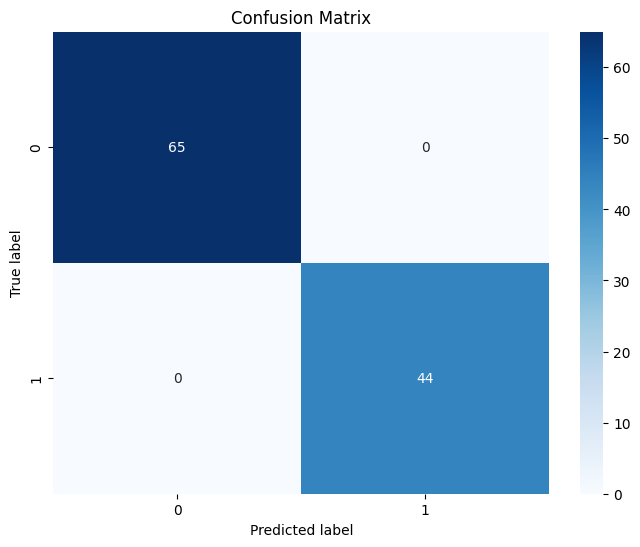

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[59  0]
 [ 0 51]]


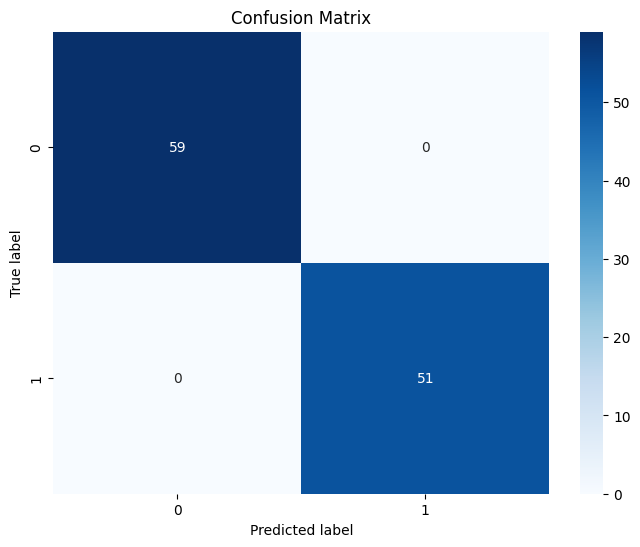

In [ ]:
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### **WRAPPER METHOD**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.datasets import load_digits

n_features_to_select = 250  # Select top 250 features
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=n_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Train a classifier on the selected features
clf = RandomForestClassifier()
clf.fit(X_train_selected, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_val_selected)
accuracy = accuracy_score(y_val, y_pred)
f1_score = f1_score(y_val, y_pred ,average='weighted')

print(f"Accuracy using wrapper method: {accuracy}")
print(f"F1score using wrapper method: {f1_score}")

Accuracy using wrapper method: 1.0
F1score using wrapper method: 1.0


In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(X_train_selected, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Logistic regression Best Hyperparameters: {'C': 0.001, 'penalty': None, 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(X_val_selected)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


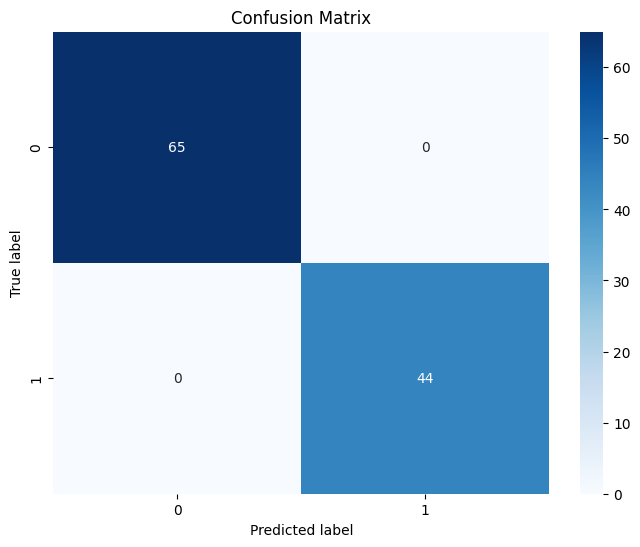

In [ ]:
from sklearn.metrics import f1_score
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[59  0]
 [ 0 51]]


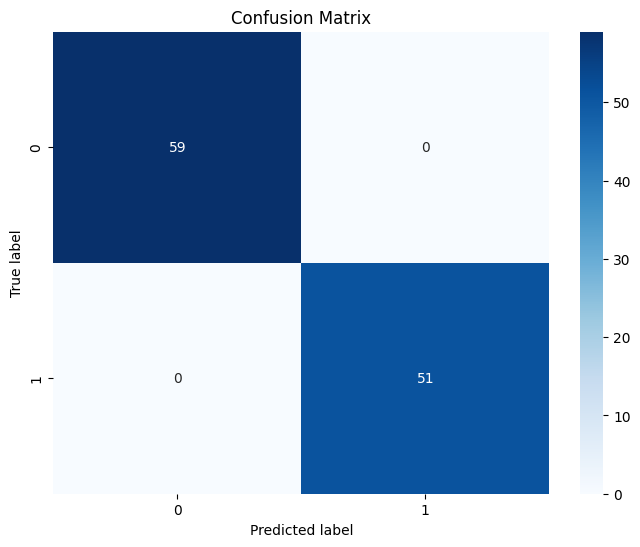

In [ ]:
X_test_selected = selector.transform(X_test)
test_prediction = logreg_grid.best_estimator_.predict(X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_prediction))
print("Precision:", precision_score(y_test, test_prediction, average='weighted'))
print("Recall:", recall_score(y_test, test_prediction, average='weighted'))
print("F1-score:", f1_score(y_test, test_prediction,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

###**STANDARD DEVIATION AND SKEWNESS BASED FEATURE SELECTION METHOD**

In [ ]:
from sklearn.metrics import accuracy_score
import random

class SDSFeatureSelection:
    def __init__(self, population_size, max_iterations, features_size, cost_function, X_train, y_train, X_val, y_val):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.features_size = features_size
        self.cost_function = cost_function
        self.population = []
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val

    def initialize_population(self):
        for _ in range(self.population_size):
            hypothesis = [1] * self.features_size + [0] * (self.X_train.shape[1] - self.features_size)
            random.shuffle(hypothesis)
            self.population.append(hypothesis)

    def calculate_fitness(self, hypothesis, with_metric=True):
        indexes = [i for i in range(len(hypothesis)) if hypothesis[i] == 1]
        print(indexes)
        subdata = self.X_train.iloc[:, indexes]

        if with_metric:
            clf = LogisticRegression(penalty = 'l2', solver = 'liblinear', max_iter= 2000)
            clf.fit(subdata, self.y_train)
            y_pred = clf.predict(self.X_val.iloc[:, indexes])
            print(y_train.shape,y_pred.shape)
            return accuracy_score(self.y_val, y_pred)
        else:
            return self.cost_function(subdata)

    def sds_algorithm(self):
        self.initialize_population()

        for iteration in range(self.max_iterations):
            for agent in self.population:
                # Calculate fitness
                agent_fitness = self.calculate_fitness(agent)

                # Update hypothesis
                for i in range(self.features_size):
                    if random.random() < 0.5:
                        agent[i] = 1
                    else:
                        agent[i] = 0

                # Calculate fitness after the update
                updated_fitness = self.calculate_fitness(agent)

                # Accept or reject the update
                if updated_fitness > agent_fitness:
                    agent_fitness = updated_fitness

        # Select the best hypothesis from the population
        best_hypothesis = max(self.population, key=lambda x: self.calculate_fitness(x))

        return best_hypothesis


sds = SDSFeatureSelection(population_size=15, max_iterations=10, features_size=300, cost_function=None, X_train=X_train, y_train=y_train, X_val=X_val, y_val= y_val)
selected_features = sds.sds_algorithm()

# Print the selected features
print("Selected features:", [i for i, val in enumerate(selected_features) if val == 1])

[4, 21, 55, 57, 65, 71, 78, 87, 93, 104, 113, 116, 136, 142, 150, 160, 180, 186, 246, 252, 253, 264, 281, 283, 299, 325, 341, 354, 355, 358, 371, 380, 390, 400, 409, 447, 456, 459, 484, 488, 494, 517, 526, 546, 547, 548, 594, 628, 643, 651, 661, 667, 687, 726, 732, 736, 746, 761, 768, 769, 782, 785, 793, 794, 803, 831, 862, 889, 897, 940, 971, 990, 1026, 1041, 1056, 1086, 1100, 1109, 1121, 1130, 1153, 1157, 1164, 1187, 1204, 1205, 1244, 1255, 1263, 1264, 1269, 1271, 1293, 1304, 1318, 1395, 1397, 1399, 1430, 1435, 1462, 1466, 1558, 1567, 1586, 1590, 1604, 1609, 1621, 1682, 1694, 1750, 1753, 1794, 1809, 1822, 1870, 1876, 1896, 1904, 1906, 1908, 1957, 1961, 1965, 1978, 2006, 2012, 2015, 2031, 2032, 2034, 2040, 2053, 2075, 2076, 2089, 2096, 2111, 2128, 2151, 2153, 2158, 2185, 2228, 2263, 2287, 2293, 2319, 2338, 2373, 2384, 2395, 2398, 2435, 2462, 2468, 2471, 2476, 2478, 2524, 2541, 2553, 2573, 2599, 2610, 2622, 2623, 2626, 2646, 2648, 2668, 2687, 2716, 2723, 2788, 2791, 2831, 2835, 2841, 2

In [ ]:
actual_features = [feature for i, feature in enumerate(X_train.columns) if selected_features[i] == 1]
print("Actual selected features:", actual_features)

Actual selected features: ['type_of_breast_surgery_BREAST CONSERVING', 'type_of_breast_surgery_MASTECTOMY', 'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma', 'cellularity_High', 'cellularity_Moderate', 'pam50_+_claudin-low_subtype_LumB', 'pam50_+_claudin-low_subtype_NC', 'pam50_+_claudin-low_subtype_Normal', 'er_status_measured_by_ihc_Negative', 'er_status_Negative', 'er_status_Positive', 'her2_status_measured_by_snp6_LOSS', 'her2_status_measured_by_snp6_NEUTRAL', 'her2_status_measured_by_snp6_UNDEF', 'her2_status_Negative', 'her2_status_Positive', 'tumor_other_histologic_subtype_Ductal/NST', 'tumor_other_histologic_subtype_Lobular', 'tumor_other_histologic_subtype_Mixed', 'tumor_other_histologic_subtype_Mucinous', 'tumor_other_histologic_subtype_Other', 'inferred_menopausal_state_Post', 'inferred_menopausal_state_Pre', 'integrative_cluster_3', 'integrative_cluster_4ER-', 'integrative_cluster_7', 'integrative_cluster_8', 'integrative_cluster_9', 'oncotree_code_ILC', 'on

**APPLICATION OF CHOSEN MODEL ON SELECTED FEATURES**

In [ ]:
new_X_train = X_train[actual_features]
new_X_test = X_test[actual_features]
new_X_val = X_val[actual_features]
# Display the new DataFrame
print("New DataFrame with selected features:")
print(new_X_train)
print(new_X_test)
print(new_X_val)

New DataFrame with selected features:
     type_of_breast_surgery_BREAST CONSERVING  \
0                                         1.0   
1                                         0.0   
2                                         1.0   
3                                         1.0   
4                                         1.0   
..                                        ...   
868                                       0.0   
869                                       0.0   
870                                       0.0   
871                                       1.0   
872                                       1.0   

     type_of_breast_surgery_MASTECTOMY  \
0                                  0.0   
1                                  1.0   
2                                  0.0   
3                                  0.0   
4                                  0.0   
..                                 ...   
868                                1.0   
869                                1.

In [ ]:
# Model : Logistic Regression
logreg_classifier = LogisticRegression(max_iter=2000)
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'None'],
    'solver': ['saga', 'liblinear', 'newton-cg']
}

logreg_grid = GridSearchCV(logreg_classifier, logreg_params, scoring='accuracy', cv=3)
try:
  logreg_grid.fit(new_X_train, y_train)
except Exception as e:
    print(f"Error during cross-validation for Logistic Regression: {e}")

print("Logistic regression Best Hyperparameters:", logreg_grid.best_params_)

Logistic regression Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [ ]:
# Evaluate on validation set
y_val_predictions_logreg = logreg_grid.best_estimator_.predict(new_X_val)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


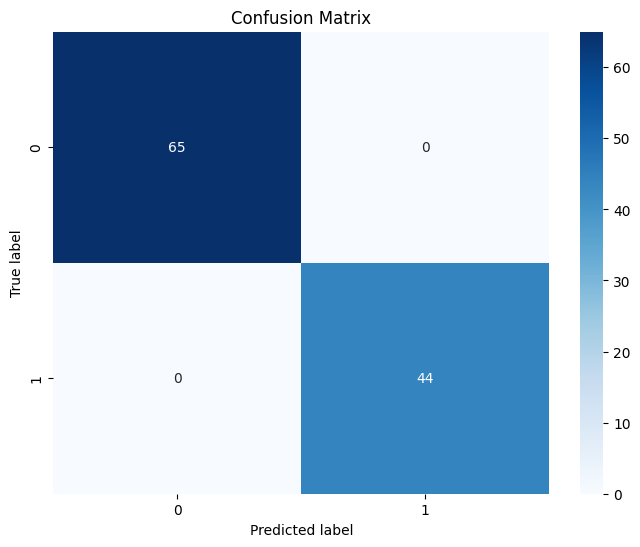

In [ ]:
# Print classification metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_val, y_val_predictions_logreg))
print("Precision:", precision_score(y_val, y_val_predictions_logreg, average='weighted'))
print("Recall:", recall_score(y_val, y_val_predictions_logreg, average='weighted'))
print("F1-score:", f1_score(y_val, y_val_predictions_logreg, average='weighted'))
conf_matrix2 = confusion_matrix(y_val, y_val_predictions_logreg)

 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[59  0]
 [ 0 51]]


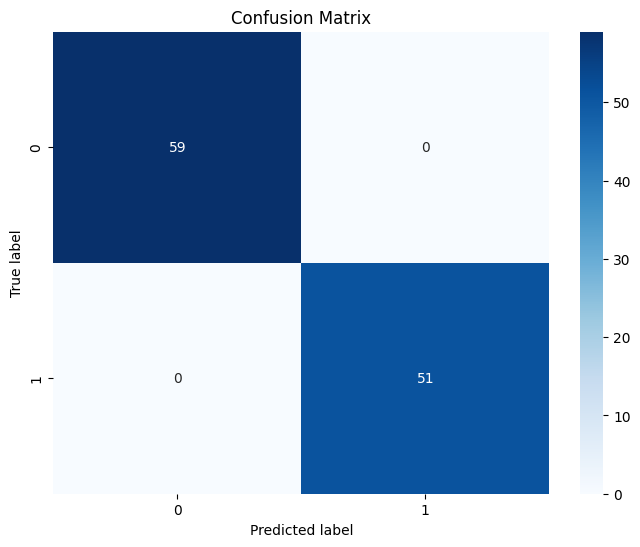

In [ ]:
test_predictions3 = logreg_grid.best_estimator_.predict(new_X_test)
# Print classification metrics
print("Accuracy:", accuracy_score(y_test, test_predictions3))
print("Precision:", precision_score(y_test, test_predictions3, average='weighted'))
print("Recall:", recall_score(y_test, test_predictions3, average='weighted'))
print("F1-score:", f1_score(y_test, test_predictions3,average='weighted'))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions3)
print("Confusion Matrix:")
print(conf_matrix)
 #Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()